## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [231]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 uszipcode==1.0.1 -q --user
# !pip install sqlalchemy_mate==1.4.28.4 SQLAlchemy==1.4.32 python-Levenshtein uszipcode==1.0.1

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

# import all of required libraries and dependecies setting in next code block

In [5]:
# Library to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation Libraries
import pandas as pd
import numpy as np

# Library to split data for testing and training model
from sklearn.model_selection import train_test_split

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display as many columns in data
pd.set_option("display.max_columns", None)
# Limit number of rows to be displayed to 100 to avoid long list
pd.set_option("display.max_rows", 100)

# Logistic Regression Library
from sklearn.linear_model import LogisticRegression

# Decision Tree Classifier Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Import Grid Search Model for Exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV

# import specific modules from sklearn metrics library
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    make_scorer,

)

# import the SearchEngine from uszipcode library
# Note - latest uszipcode==1.0.1 has incompatiblity with latest SQLAlchemy and sqlalchemy_mate
# You may need to install dependecies in this sequence to ensure uszipcode library works without error
# pip install sqlalchemy_mate==1.4.28.4
# pip install SQLAlchemy==1.4.32
# pip install uszipcode==1.0.1
# pip install python-Levenshtein

from uszipcode import SearchEngine


## Loading the dataset

In [6]:
# Load data file
data = pd.read_csv("Loan_Modelling.csv")
# Make a copy of the data to avoid any changes to the original data during manipulation
loan = data.copy()

## Data Overview

* Observations
* Sanity checks

In [7]:
# Display 10 random sample rows of the dataset
loan.sample(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
1234  1235   44          18      33    90405       3    1.5          1   
1217  1218   44          20     122    94305       1    0.3          1   
4115  4116   45          20      84    94131       4    1.1          2   
471    472   50          24      30    91768       4    0.1          1   
2205  2206   63          37     101    95819       2    2.8          1   
3571  3572   42          18     153    93955       3    5.6          1   
4927  4928   43          19     121    94720       1    0.7          2   
155    156   24           0      60    94596       4    1.6          1   
614    615   37          12     180    90034       1    8.6          1   
4599  4600   49          25     149    90024       2    0.4          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
1234         0              0                   0           0       1   
1217         0              0                   0           0       1   
4115       180              0                   0           0       1   
471        161              0                   0           0       1   
2205         0              0                   0           0       0   
3571       416              1                   0           0       0   
4927         0              1                   0           1       1   
155          0              0                   0           0       1   
614          0              0                   0           0       1   
4599         0              0                   0           0       1   

      CreditCard  
1234           1  
1217           0  
4115           0  
471            1  
2205           0  
3571           0  
4927           1  
155            0  
614            1  
4599           0

In [8]:
# Lets drop the ID Column from dataset, as it does not add specific predictibility value
loan.drop("ID", axis=1, inplace=True)
loan.sample(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
4195   43          19      52    95054       4    2.2          2         0   
3713   46          20      74    90064       3    0.7          2         0   
1729   50          20      25    91320       4    0.4          3         0   
82     41          16      82    92507       1    4.0          3         0   
125    60          35      80    91301       3    0.5          1         0   
4858   50          24      62    94550       2    0.8          3         0   
1275   27           2      92    95616       2    3.1          1       178   
3394   25          -1     113    90089       4    2.1          3         0   
177    29           3      65    94132       4    1.8          2       244   
2110   28           4     104    94301       3    2.5          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
4195              0                   0           0       0           0  
3713              0                   0           0       1           1  
1729              0                   0           0       1           0  
82                0                   0           0       1           0  
125               0                   0           0       1           0  
4858              0                   0           0       1           0  
1275              0                   0           0       1           0  
3394              0                   0           0       1           0  
177               0                   0           0       0           0  
2110              0                   0           0       0           0

In [9]:
# print first and last 5 rows of the dataset.
print(loan.head())
print("-" * 75)
print(loan.tail())


   Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
---------------------------------------------------------------------------
      Age  Experience  Income  ZIPCode  Family 

In [10]:
# Check for null values
loan.isnull().sum()


Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
# Check for duplicate values
loan.duplicated().sum()

0

# Observation: 
 - No duplicate values found in the data set
 - No null values found in the data set

In [12]:
# check shape of the data set
print("Dataset shape: ", loan.shape)

Dataset shape:  (5000, 13)


In [13]:
# check variables datatypes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [14]:
# Data Summary
loan.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

## Observations (in order of display):
Age - min Age is 23 , max is 67 , Average is 45 Years old - Data seems normal
Experience - min Experience is -3 years, looks odd
Income - min Income is USD 46k, max is USD 224K and average is USD 64K - Data Appears to be right skewed.
ZIPCode - Zip codes should be converted to City/State using uszip library to avoid treating it as plain number as its location.
Family - min Family size is 1, max is 4 and average is 2 - Data looks reasonable and normally distributed, we can use it as category.
CCAvg - min CCAvg is USD 0k, max is USD 1.9K and average is USD 10K - Data appears normal but right skewed.
Education -  Education is a categorical variable for 1 as Undergrad, 2 as Graduate and 3 as Professional
Mortgage - min Mortgage is USD 0, max is USD 635K and average is USD 0 - Data appears right skewed
Personal_Loan - Personal_Loan is a categorical variable where 1: customer accepted the personal loan offered in the last campaign and 0:customer didnot accept
Securities_Account - Securities_Account is a categorical variable where 1: customer has Securities_Account 0:customer does not have Securities_Account
CD_Account - CD_Account is a categorical variable where 1: customer has CD_Account 0:customer does not have CD_Account
Online - Online is a categorical variable where 1: customer uses online banking 0:customer does use online banking
CreditCard - CreditCard is a categorical variable where 1: customer use a credit card issued by any other Bank 0:customer does not use a credit card issued by any other Bank

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### ZIPCode coversion to City and State 

In [15]:
# Find City and State for each ZIP code
# Create the search engine fro uszipcode library
search = SearchEngine()

# Function to extract the city using zipcode value
def get_city(x):
    return search.by_zipcode(x).city

# Function to extract state using zipcode value
def get_state(x):
    return search.by_zipcode(x).state

In [16]:
# Now populate city and state for each record/zip code
city_list = []
state_list =[]

# Loop through 5000 records in data, to extract city/state and add value to corrosponding lists
for i in np.arange(0,5000):
    try:
        city = get_city(loan["ZIPCode"].iloc[i])
        city_list.append(city)
        state = get_state(loan["ZIPCode"].iloc[i])
        state_list.append(state)
    except:
        city_list.append(np.nan)
        state_list.append(np.nan)
    continue

In [17]:
# Add new columns, city and state from lists in the dataset
loan['City'] = city_list
loan['State'] = state_list
loan.head(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   
5   37          13      29    92121       4    0.4          2       155   
6   53          27      72    91711       2    1.5          2         0   
7   50          24      22    93943       1    0.3          3         0   
8   35          10      81    90089       3    0.6          2       104   
9   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   
5              0                   0           0       1           0   
6              0                   0           0       1           0   
7              0                   0           0       0           1   
8              0                   0           0       1           0   
9              1                   0           0       0           0   

            City State  
0       Pasadena    CA  
1    Los Angeles    CA  
2       Berkeley    CA  
3  San Francisco    CA  
4     Northridge    CA  
5      San Diego    CA  
6      Claremont    CA  
7       Monterey    CA  
8    Los Angeles    CA  
9           Ojai    CA

In [18]:
# Check if any values in City column is null
loan['City'].isnull().value_counts()

False    4966
True       34
Name: City, dtype: int64

In [19]:
# Check if any values in State column is null
loan['State'].isnull().value_counts()

False    4966
True       34
Name: State, dtype: int64

In [20]:
# Find out which zipcodes did not get city data from uszip library
zip_city_nan = loan[loan['City'].isnull()]
zip_city_nan['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

In [21]:
# Find out which zipcodes did not get state data from uszip library
zip_state_nan = loan[loan['State'].isnull()]
zip_state_nan['ZIPCode'].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

### Missing values for City and State is for same set of 4 zip codes, most likely uszip library is missing some newer zip codes due to stale data

In [22]:
# Google Search missing Zip codes to manually populate City/State Data, 96651 belongs to United States Armed Forces (Naval/Marine)
missing_zip_values = {'92717':'Irvine, CA',
             '96651':'Naval-Marine, AP',
             '92634':'Fullerton, CA',
             '93077':'Ventura, CA'
            }

# Function to fill the missing values into dataset
def fill_nan(data, indxs, value, column):
    for i in indxs:
        data[column].iloc[i]=value
        
# Loop through missing_zip_values to fill in the missing city and state values    
for i in missing_zip_values.keys():
    indxs = loan[loan['ZIPCode']==int(i)].index
    fill_nan(loan, indxs, missing_zip_values[str(i)].split(',')[0], 'City')
    fill_nan(loan, indxs, missing_zip_values[str(i)].split(',')[1], 'State')

# Check if City/State null values removed from dataset
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  0
State                 0
dtype: int64

In [23]:
# Strip any whitespaces from newly populated columns
loan['City']=loan['City'].str.strip()
loan['State']=loan['State'].str.strip()

# Show statistics of City/State
print(f'{loan['City'].value_counts()}')
print("-" * 40)
print(f'{loan['State'].value_counts()}')

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Sausalito          1
Ladera Ranch       1
Sierra Madre       1
Tahoe City         1
Stinson Beach      1
Name: City, Length: 245, dtype: int64
----------------------------------------
CA    4994
AP       6
Name: State, dtype: int64


In [24]:
# Show number of data rows having negative value for Experience Column
print(f'There are total {len(loan[loan["Experience"] < 0])} rows with a negative value for Experience')
# Checking on experience < 0
loan[loan["Experience"] < 0]["Experience"].value_counts()

There are total 52 rows with a negative value for Experience


-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [25]:
# negative values for Experience are likely input errors and we can simply remove -ve sigh from Data 
loan["Experience"].replace(-1, 1, inplace=True)
loan["Experience"].replace(-2, 2, inplace=True)
loan["Experience"].replace(-3, 3, inplace=True)

In [26]:
# Find out that no more -ve values exists for Experience Column
len(loan[loan["Experience"] < 0])

0

In [28]:
# Categorical variables should be converted to data type of categorical variables from numeric.
category_columns = [
    "ZIPCode",
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    'City',
    'State'
]
loan[category_columns] = loan[category_columns].astype("category")

In [29]:
# Verify that data types changed properly
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  City                5000 non-null   category
 14  State               5000 non-null   category
dtypes: category(9), float64(1), int64(5)
m

### Univariate Analysis

In [31]:
# Define function to plot the boxplot and histogram for all numerical variables
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots     
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="pink"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="rainbow"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="darkviolet", linestyle="-"
    )  # Add median to the histogram
    
# Define function to create barplot labels
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # size of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

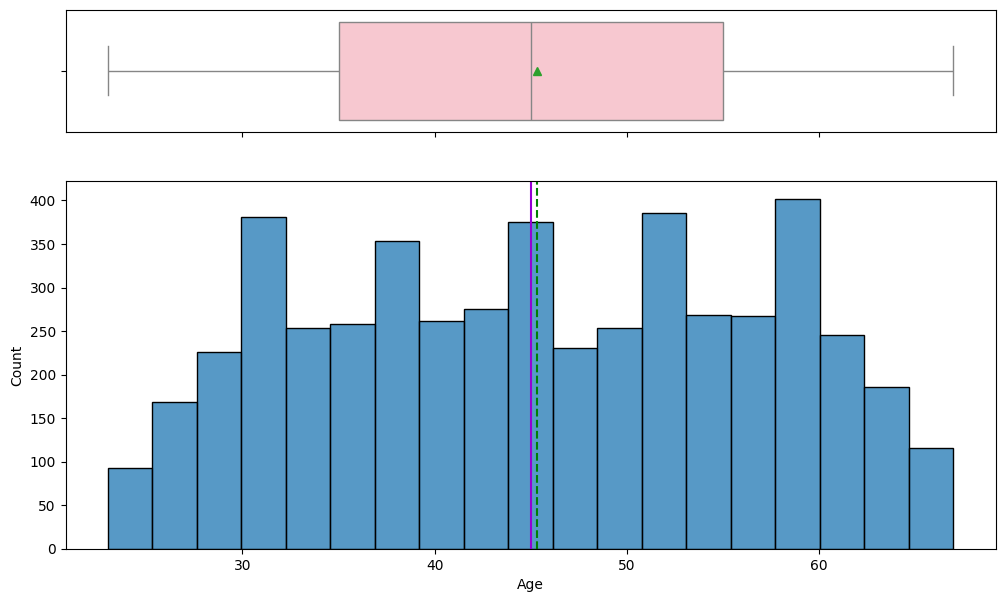

In [32]:
# Create Box Plot for Age
histogram_boxplot(loan,'Age')

* Average Age is around 45
* Several peaks observed as 30-33, 37-39, 44-46, 52-54 and 58-60
* Except for left and right ends data is fitting in uniform distribution


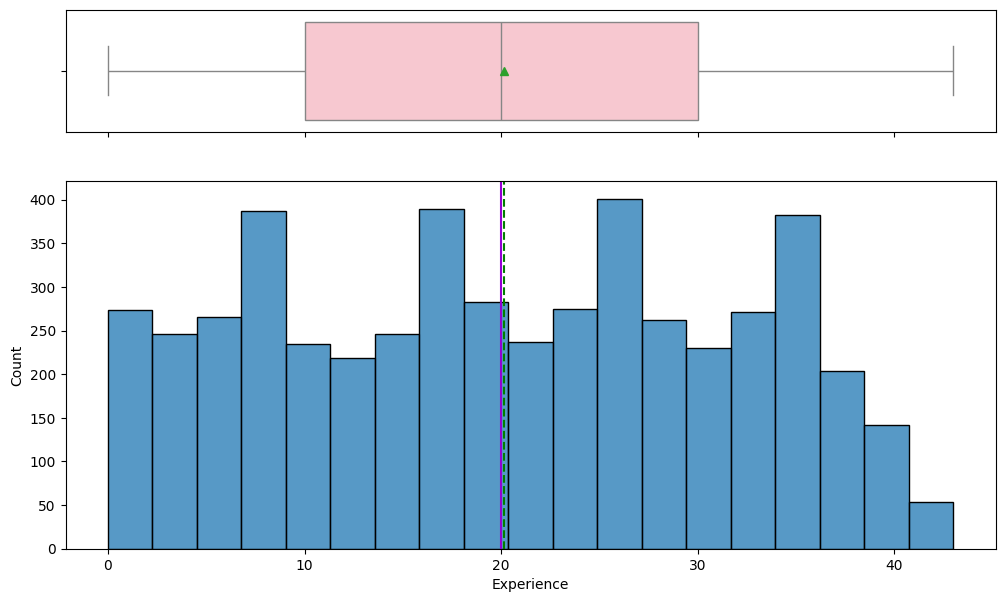

In [33]:

# Create Box Plot for Experiance
histogram_boxplot(loan,'Experience')

* Average Experiance is about 20 years
* Appears to be uniform distribution with few peaks

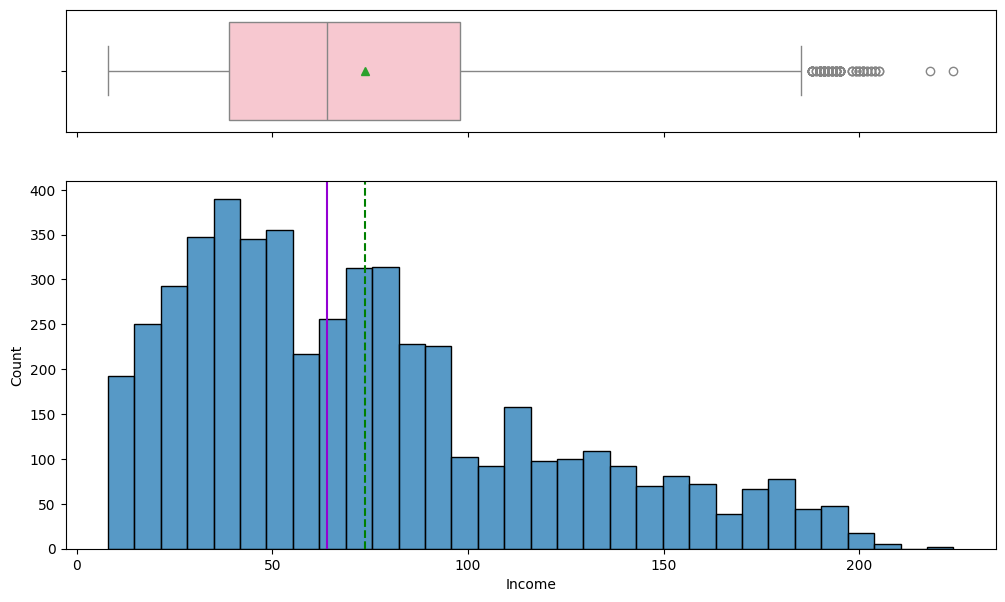

In [34]:
histogram_boxplot(loan, "Income")

* Average income is about 65K
* Median income is around 60K
* Dataset skewed to right 

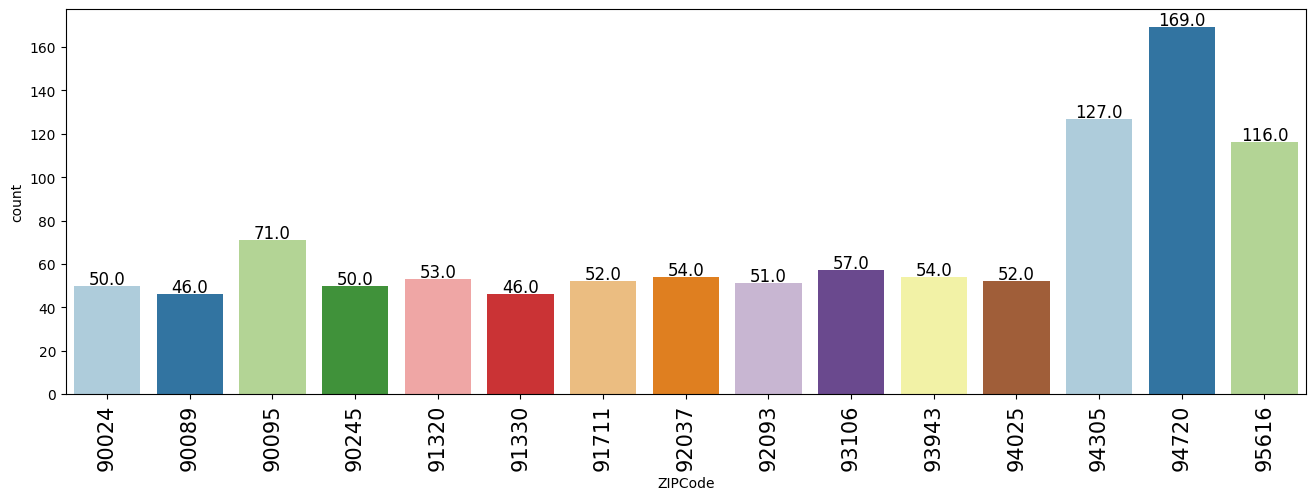

In [35]:
labeled_barplot(loan, "ZIPCode", n=15)

* Largest set of customers are from 3 zip codes 94305, 94720, 95616

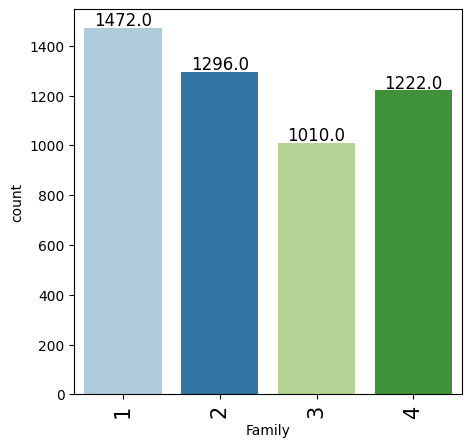

In [36]:
labeled_barplot(loan, "Family")

* Single Family is most common
* Order of Family size is 1, 2, 4, 3

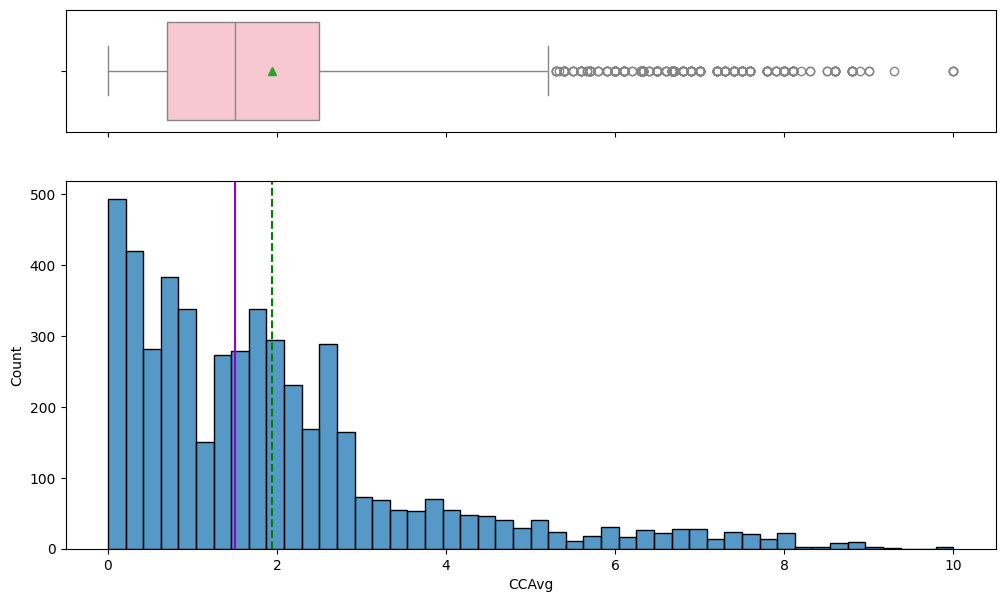

In [37]:
histogram_boxplot(loan,'CCAvg')

* Average customer spends arount $1.9K / month on Credit Card
* Dataset is right skewed with a number of outliers

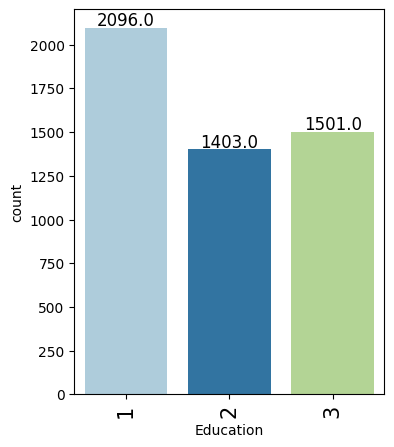

In [38]:
labeled_barplot(loan, "Education")

* Undergraduate Degree is most common
* graduate Degree is less prevalant than Professional Degree

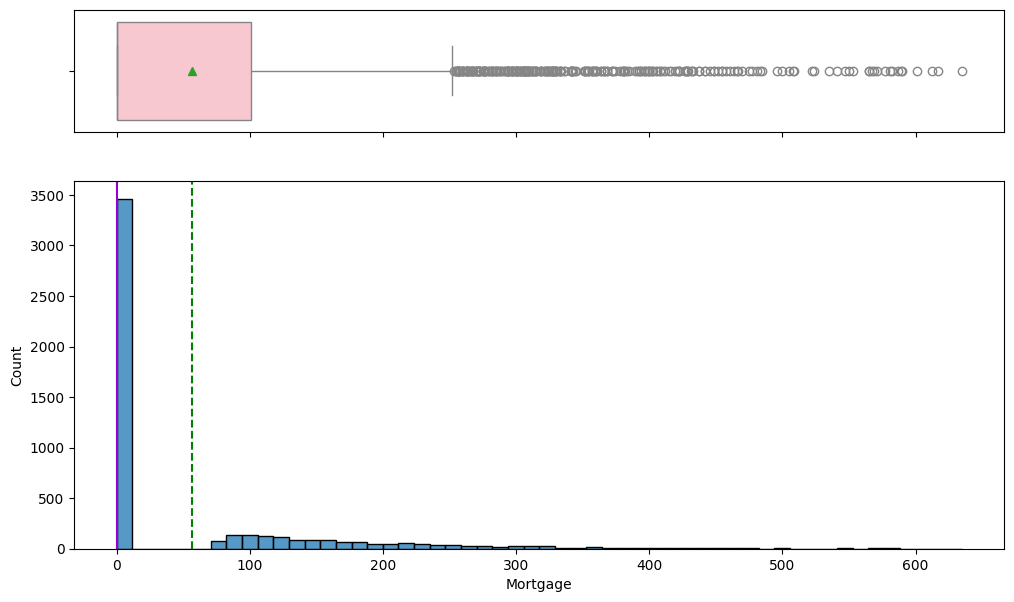

In [39]:
histogram_boxplot(loan, "Mortgage")

* Extreme Right Skewed Data Observed
* Need to seperate non-zero value mortgage to visulize better

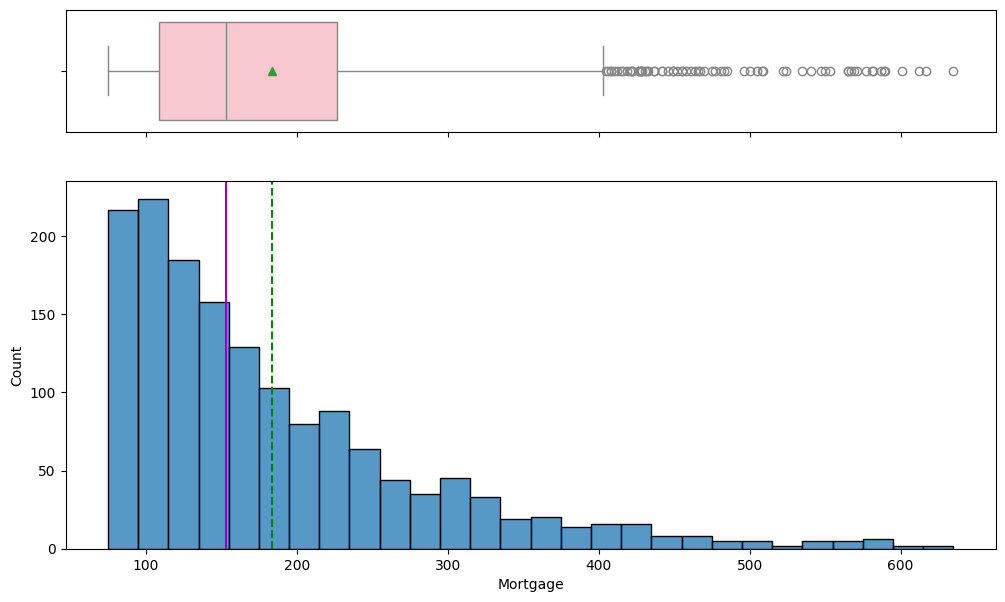

In [40]:
# Extract non zero Mortgage
df_mortgage_nonzero = loan[loan["Mortgage"] != 0].copy()
histogram_boxplot(df_mortgage_nonzero, "Mortgage")

* This excludes no mortgage customers, through right skewness still exist, but provides better picture on mortgage customers
* Lots of outliers observed

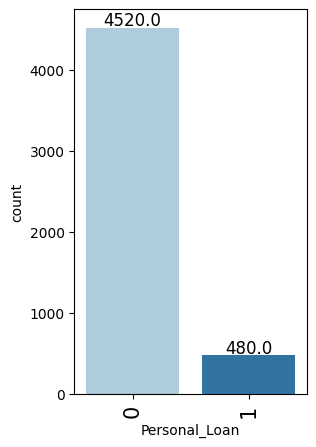

In [41]:
labeled_barplot(loan, "Personal_Loan")

* Most customers do not have personal loan with Bank

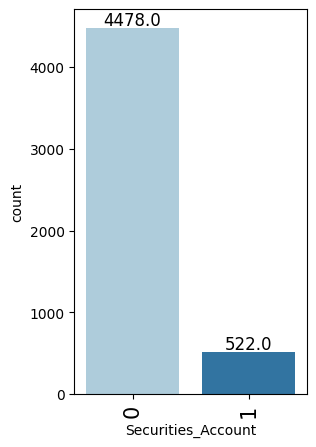

In [42]:
labeled_barplot(loan, "Securities_Account")

* Most customers do not have Securities Account

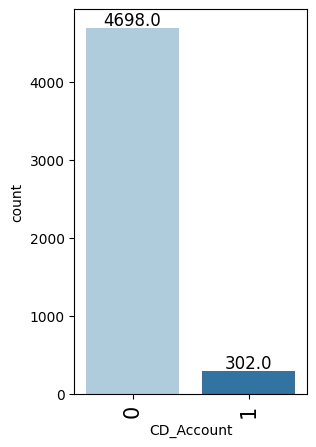

In [43]:
labeled_barplot(loan, "CD_Account")

* Most customers do not have CD Account

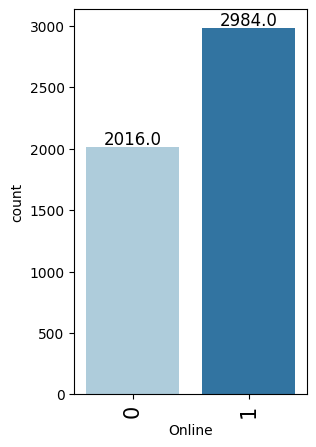

In [44]:
labeled_barplot(loan, "Online")

* Significant number of customers do not use online Banking

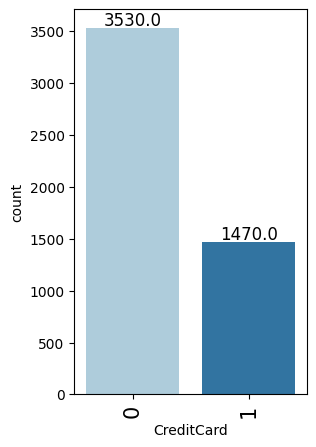

In [45]:
labeled_barplot(loan, "CreditCard")

* 70% Customers use credit card issued by Bank

<Axes: xlabel='count', ylabel='City'>

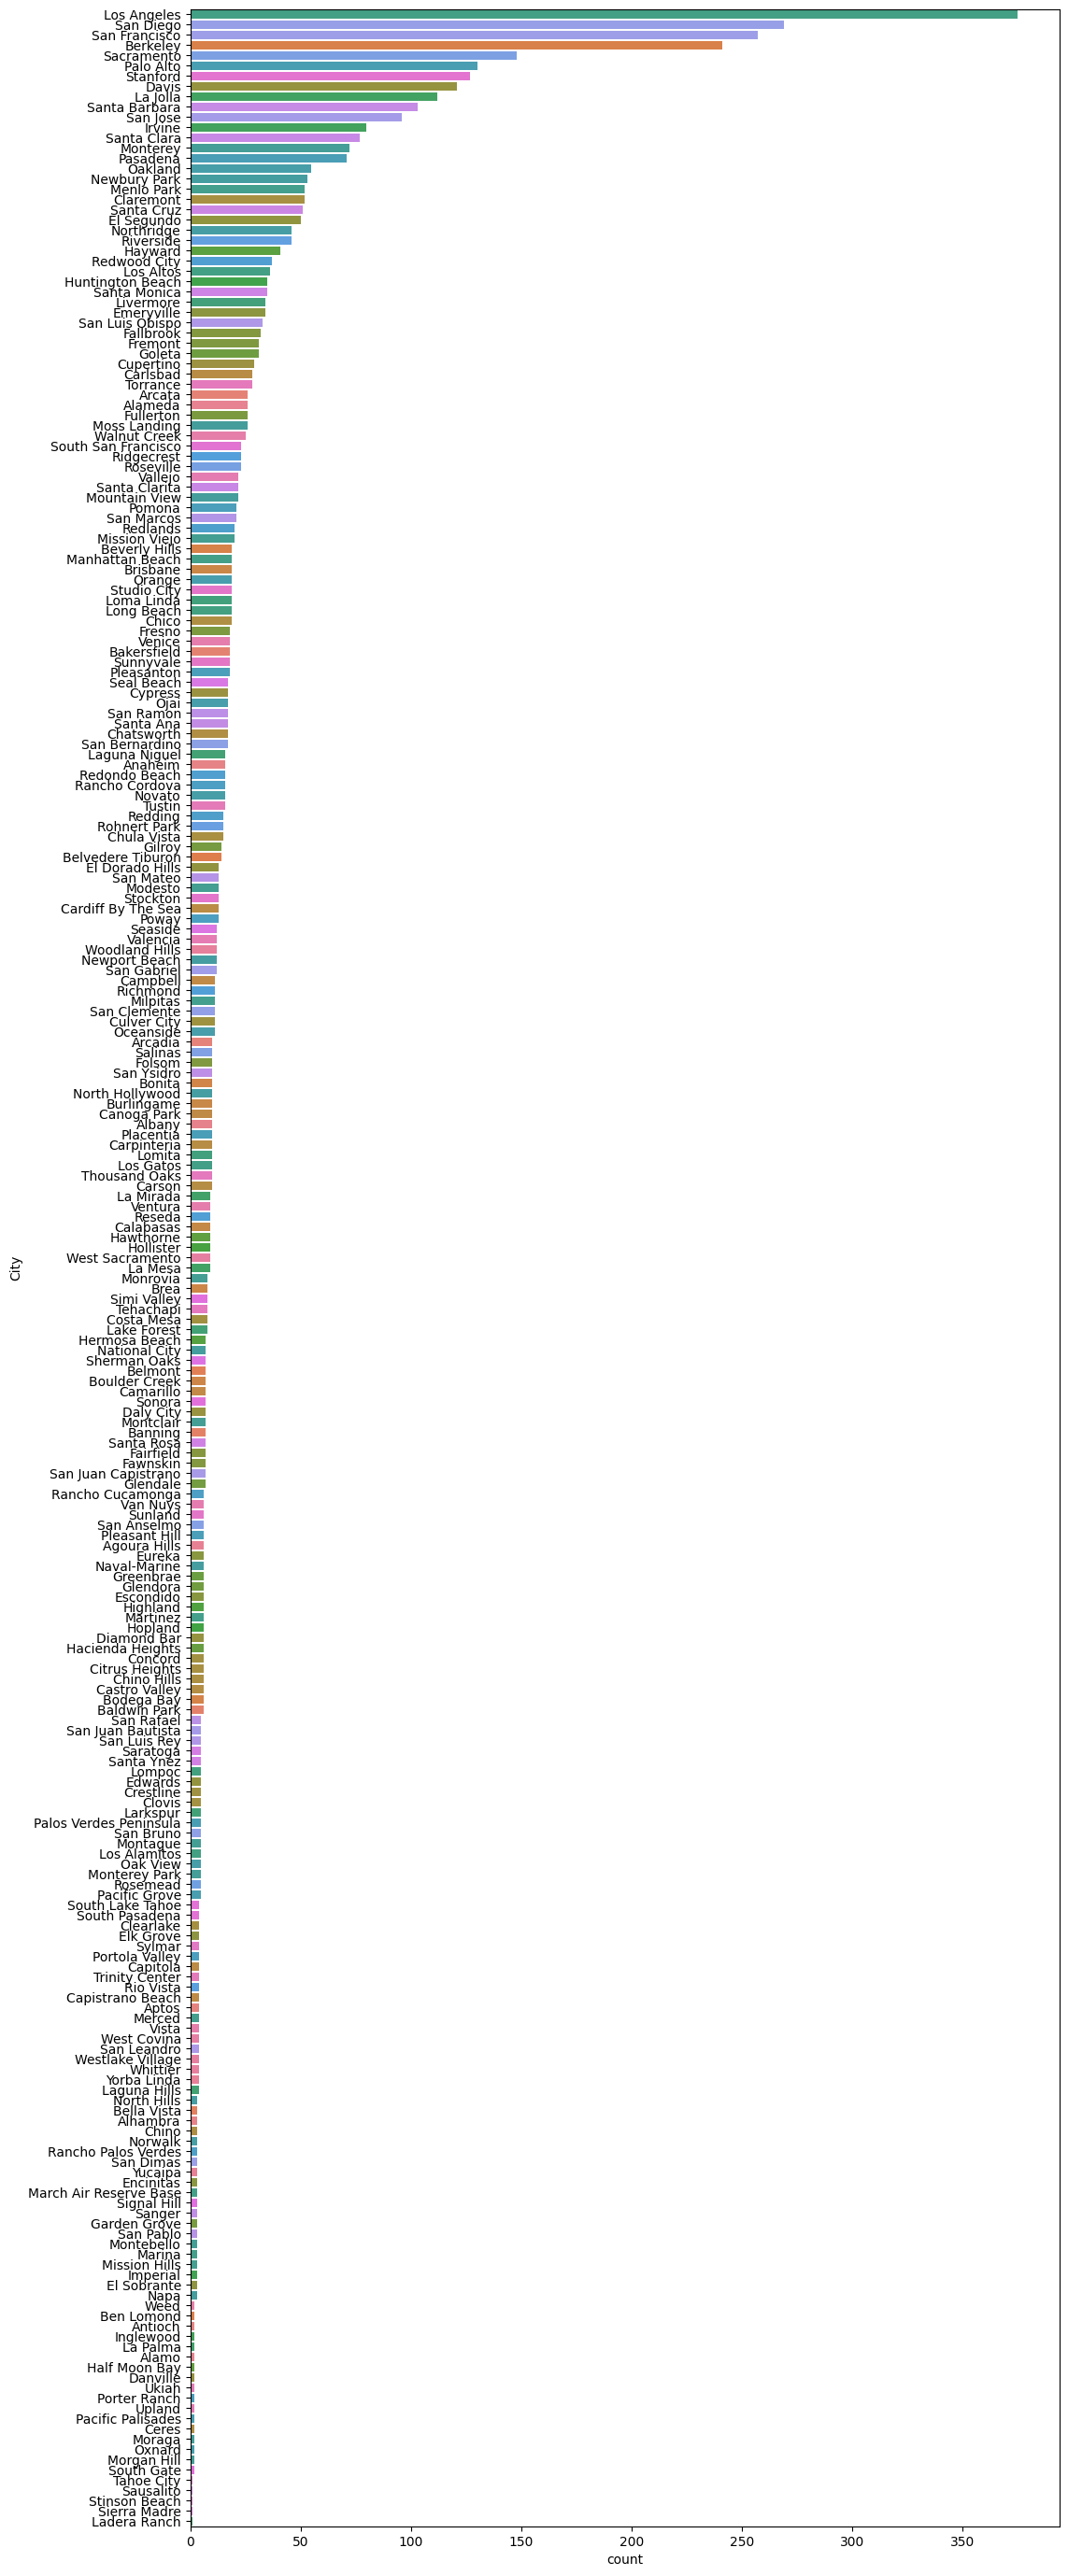

In [46]:
plt.figure(figsize=(12,35))
sns.countplot(data=loan, y='City', hue='City', order=loan['City'].value_counts().index)

* Top cities for customers are Los Angeles, San Diego, San Fransisco and so on.
* Number of cities with very few customers is huge.

### Bivariate Analysis

<Figure size 1500x1500 with 0 Axes>

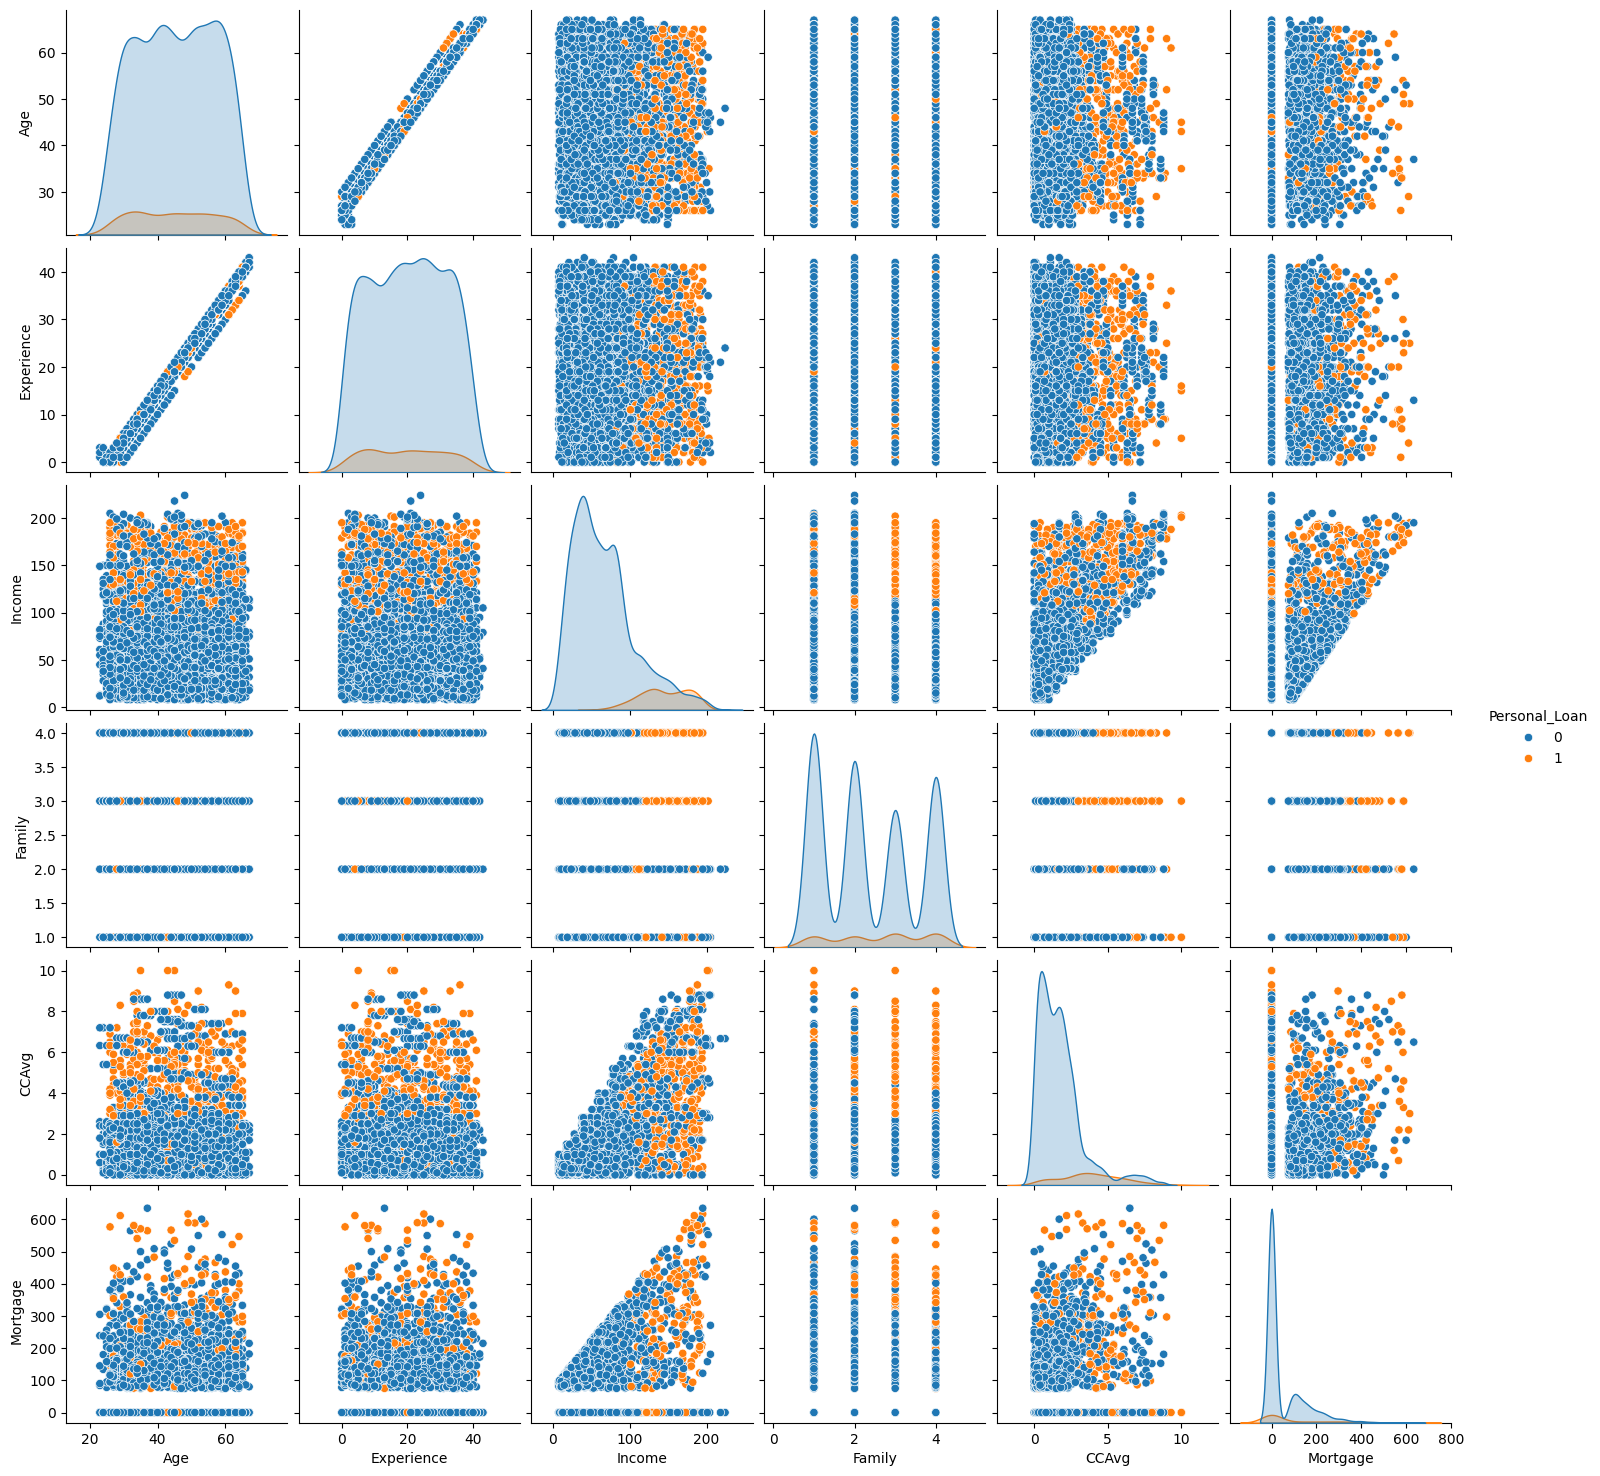

In [47]:
# Simple pair plot to see correlation between different data points
plt.figure(figsize=(15,15))
# sns.pairplot(loan, diag_kind='kde')
sns.pairplot(loan, hue="Personal_Loan")
plt.show()

* Customers with Personal Loan are represented with Orange dots and One without Personal Loan are Blue dots
* Very strong liner correlation between Age and Experiance is observed.
* Custormer with Personal Loans are having :
   * Higher Education
   * Higher Credit Card Average
   * Higher Income
   * Higher Mortgage
   * Higher Family Size

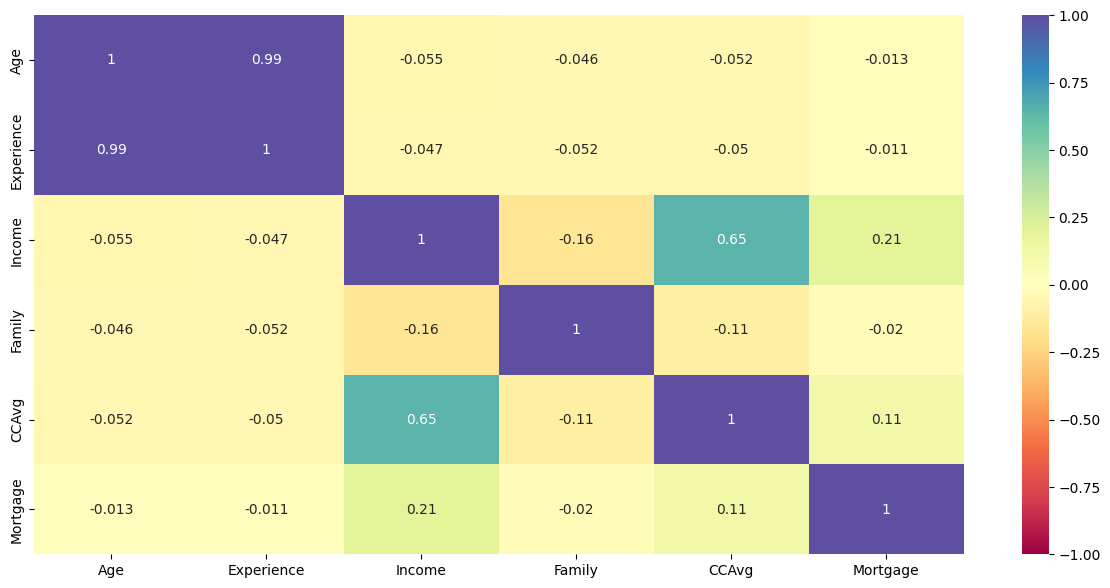

In [48]:
# Check Correlation without City/State
plt.figure(figsize=(15, 7))
orig_loan = loan.drop(['City'], axis=1)
orig_loan.drop(['State'], axis=1, inplace=True)
sns.heatmap(orig_loan.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* Mortgage and Income having slight positive correlation
* Age and Experiance are positively correlated
* Securities Account and CD Account has some correlation

In [51]:
# Define function to plot distributions with target
def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()
    
def stacked_barplot(data, predictor, target, n=10):
    top_categories = data[predictor].value_counts().head(n).index
    
    # Filter the data to include only the top n categories
    filtered_data = data[data[predictor].isin(top_categories)]
    
    # Create a crosstab of the predictor and target variables
    crosstab = pd.crosstab(filtered_data[predictor], filtered_data[target], margins=False, normalize='index').sort_values(by=data[target].value_counts().index[-1], ascending=False)
    
    # Print the category counts
    print(crosstab)
    print("-" * 120)
    
    # Plot the stacked bar chart
    ax = crosstab.plot(kind="bar", stacked=True, figsize=(n + 5, 5), rot=0)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.ylabel('Proportion')
    plt.title(f'Stacked Barplot of {predictor} by {target}')
    plt.show()

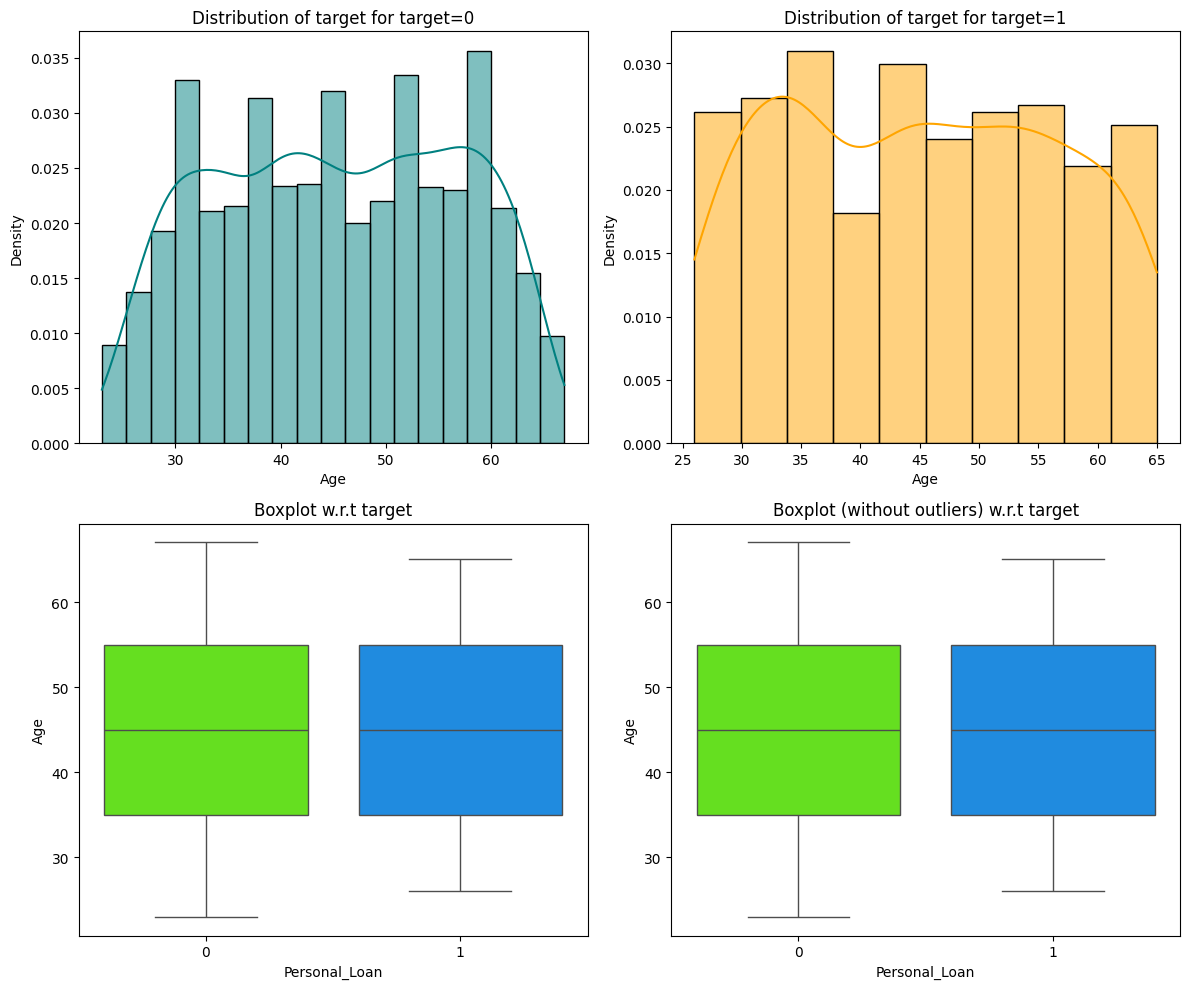

In [52]:
# Plot Age vs Personal Loan
distribution_plot_wrt_target(loan, "Age", "Personal_Loan")

* Multiple peaks observed for both with and without personal loan* 

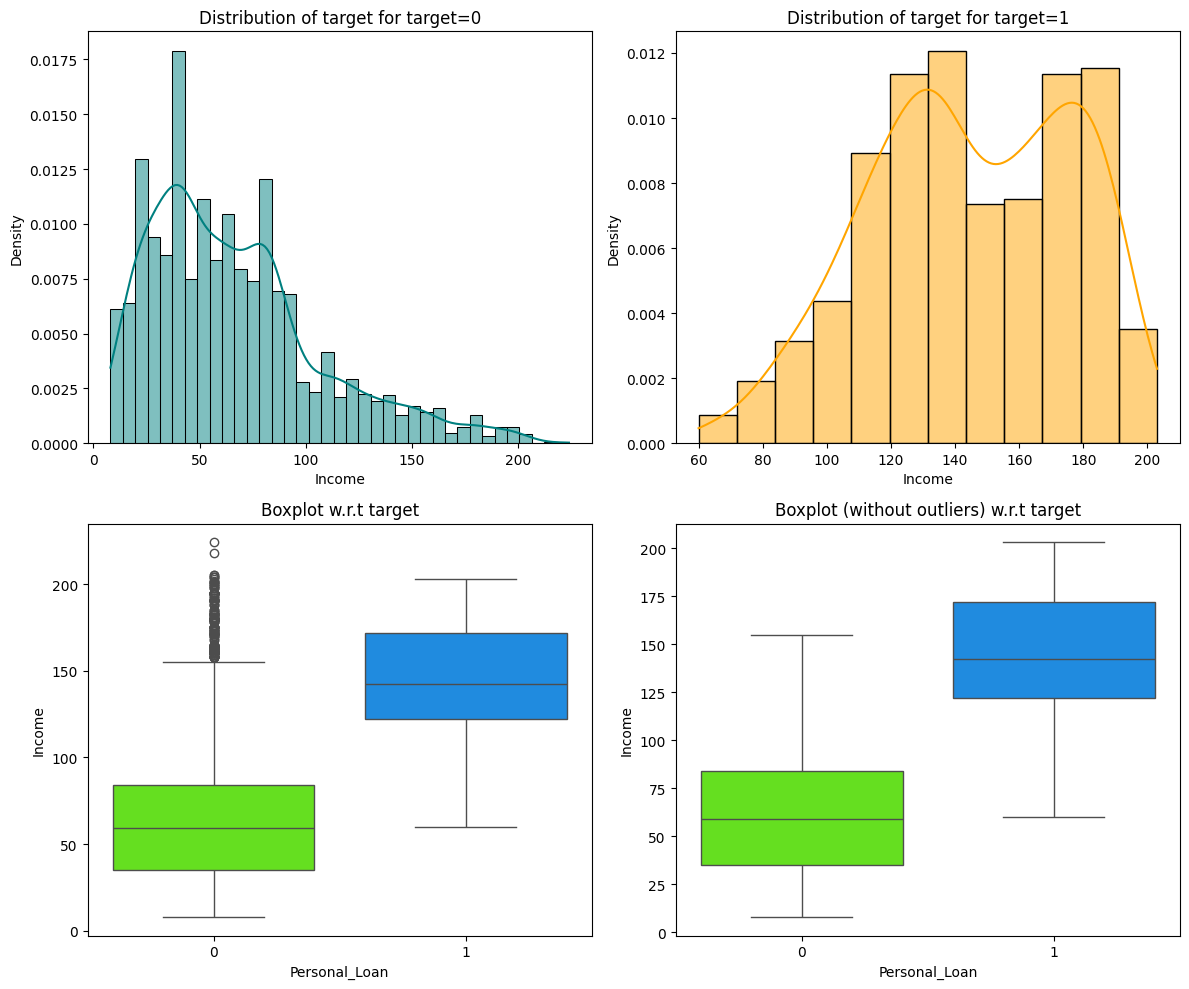

In [53]:
# Plot Income vs Personal_Loan
distribution_plot_wrt_target(loan,'Income','Personal_Loan')

* Income varies greatly between customers with and without personal loan
* Data is skewed to right for customers not having personal loan than ones having it

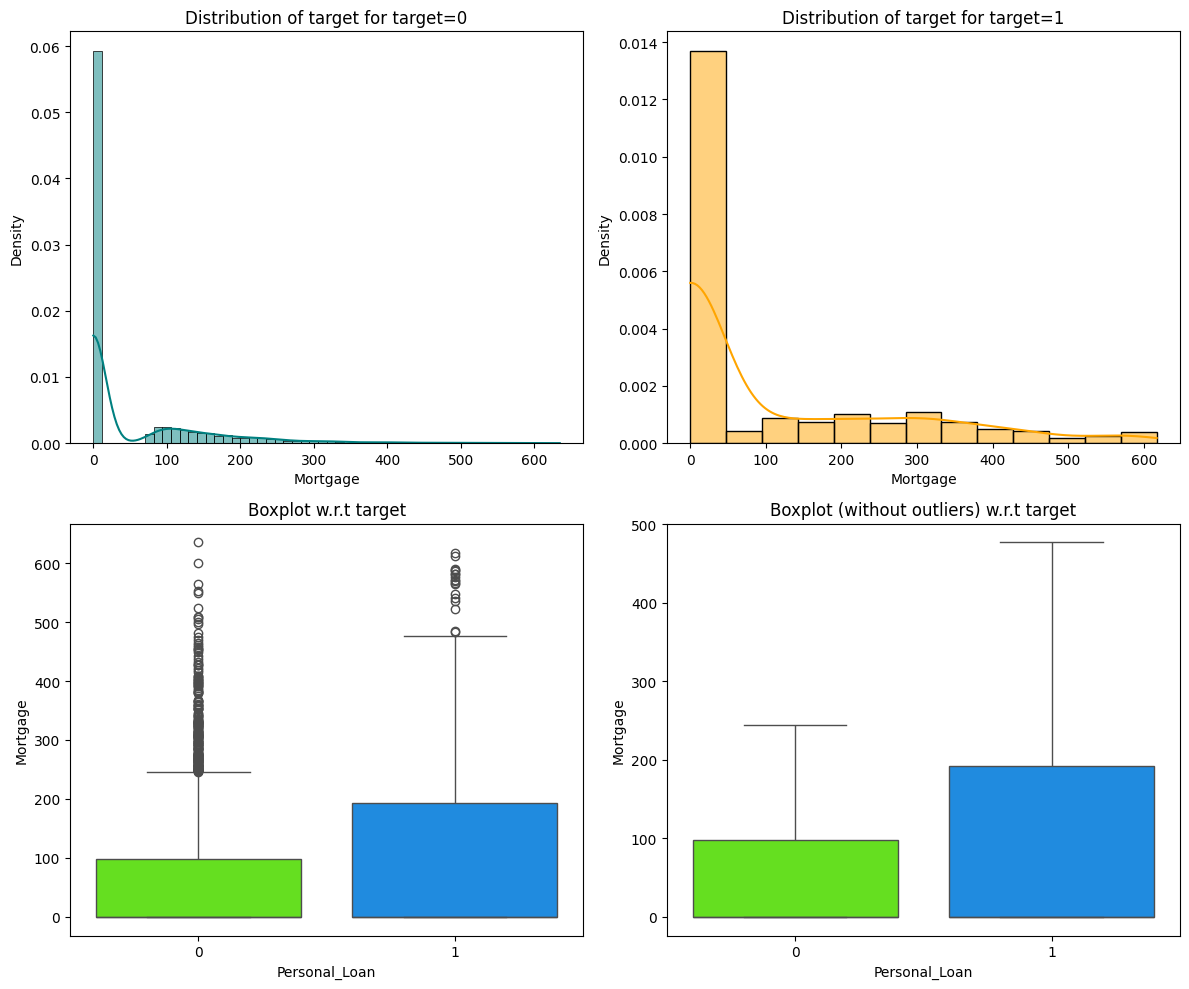

In [54]:
# Plot Mortgage vs Personal_Loan
distribution_plot_wrt_target(loan,'Mortgage','Personal_Loan')

* Data is skewed and needs to analyze with customer having mortgage

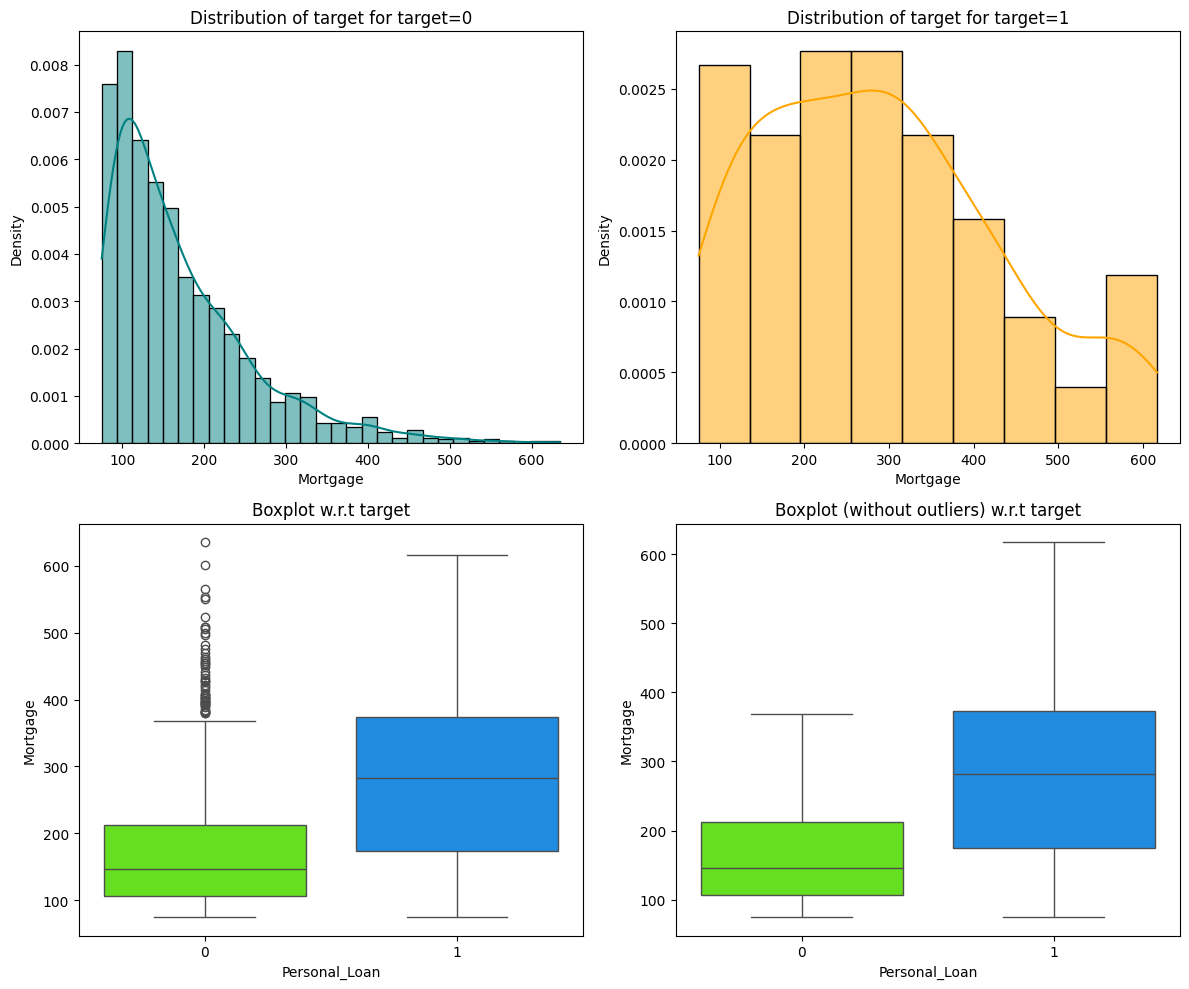

In [55]:
# Plot customers with Mortgage vs Personal Loan
distribution_plot_wrt_target(df_mortgage_nonzero,'Mortgage','Personal_Loan')

* Right skewness is observered in customer with mortgage data.
* Mean value of mortgage paid by customers not having personal loan is much less than customers having personal loan.
* With increase in mortgage value increase, chances for having personal loan is heigher

Personal_Loan         0         1
ZIPCode                          
92093          0.823529  0.176471
90089          0.826087  0.173913
90095          0.887324  0.112676
94720          0.887574  0.112426
94305          0.897638  0.102362
90245          0.900000  0.100000
92037          0.907407  0.092593
91711          0.923077  0.076923
94025          0.923077  0.076923
93943          0.925926  0.074074
93106          0.929825  0.070175
91330          0.934783  0.065217
95616          0.948276  0.051724
91320          0.962264  0.037736
90024          0.980000  0.020000
------------------------------------------------------------------------------------------------------------------------


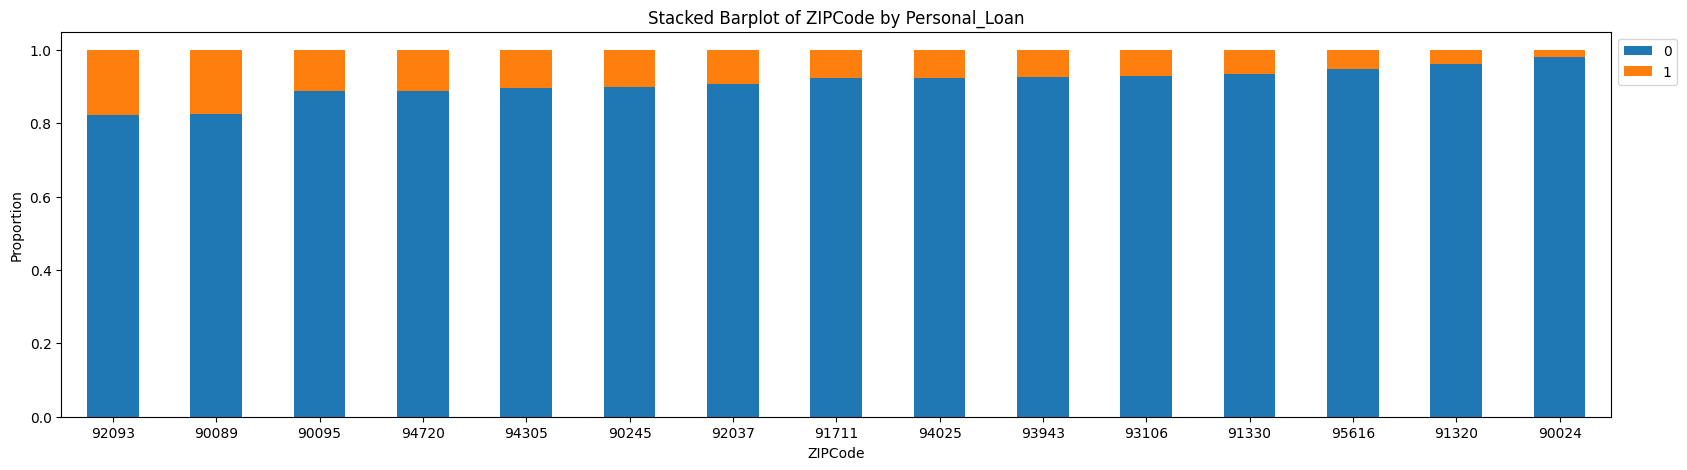

In [56]:
stacked_barplot(loan, "ZIPCode", "Personal_Loan", n=15)

* Customers from zip Codes 92093, 90089, 90095, and 94720 dominates having personal loan 

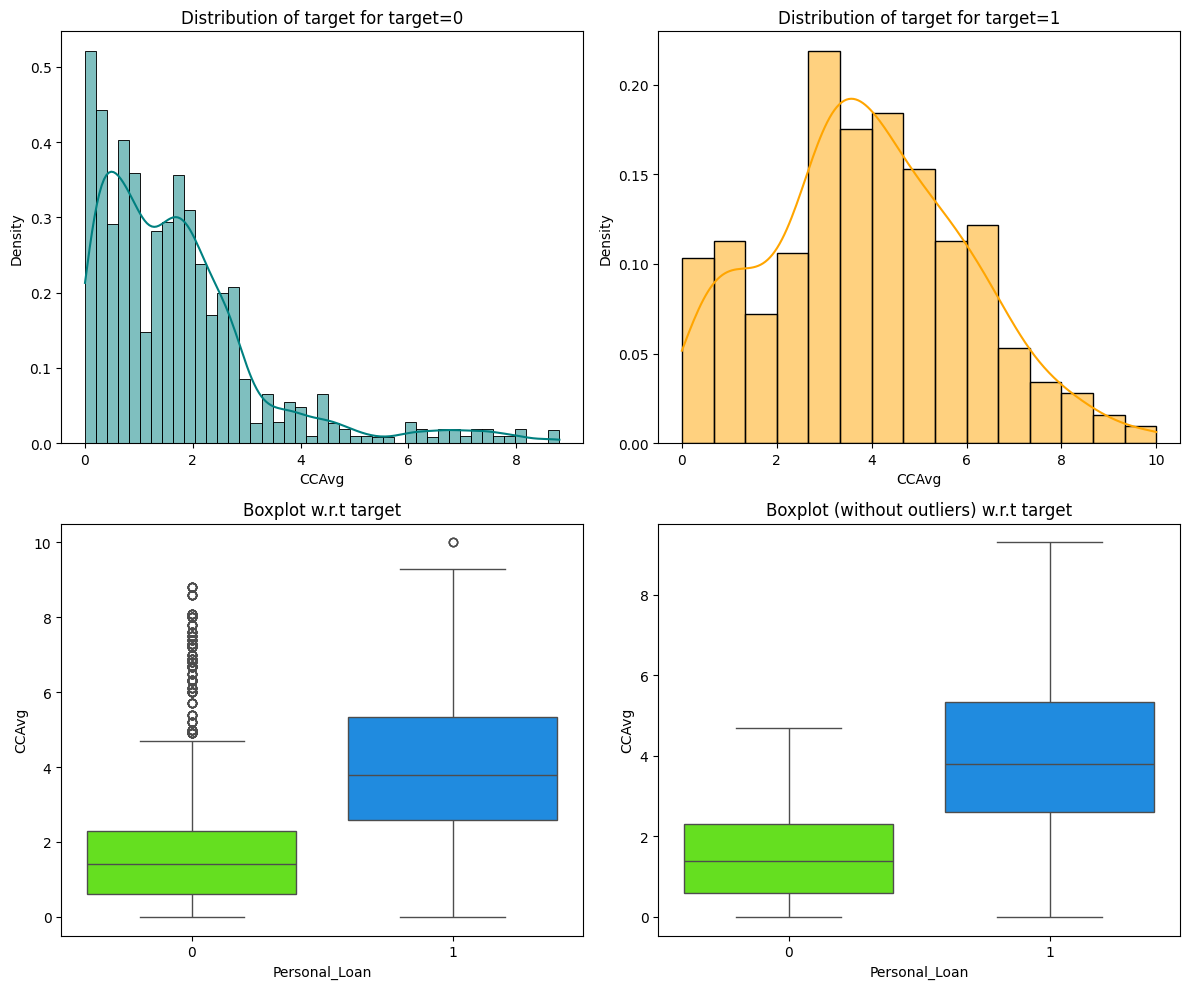

In [57]:
# CCAvg vs Personal_Loan
distribution_plot_wrt_target(loan,'CCAvg','Personal_Loan')

* Customers having personal loan also tend to have heigher credit card spending

Personal_Loan         0         1
Family                           
3              0.868317  0.131683
4              0.890344  0.109656
2              0.918210  0.081790
1              0.927310  0.072690
------------------------------------------------------------------------------------------------------------------------


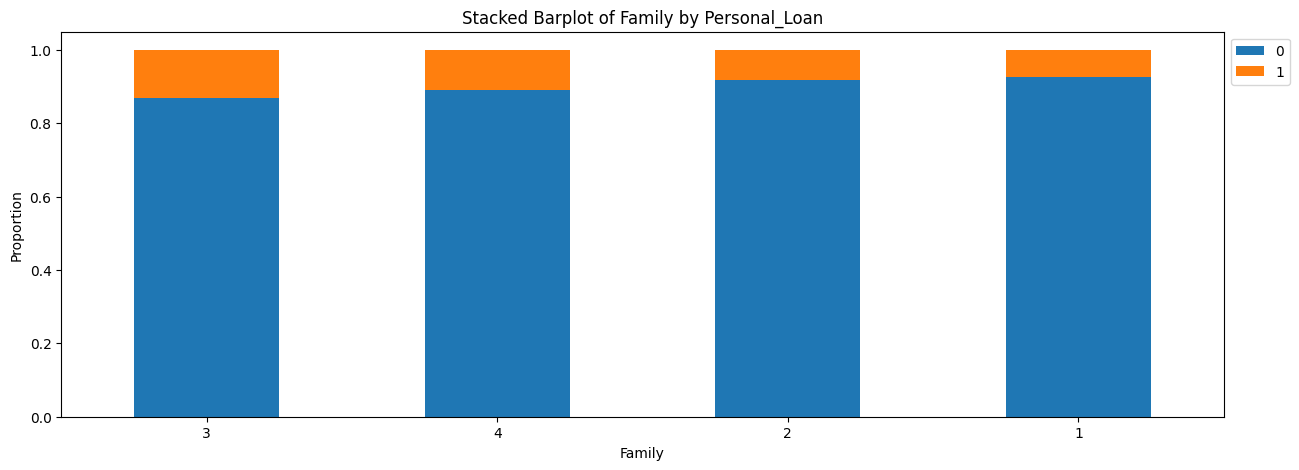

In [58]:
stacked_barplot(loan,'Family','Personal_Loan')

* As family size grows, personal loan use also increases

Personal_Loan         0         1
Education                        
3              0.863424  0.136576
2              0.870278  0.129722
1              0.955630  0.044370
------------------------------------------------------------------------------------------------------------------------


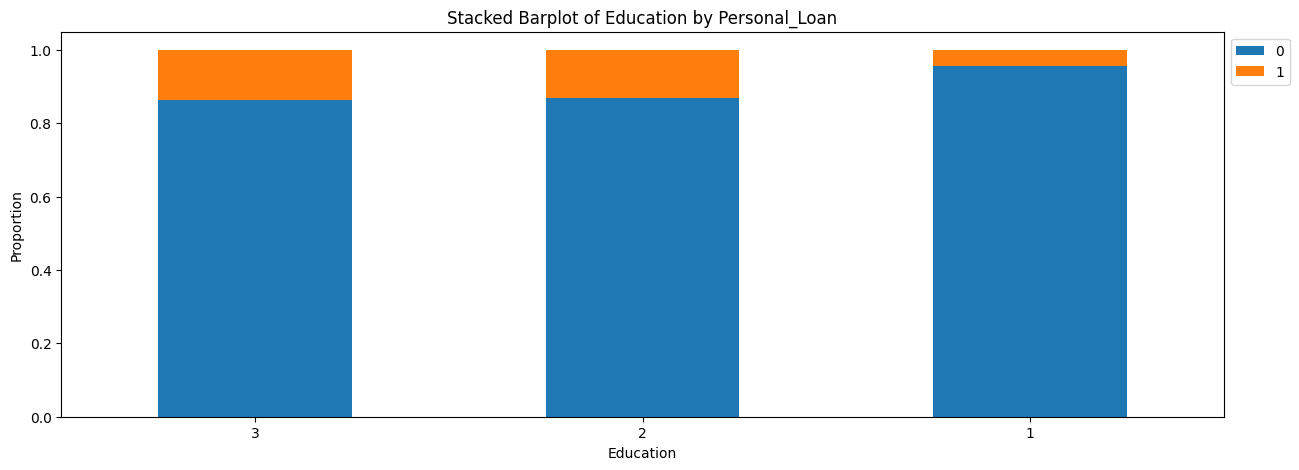

In [59]:
stacked_barplot(loan,'Education','Personal_Loan')

* Heigher Education level customers tend to have more acceptance of personal loan

Personal_Loan              0         1
Securities_Account                    
1                   0.885057  0.114943
0                   0.906208  0.093792
------------------------------------------------------------------------------------------------------------------------


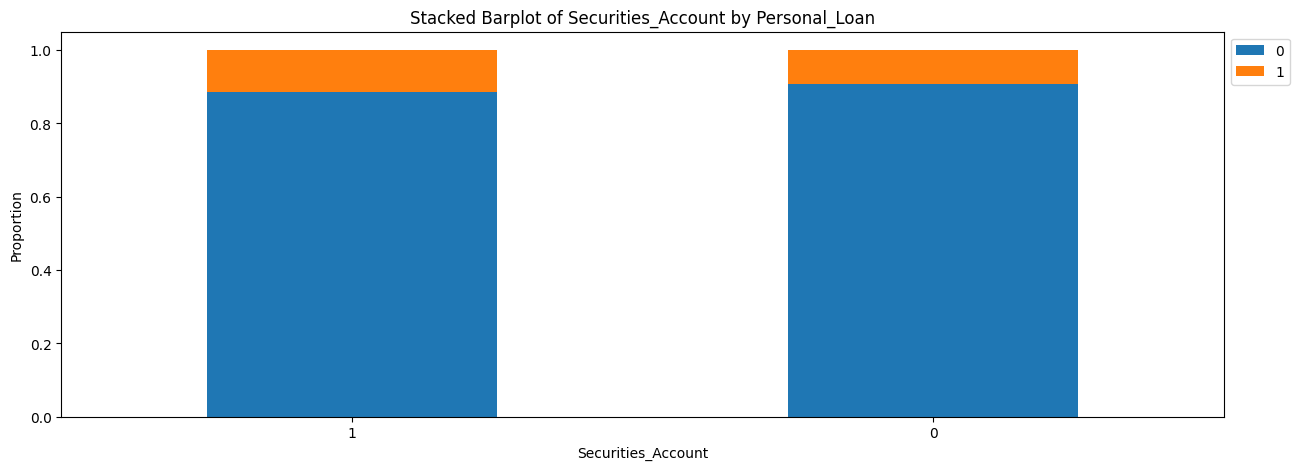

In [60]:
stacked_barplot(loan,'Securities_Account','Personal_Loan')

* Customers having Security account tend to have more acceptance of personal loan

Personal_Loan         0         1
CD_Account                       
1              0.536424  0.463576
0              0.927629  0.072371
------------------------------------------------------------------------------------------------------------------------


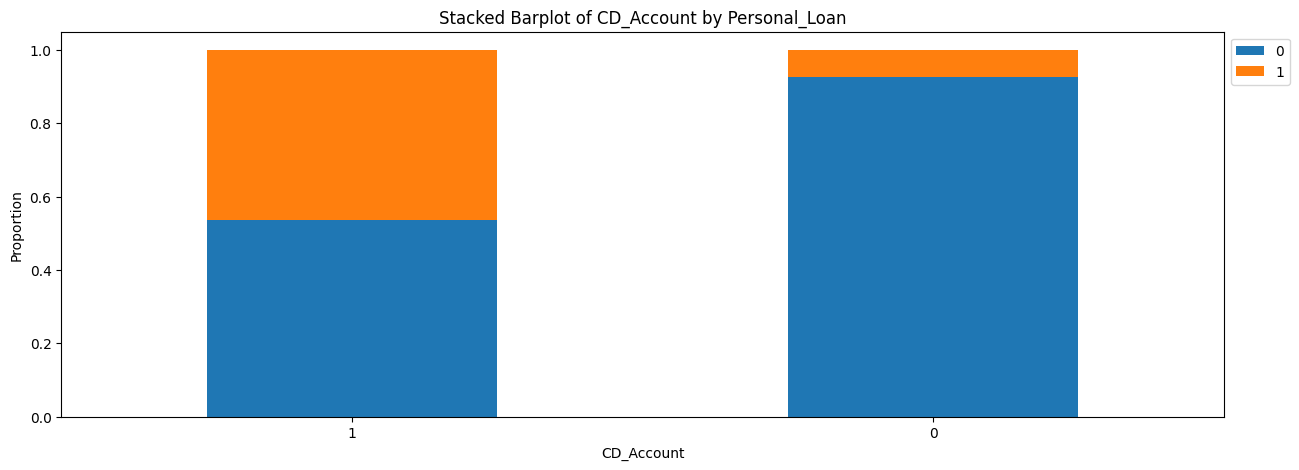

In [61]:
stacked_barplot(loan,'CD_Account','Personal_Loan')

* Customers with CD Account tend to use personal loan more

Personal_Loan        0        1
Online                         
1              0.90248  0.09752
0              0.90625  0.09375
------------------------------------------------------------------------------------------------------------------------


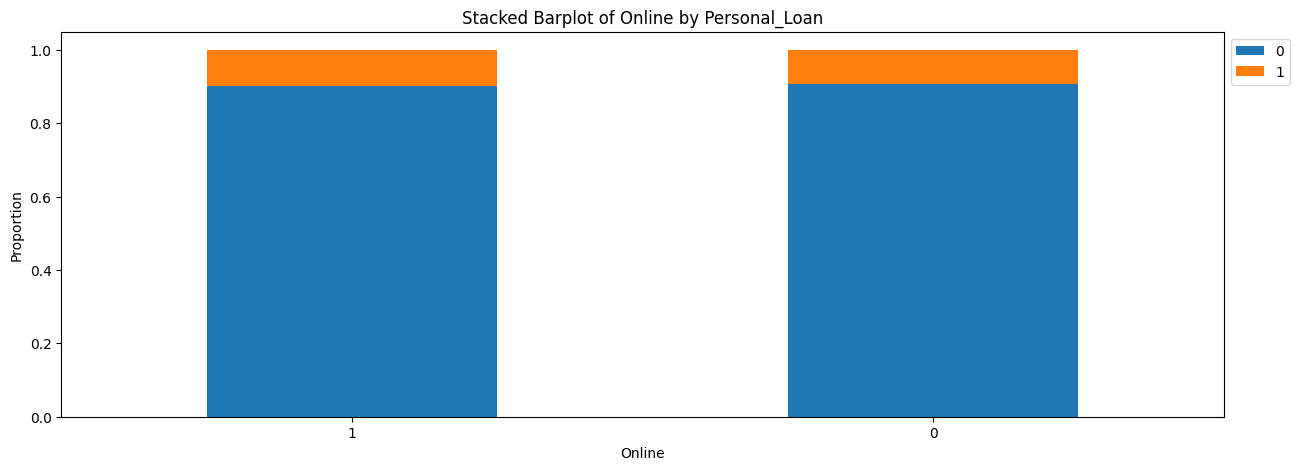

In [62]:
stacked_barplot(loan,'Online','Personal_Loan')

* Online users have slight edge in accepting personal loan

Personal_Loan         0         1
CreditCard                       
1              0.902721  0.097279
0              0.904533  0.095467
------------------------------------------------------------------------------------------------------------------------


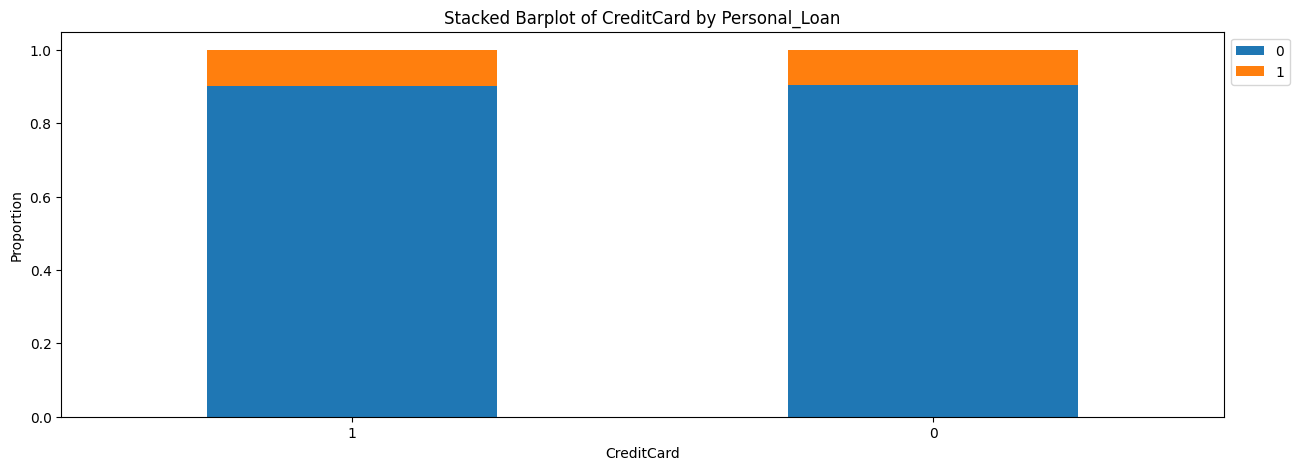

In [63]:
stacked_barplot(loan,'CreditCard','Personal_Loan')

* Customers with or without credit card account tends to have similar acceptance of personal loan

Personal_Loan         0         1
City                             
La Jolla       0.866071  0.133929
Palo Alto      0.876923  0.123077
Berkeley       0.887967  0.112033
Stanford       0.897638  0.102362
Los Angeles    0.898667  0.101333
Sacramento     0.912162  0.087838
San Diego      0.921933  0.078067
Santa Barbara  0.922330  0.077670
San Francisco  0.926070  0.073930
Davis          0.950413  0.049587
------------------------------------------------------------------------------------------------------------------------


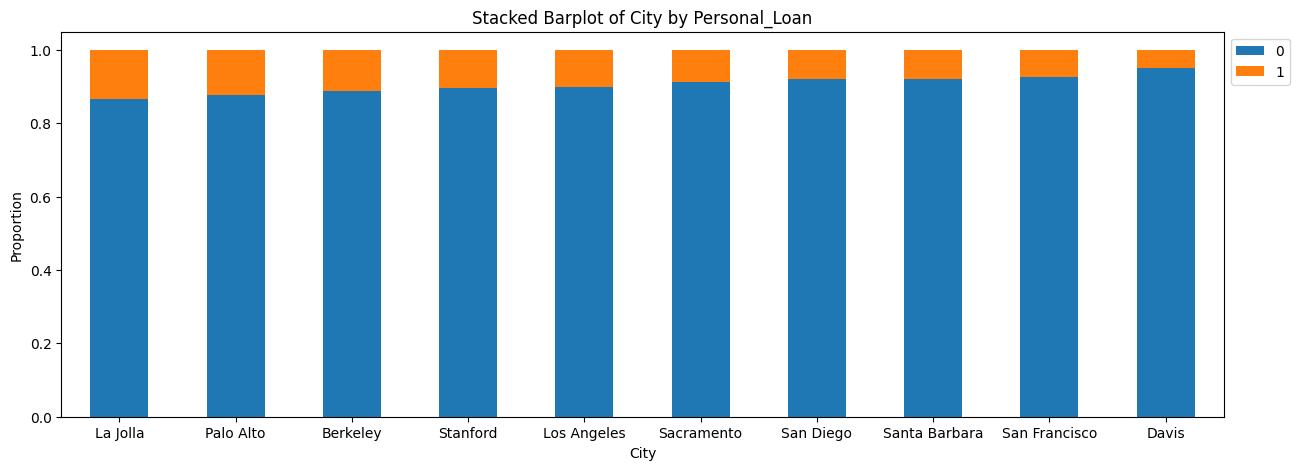

In [64]:
stacked_barplot(loan,'City','Personal_Loan')

* Top 10 cities from above list shows most potential for personal loan

Personal_Loan         0         1
State                            
CA             0.903885  0.096115
AP             1.000000  0.000000
------------------------------------------------------------------------------------------------------------------------


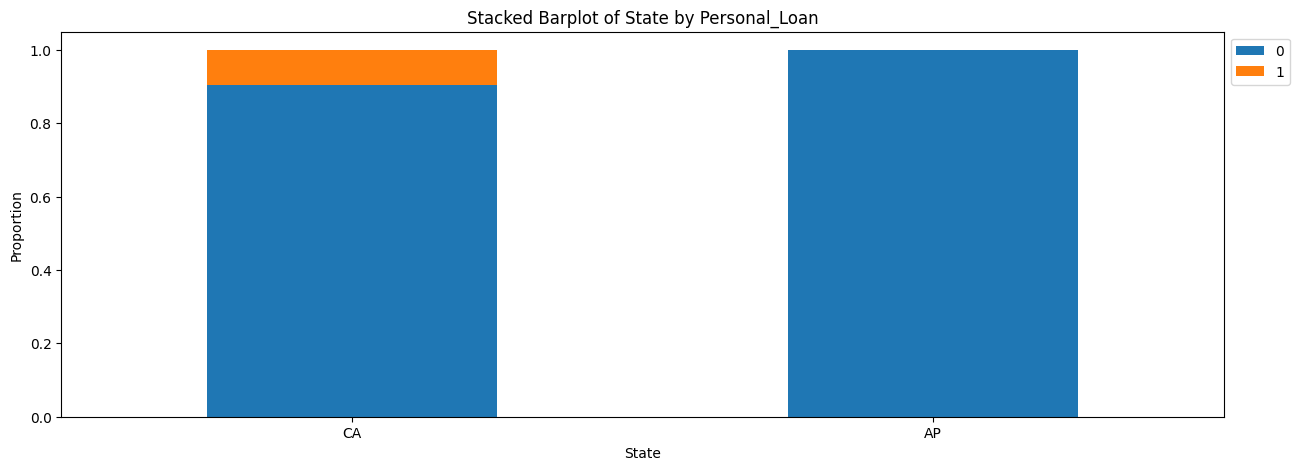

In [65]:
stacked_barplot(loan,'State','Personal_Loan')

* Not much diversity is observed in terms of number of states, though data suggest that customers from California are more willing to accept personal loan

### Key Insights based on EDA

In [68]:
loan.describe(include='all').T

count unique          top    freq      mean         std  \
Age                 5000.0    NaN          NaN     NaN   45.3384   11.463166   
Experience          5000.0    NaN          NaN     NaN   20.1346   11.415189   
Income              5000.0    NaN          NaN     NaN   73.7742   46.033729   
ZIPCode             5000.0  467.0      94720.0   169.0       NaN         NaN   
Family              5000.0    NaN          NaN     NaN    2.3964    1.147663   
CCAvg               5000.0    NaN          NaN     NaN  1.937938    1.747659   
Education           5000.0    3.0          1.0  2096.0       NaN         NaN   
Mortgage            5000.0    NaN          NaN     NaN   56.4988  101.713802   
Personal_Loan       5000.0    2.0          0.0  4520.0       NaN         NaN   
Securities_Account  5000.0    2.0          0.0  4478.0       NaN         NaN   
CD_Account          5000.0    2.0          0.0  4698.0       NaN         NaN   
Online              5000.0    2.0          1.0  2984.0       NaN         NaN   
CreditCard          5000.0    2.0          0.0  3530.0       NaN         NaN   
City                  5000    245  Los Angeles     375       NaN         NaN   
State                 5000      2           CA    4994       NaN         NaN   

                     min   25%   50%    75%    max  
Age                 23.0  35.0  45.0   55.0   67.0  
Experience           0.0  10.0  20.0   30.0   43.0  
Income               8.0  39.0  64.0   98.0  224.0  
ZIPCode              NaN   NaN   NaN    NaN    NaN  
Family               1.0   1.0   2.0    3.0    4.0  
CCAvg                0.0   0.7   1.5    2.5   10.0  
Education            NaN   NaN   NaN    NaN    NaN  
Mortgage             0.0   0.0   0.0  101.0  635.0  
Personal_Loan        NaN   NaN   NaN    NaN    NaN  
Securities_Account   NaN   NaN   NaN    NaN    NaN  
CD_Account           NaN   NaN   NaN    NaN    NaN  
Online               NaN   NaN   NaN    NaN    NaN  
CreditCard           NaN   NaN   NaN    NaN    NaN  
City                 NaN   NaN   NaN    NaN    NaN  
State                NaN   NaN   NaN    NaN    NaN

### Key Findings from Univariate Analysis:

* The age range of customers spans from a minimum of 23 years to a maximum of 67 years, with an average age of 45 years. The data seems to somewhat align with a uniform distribution.
* The years of experience range from 0 to 43, with an average of approximately 20 years.
* The minimum CCAvg is USD 0k (possibly indicating customers without credit cards), while the maximum is USD 1.9K, and the average stands at USD 10K.
* Around 69% of customers are not paying a mortgage, while the remaining 31% have mortgage amounts ranging from approximately USD 99K to 635K, with an average mortgage value between USD 180K and 200K.
* The leading cities with the highest number of customers are Los Angeles, followed by San Diego, San Francisco, Berkeley, and Sacramento.
* California (CA) emerges as the state with the highest concentration of customers.
* Family sizes predominantly consist of 1 member (29.4%), followed by 2 members (25.9%), 4 members (24.4%), and 3 members (20.2%).
* Customer education levels are as follows:
    * 41.9% have an undergraduate degree.
    * 28.1% hold a graduate degree.
    * 30.0% possess an advanced or professional degree.
* A significant 94% of customers do not have a CD_Account, while only 6% hold a CD_Account.
* 40.3% of customers do not use online banking services, leaving 59.7% who do.
* 70.6% of customers do not possess a credit card, while 29.4% do.
* Regarding the target variable, Personal_Loan, 90.4% of customers did not accept a loan, while 9.6% did.

### Key Insights from Multivariate Analysis:

* Correlation between variables:

    * A strong correlation (0.98) is observed between Age and Experience.
    * The relationship between Income and CCAvg is relatively weak (0.65).
    * The correlation between other variable pairs is minimal and not significant.

* Impact of variables on the target (Personal_Loan):

    * Income: Higher income increases the likelihood of loan acceptance.
    * Family Size: Larger family sizes correlate with higher loan acceptance rates.
    * CCAvg: Increased monthly spending leads to a higher probability of accepting a personal loan.
    * Education: Customers with higher education levels are more likely to accept a personal loan.
    * Mortgage: Higher mortgage amounts are linked to greater loan acceptance.
    * City: Santa Clara has the highest proportion of customers accepting loans, followed by Pasadena and Irvine.
    * State: Customers from California are more inclined to accept personal loans.
    * Securities Account: Customers with a securities account show a greater likelihood of accepting a loan.
    * CD Account: Having a CD Account increases the chances of accepting a personal loan.
    * Online Banking: No significant effect observed on loan acceptance.
    * Age, Experience, Credit Card: These variables show no notable influence on the target variable.

* Expected Target Dependencies:

    * Low Importance: Age, Experience, Credit Card, and Online Banking have minimal impact on loan acceptance.
    * Medium to High Importance: Income, Family Size, CCAvg, Education, Mortgage, Securities Account, and CD Account are expected to have a significant influence on loan acceptance.

## Model Building

### Data Preparation for modelling

Data Pre-proccesing actions take before :

1. Dropped unwanted ID column
2. Negative values in Experience column replaced by positive one, assuming its typo, median could have been used to replace -ve value but converting -ve to positive is natural fit.
3. ZIP Code Column was split into City and state then dropped

1. Creating the dummy variables

In [71]:
loan.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'City', 'State'],
      dtype='object')

In [72]:
df_model = pd.get_dummies(
    loan,
    columns=[
        "Education",
        "City",
        "State",
    ],
    drop_first=True,
)
df_model.head()

Age  Experience  Income ZIPCode  Family  CCAvg  Mortgage Personal_Loan  \
0   25           1      49   91107       4    1.6         0             0   
1   45          19      34   90089       3    1.5         0             0   
2   39          15      11   94720       1    1.0         0             0   
3   35           9     100   94112       1    2.7         0             0   
4   35           8      45   91330       4    1.0         0             0   

  Securities_Account CD_Account Online CreditCard  Education_2  Education_3  \
0                  1          0      0          0            0            0   
1                  1          0      0          0            0            0   
2                  0          0      0          0            0            0   
3                  0          0      0          0            1            0   
4                  0          0      0          1            1            0   

   City_Alameda  City_Alamo  City_Albany  City_Alhambra  City_Anaheim  \
0             0           0            0              0             0   
1             0           0            0              0             0   
2             0           0            0              0             0   
3             0           0            0              0             0   
4             0           0            0              0             0   

   City_Antioch  City_Aptos  City_Arcadia  City_Arcata  City_Bakersfield  \
0             0           0             0            0                 0   
1             0           0             0            0                 0   
2             0           0             0            0                 0   
3             0           0             0            0                 0   
4             0           0             0            0                 0   

   City_Baldwin Park  City_Banning  City_Bella Vista  City_Belmont  \
0                  0             0                 0             0   
1                  0             0                 0             0   
2                  0             0                 0             0   
3                  0             0                 0             0   
4                  0             0                 0             0   

   City_Belvedere Tiburon  City_Ben Lomond  City_Berkeley  City_Beverly Hills  \
0                       0                0              0                   0   
1                       0                0              0                   0   
2                       0                0              1                   0   
3                       0                0              0                   0   
4                       0                0              0                   0   

   City_Bodega Bay  City_Bonita  City_Boulder Creek  City_Brea  City_Brisbane  \
0                0            0                   0          0              0   
1                0            0                   0          0              0   
2                0            0                   0          0              0   
3                0            0                   0          0              0   
4                0            0                   0          0              0   

   City_Burlingame  City_Calabasas  City_Camarillo  City_Campbell  \
0                0               0               0              0   
1                0               0               0              0   
2                0               0               0              0   
3                0               0               0              0   
4                0               0               0              0   

   City_Canoga Park  City_Capistrano Beach  City_Capitola  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0            

In [73]:
# get shape of the dataset
df_model.shape

(5000, 259)

2. Splitting the data

In [75]:
# Define Variables
x = df_model.drop(["Personal_Loan"], axis=1)
y = df_model["Personal_Loan"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # 1 or 42 are choosen options

In [76]:
# Show  train and test dataset shape
print(f'X_train shape:{X_train.shape}')
print(f'X_test shape:{X_test.shape}')

X_train shape:(3500, 258)
X_test shape:(1500, 258)


In [77]:
# % of target variable classes in the train and test sets
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.907714
1    0.092286
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.895333
1    0.104667
Name: Personal_Loan, dtype: float64


### Model Evaluation Criterion

A model's incorrect predictions can lead to two types of errors:

1. False Positive: Predicting a customer would take a loan, but they actually wouldn’t.
    * This results in wasted resources.
2. False Negative: Predicting a customer would not take a loan, but they actually would.
    * This leads to missed opportunities.

#### Which error should we prioritize minimizing?
    * A False Negative is more critical as it implies a missed opportunity to provide a loan to a willing customer.

#### How to reduce False Negatives?
    * To mitigate this, we aim to maximize recall, as higher recall reduces the chances of False Negatives.

### Next Steps:
1. Metric Functions:
    * Develop a get_recall_score function to evaluate model performance.
2. Visualization:
    * Create a make_confusion_matrix function to visualize confusion matrices and analyze the results of the models.

In [92]:
# Define Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

# Define Function for confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

1. **Logistic Regression**  
Let's begin by defining functions to aid in evaluating the performance of the Logistic Regression model:  

- **`confusion_matrix_sklearn_with_threshold`**: Generates the confusion matrix for the classification model.  
- **`model_performance_classification_sklearn_with_threshold`**: Calculates various evaluation metrics.  
- **`plot_prec_recall_vs_thresh`**: Visualizes precision and recall against different thresholds.  

In [93]:
# Define function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [94]:
# Define function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [82]:
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

### Building the Model

In [96]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is applied as it is faster for high-dimensional data
# Fitting a logistic regression model to the data
lg = LogisticRegression(solver="newton-cg", random_state=42) # 1 or 42 are choosen options
model = lg.fit(X_train, y_train)

### Finding the coefficients

In [97]:
# Check the coefficients and intercept of the model
coef_df = pd.DataFrame(np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Age  Experience    Income   ZIPCode   Family     CCAvg  \
Coefficients -0.001932    0.012364  0.054353 -0.000128  0.63029  0.139156   

              Mortgage  Securities_Account  CD_Account    Online  CreditCard  \
Coefficients  0.000903           -0.593877    3.167284 -0.545491   -0.926696   

              Education_2  Education_3  City_Alameda  City_Alamo  City_Albany  \
Coefficients     3.178021      3.25984     -0.165683   -0.008011    -0.065214   

              City_Alhambra  City_Anaheim  City_Antioch  City_Aptos  \
Coefficients      -0.628648     -0.119447     -0.160299   -0.237128   

              City_Arcadia  City_Arcata  City_Bakersfield  City_Baldwin Park  \
Coefficients     -0.272224    -0.364529          0.602007          -0.098722   

              City_Banning  City_Bella Vista  City_Belmont  \
Coefficients      0.548308          0.017953      0.006775   

              City_Belvedere Tiburon  City_Ben Lomond  City_Berkeley  \
Coefficients               -0.109442        -0.180022       0.212429   

              City_Beverly Hills  City_Bodega Bay  City_Bonita  \
Coefficients            0.395453        -0.036529     0.166304   

              City_Boulder Creek  City_Brea  City_Brisbane  City_Burlingame  \
Coefficients           -0.317931  -0.328291       -0.43991        -0.216436   

              City_Calabasas  City_Camarillo  City_Campbell  City_Canoga Park  \
Coefficients        0.446882        0.048152        0.79728         -0.214849   

              City_Capistrano Beach  City_Capitola  City_Cardiff By The Sea  \
Coefficients               -0.15838       0.148734                 0.533596   

              City_Carlsbad  City_Carpinteria  City_Carson  \
Coefficients       -0.22106          0.042962    -0.124675   

              City_Castro Valley  City_Ceres  City_Chatsworth  City_Chico  \
Coefficients            0.071755   -0.006661        -0.422913    0.512098   

              City_Chino  City_Chino Hills  City_Chula Vista  \
Coefficients   -0.001184         -0.177222          0.189752   

              City_Citrus Heights  City_Claremont  City_Clearlake  \
Coefficients            -0.000466        0.033966       -0.017711   

              City_Clovis  City_Concord  City_Costa Mesa  City_Crestline  \
Coefficients    -0.005493     -0.037398        -0.018739       -0.038221   

              City_Culver City  City_Cupertino  City_Cypress  City_Daly City  \
Coefficients          -0.19827       -0.156423      0.207491       -0.028867   

              City_Danville  City_Davis  City_Diamond Bar  City_Edwards  \
Coefficients      -0.012593    0.009763         -0.103717     -0.030695   

              City_El Dorado Hills  City_El Segundo  City_El Sobrante  \
Coefficients             -0.031534        -0.042026          0.427489   

              City_Elk Grove  City_Emeryville  City_Encinitas  City_Escondido  \
Coefficients       -0.106365        -0.626749       -0.069087       -0.001761   

              City_Eureka  City_Fairfield  City_Fallbrook  City_Fawnskin  \
Coefficients    -0.001372        0.434497       -0.567439       0.481162   

              City_Folsom  City_Fremont  City_Fresno  City_Fullerton  \
Coefficients    -0.020108     -0.236252    -0.052381       -0.084703   

              City_Garden Grove  City_Gilroy  City_Glendale  City_Glendora  \
Coefficients          -0.063263     0.630971       0.777859      -0.057595   

              City_Goleta  City_Greenbrae  City_Hacienda Heights  \
Coefficients     -0.29926        0.700003               -0.07117   

              City_Half Moon Bay  City_Hawthorne  City_Hayward  \
Coefficients           -0.015223        -0.06423      0.151198   

              City_Hermosa Beach  City_Highland  City_Hollister  City_Hopland  \
Coefficients           -0.173896      -0.007714        -0.02211     -0.048302   

              City_Huntington Beach  City_Imperial  City_Inglewood  \
Coefficients               0.148966      -0.013478       -0.038394   



### Coefficient interpretations

In [98]:
# The positive coefficients
coef_df[coef_df['Coefficients']>0].sort_values(by='Coefficients',ascending=False).T

Education_3  Education_2  CD_Account  City_La Jolla  \
Coefficients      3.25984     3.178021    3.167284        0.97473   

              City_Campbell  City_Riverside  City_Glendale  City_Oak View  \
Coefficients        0.79728        0.789131       0.777859       0.764171   

              City_Whittier  City_Sunnyvale  City_Greenbrae  \
Coefficients       0.750013        0.719211        0.700003   

              City_Rohnert Park  City_Gilroy   Family  City_West Sacramento  \
Coefficients           0.633158     0.630971  0.63029              0.620353   

              City_Bakersfield  City_Ojai  City_Banning  \
Coefficients          0.602007   0.568321      0.548308   

              City_Cardiff By The Sea  City_Chico  City_Richmond  \
Coefficients                 0.533596    0.512098       0.498707   

              City_Santa Cruz  City_Moss Landing  City_Woodland Hills  \
Coefficients         0.497559           0.495988             0.494577   

              City_Venice  City_Vallejo  City_Fawnskin  City_Saratoga  \
Coefficients     0.493368      0.488627       0.481162       0.461266   

              City_Calabasas  City_Fairfield  City_El Sobrante  City_Reseda  \
Coefficients        0.446882        0.434497          0.427489     0.418617   

              City_Lomita  City_Laguna Niguel  City_Irvine  \
Coefficients     0.409271            0.408602     0.399281   

              City_Beverly Hills  City_San Francisco  City_Los Altos  \
Coefficients            0.395453            0.375613        0.359917   

              City_Placentia  City_Valencia  City_Santa Clarita  \
Coefficients        0.350219       0.337652            0.334989   

              City_Thousand Oaks  City_San Luis Obispo  City_Seaside  \
Coefficients            0.332091              0.329768      0.305507   

              City_Ridgecrest  City_San Jose  City_Montebello  \
Coefficients         0.301154       0.277041          0.25429   

              City_Santa Barbara  City_San Clemente  City_Berkeley  \
Coefficients            0.253149           0.245141       0.212429   

              City_Cypress  City_Chula Vista  City_Santa Monica  City_Bonita  \
Coefficients      0.207491          0.189752           0.181705     0.166304   

              City_Hayward  City_Huntington Beach  City_Capitola     CCAvg  \
Coefficients      0.151198               0.148966       0.148734  0.139156   

              City_San Bernardino  City_Long Beach  City_Studio City  \
Coefficients             0.126577         0.122828          0.117154   

              City_Ventura  City_Castro Valley  City_Monrovia  \
Coefficients      0.104211            0.071755       0.067642   

              City_Sacramento    Income  City_Camarillo  City_Carpinteria  \
Coefficients         0.063052  0.054353        0.048152          0.042962   

              City_Santa Clara  City_Tehachapi  City_Claremont  \
Coefficients          0.038636        0.035475        0.033966   

              City_Palo Alto  City_Norwalk  City_San Rafael  City_Bella Vista  \
Coefficients        0.030957      0.029879         0.027216          0.017953   

              Experience  City_Pacific Grove  City_Davis  City_Belmont  \
Coefficients    0.012364            0.010656    0.009763      0.006775   

              City_Torrance  Mortgage  City_San Diego  
Coefficients       0.004792  0.000903        0.000213

In [99]:
# The Negative coefficients
coef_df[coef_df['Coefficients']<0].sort_values(by='Coefficients').T

CreditCard  City_Monterey  City_Loma Linda  \
Coefficients   -0.926696      -0.890506        -0.756962   

              City_Manhattan Beach  City_Alhambra  City_Emeryville  \
Coefficients             -0.687886      -0.628648        -0.626749   

              Securities_Account  City_Menlo Park  City_Fallbrook    Online  \
Coefficients           -0.593877        -0.593227       -0.567439 -0.545491   

              City_Redondo Beach  City_Northridge  City_Tustin  \
Coefficients           -0.534803        -0.530388      -0.5278   

              City_North Hollywood  City_La Mesa  City_Milpitas  \
Coefficients             -0.450408     -0.449587      -0.445343   

              City_Brisbane  City_Chatsworth  City_Stanford  \
Coefficients       -0.43991        -0.422913      -0.412222   

              City_Newbury Park  City_Pasadena  City_San Anselmo  City_Arcata  \
Coefficients          -0.374398       -0.37277         -0.372195    -0.364529   

              City_Mission Viejo  City_Redwood City  City_Brea  \
Coefficients           -0.355682           -0.34866  -0.328291   

              City_Boulder Creek  City_Roseville  City_Goleta  \
Coefficients           -0.317931       -0.313569     -0.29926   

              City_South San Francisco  City_Palos Verdes Peninsula  \
Coefficients                 -0.290948                    -0.285941   

              City_Orange  City_San Mateo  City_Arcadia  City_San Marcos  \
Coefficients    -0.279765       -0.279616     -0.272224        -0.270777   

              City_Walnut Creek  City_Redlands  City_Ladera Ranch  \
Coefficients          -0.254309      -0.246288          -0.243692   

              City_Los Angeles  City_Aptos  City_Fremont  City_Laguna Hills  \
Coefficients         -0.237179   -0.237128     -0.236252          -0.223044   

              City_Carlsbad  City_Pomona  City_Burlingame  City_Canoga Park  \
Coefficients       -0.22106    -0.220218        -0.216436         -0.214849   

              City_Oakland  City_Sherman Oaks  City_Culver City  \
Coefficients     -0.207122          -0.200465          -0.19827   

              City_San Luis Rey  City_Salinas  City_Merced  City_Seal Beach  \
Coefficients          -0.189507     -0.186684    -0.184855        -0.183712   

              City_Mountain View  City_Ben Lomond  City_Chino Hills  \
Coefficients           -0.181599        -0.180022         -0.177222   

              City_Hermosa Beach  City_Sylmar  City_Alameda  City_Antioch  \
Coefficients           -0.173896    -0.170649     -0.165683     -0.160299   

              City_Capistrano Beach  City_Santa Ynez  City_Cupertino  \
Coefficients               -0.15838         -0.15798       -0.156423   

              City_Livermore  City_West Covina  City_Novato  \
Coefficients       -0.155695         -0.148647    -0.135321   

              City_Los Alamitos  Intercept  City_Lake Forest  \
Coefficients          -0.134518  -0.132109         -0.130741   

              City_Sierra Madre  City_Carson  City_Anaheim  City_Santa Ana  \
Coefficients          -0.128358    -0.124675     -0.119447       -0.119435   

              City_San Juan Capistrano  City_Belvedere Tiburon  \
Coefficients                 -0.109583               -0.109442   

              City_Porter Ranch  City_Elk Grove  City_Diamond Bar  \
Coefficients          -0.108499       -0.106365         -0.103717   

              City_Rancho Cucamonga  City_Poway  City_Marina  \
Coefficients              -0.100458   -0.099961    -0.099909   

              City_Baldwin Park  City_Sanger  City_San Leandro  \
Coefficients          -0.098722    -0.098682         -0.097522   

              City_La Mirada  City_San Juan Bautista  City_Newport Beach  \
Coefficients       -0.093829                -0.09121           -0.085354   

              City_Fullerton  City_Sonora  City_Redding  \
Coefficients       -0.084703    -0.081345     -0.081298   

              City_March Air Reserve Base  City_Hacienda Heigh

In [100]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_test.columns).sort_values(by='Odds',ascending=False)

Odds  Change_odd%
Education_3           26.045379  2504.537935
Education_2           23.999222  2299.922164
CD_Account            23.742921  2274.292084
City_La Jolla          2.650452   165.045194
City_Campbell          2.219495   121.949546
...                         ...          ...
City_Alhambra          0.533312   -46.668772
City_Manhattan Beach   0.502637   -49.736267
City_Loma Linda        0.469089   -53.091064
City_Monterey          0.410448   -58.955201
CreditCard             0.395859   -60.414054

[258 rows x 2 columns]

The top variables affecting the target variable positively are:

CD_Account : increases the customer odds of accepting a personal loan by 25 times

The top variables affecting the target variable Negatively are:

CreditCard : decreases the customer odds of accepting a personal loan by 0.44 times
Securities_Account : decreases the customer odds of accepting a personal loan by 0.42 times

## Model Performance Improvement

1- We derive the optimal threshold from the AUC,ROC curve

### Model Performamce Evaluation

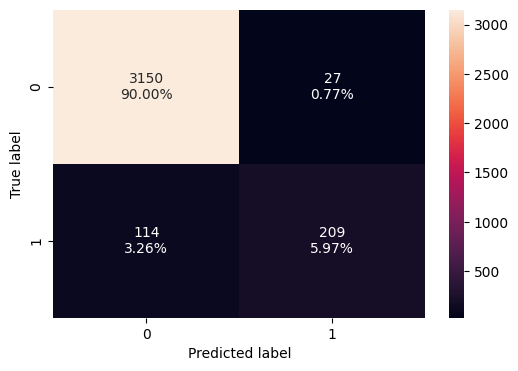

In [101]:
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [102]:
# Checking performance on test set
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.959714  0.647059   0.885593  0.747764

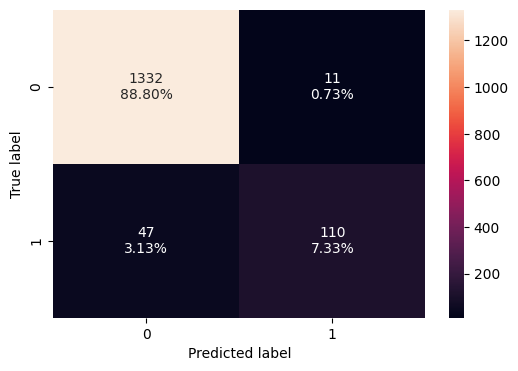

In [103]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [104]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision        F1
0  0.961333  0.700637   0.909091  0.791367

#### Observation: The Recall on the training and test sets are close in value 62% and 68% respectively, yet the model performance needs to be improved as viewed from the confusion matrix as well:

    * TP 6.20% which is less than tha 9% positive class of the dataset

#### Plotting the ROC-AUC for both training and test set
    * ROC-AUC on training set

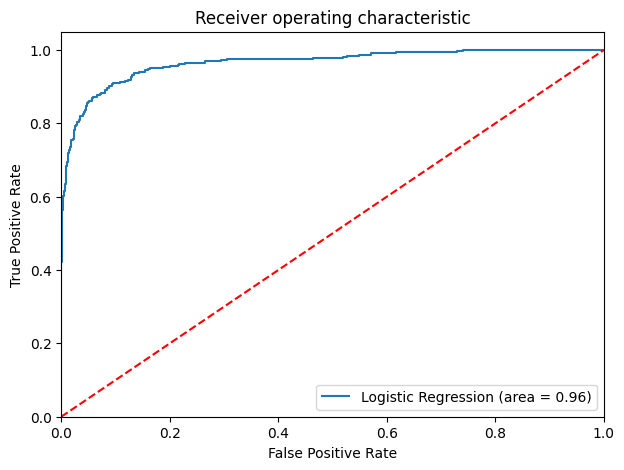

In [105]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The AUC scores for the ROC curves of the test and train models are 0.96 and 0.97, respectively, which are close to 1. This suggests that the model performs very well but could benefit from further refinement. 
Therefore, our strategy involves adjusting the threshold and evaluating how it impacts the model's performance.

In [106]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
y_predict_train_proba = lg.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_predict_train_proba)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(f'The optimal threshhold from ROC AUC curve is : {optimal_threshold_auc_roc}')

The optimal threshhold from ROC AUC curve is : 0.1080945832637623


## Model Performance Comparison and Final Model Selection

### Checking model performance on training set

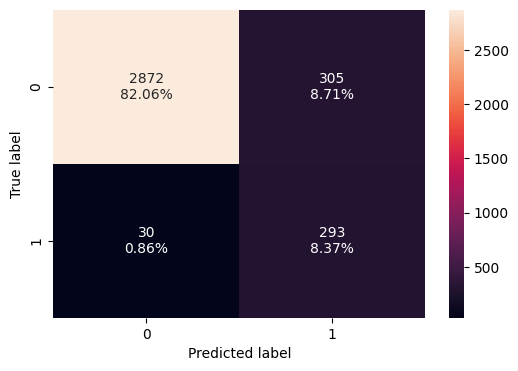

In [107]:
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

## Actionable Insights and Business Recommendations


In [108]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [109]:
# from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="newton-cg", n_jobs=-1, random_state=42, max_iter=100) # random_state could be 1 or 42 as prefrerred value

In [110]:
X_train.shape

(3500, 258)

In [111]:
# we will first build model with all varaible
sfs = SFS(
    model,
    k_features=257,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 258 out of 258 | elapsed:    6.6s finished

[2024-12-08 09:38:25] Features: 1/257 -- score: 0.38054389499421565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 210 out of 257 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:    1.1s finished

[2024-12-08 09:38:27] Features: 2/257 -- score: 0.5244196482901301[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    1.2s finished

[2024-12-08 09:38:28] Features: 3/257 -- score: 0.5667465432171315[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 208 out of 255 | elapsed:    1.1s remaining:

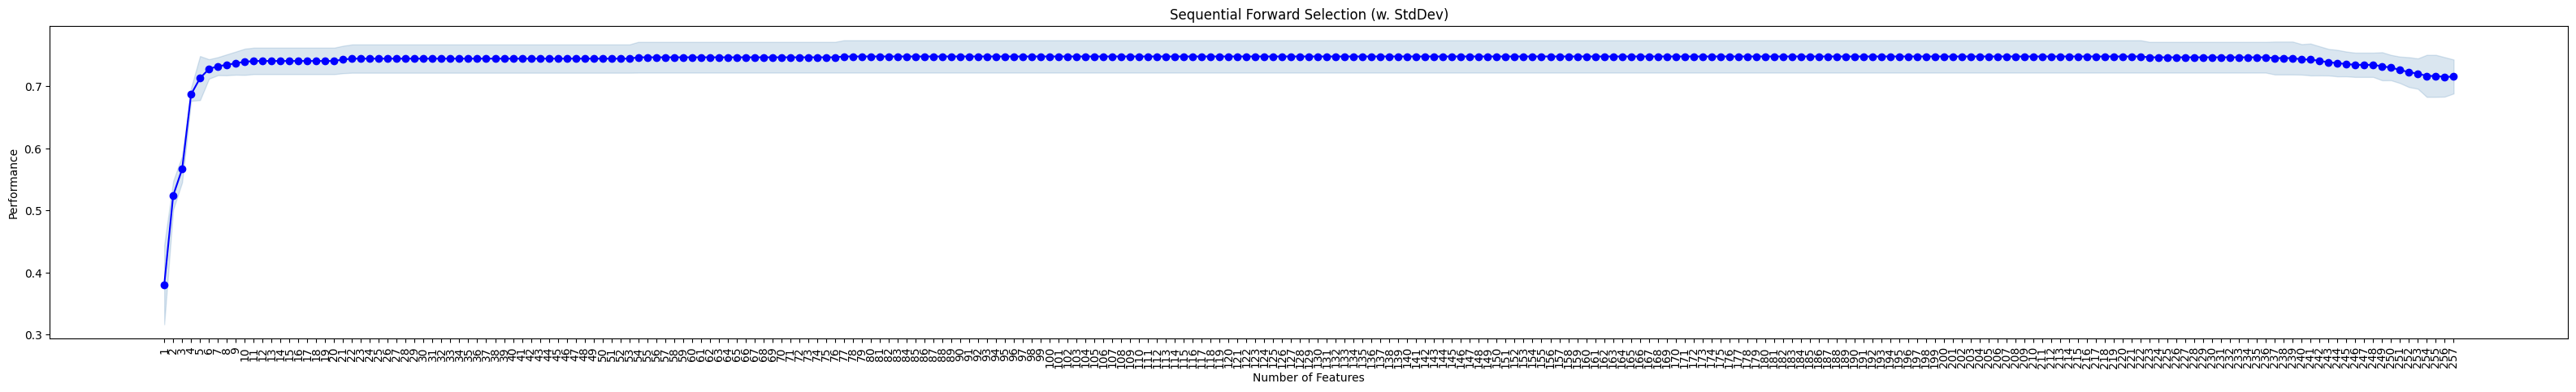

In [112]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_dev", figsize=(40, 5))

plt.title("Sequential Forward Selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()

We can see that from approx the 22nd feature the performance start to stay constant, hence let us create a new model with 20 variables only and display the top 20 features 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 258 out of 258 | elapsed:    2.6s finished

[2024-12-08 10:09:52] Features: 1/22 -- score: 0.38054389499421565[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 210 out of 257 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:    1.0s finished

[2024-12-08 10:09:53] Features: 2/22 -- score: 0.5244196482901301[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:    1.2s finished

[2024-12-08 10:09:54] Features: 3/22 -- score: 0.5667465432171315[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 208 out of 255 | elapsed:    1.0s remaining:   

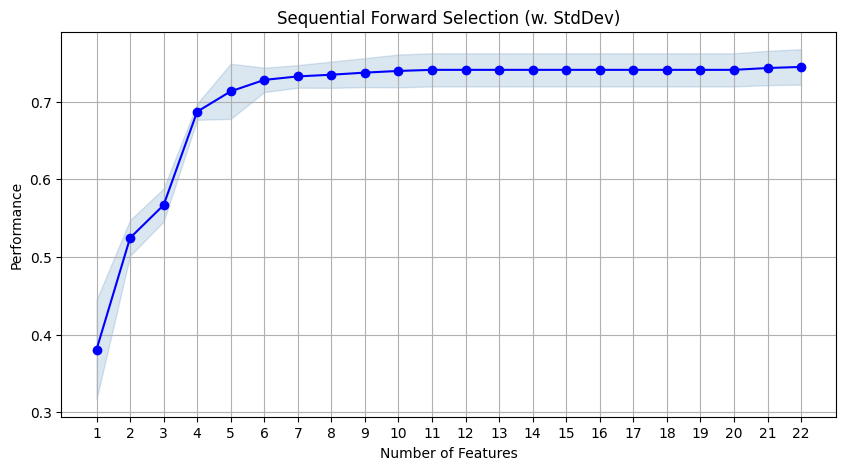

In [113]:
sfs1 = SFS(
    model,
    k_features=22,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind="std_dev", figsize=(10, 5))

plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

Perfect! Now let us display the most important feature names.:


In [114]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
X_train.columns[feat_cols]

[2, 4, 8, 10, 11, 12, 20, 22, 36, 44, 47, 48, 51, 65, 67, 75, 79, 102, 112, 179, 199, 207]


Index(['Income', 'Family', 'CD_Account', 'CreditCard', 'Education_2',
       'Education_3', 'City_Arcadia', 'City_Bakersfield', 'City_Burlingame',
       'City_Carlsbad', 'City_Castro Valley', 'City_Ceres', 'City_Chino',
       'City_Danville', 'City_Diamond Bar', 'City_Escondido', 'City_Fawnskin',
       'City_La Jolla', 'City_Loma Linda', 'City_Riverside', 'City_San Marcos',
       'City_Santa Barbara'],
      dtype='object')

## Performance Evaluation of the Simpified model (variables = 22)

In [115]:
X_train_sfs = X_train[X_train.columns[feat_cols]]

# Creating new X_test with the same variables that we selected for X_test
X_test_sfs = X_test[X_train_sfs.columns]

# X_train_sfs = X_train.columns[X_train.columns[feat_cols]]
# X_test_sfs = X_test[X_train_sfs.columns]
print(f'''X_train shape:{X_train_sfs.shape}
Y_test shape:{X_test_sfs.shape}''')

X_train shape:(3500, 22)
Y_test shape:(1500, 22)


In [116]:
X_train_sfs

Income  Family CD_Account CreditCard  Education_2  Education_3  \
1840      23       4          0          0            0            1   
2115      30       3          0          0            0            0   
4437      63       2          0          0            0            0   
1146      71       1          0          0            0            0   
2486     130       1          0          0            0            0   
...      ...     ...        ...        ...          ...          ...   
4426     140       1          0          0            0            0   
466       13       2          0          0            0            1   
3092     113       2          0          0            0            0   
3772     152       2          0          0            0            0   
860       30       2          0          0            1            0   

      City_Arcadia  City_Bakersfield  City_Burlingame  City_Carlsbad  \
1840             0                 0                0              0   
2115             0                 0                0              0   
4437             0                 0                0              0   
1146             0                 0                0              0   
2486             0                 0                0              0   
...            ...               ...              ...            ...   
4426             0                 0                0              0   
466              0                 0                0              0   
3092             0                 0                0              0   
3772             0                 0                0              0   
860              0                 0                0              0   

      City_Castro Valley  City_Ceres  City_Chino  City_Danville  \
1840                   0           0           0              0   
2115                   0           0           0              0   
4437                   0           0           0              0   
1146                   0           0           0              0   
2486                   0           0           0              0   
...                  ...         ...         ...            ...   
4426                   0           0           0              0   
466                    0           0           0              0   
3092                   0           0           0              0   
3772                   0           0           0              0   
860                    0           0           0              0   

      City_Diamond Bar  City_Escondido  City_Fawnskin  City_La Jolla  \
1840                 0               0              0              0   
2115                 0               0              0              0   
4437                 0               0              0              0   
1146                 0               0              0              0   
2486                 0               0              0              0   
...                ...             ...            ...            ...   
4426                 0               0              0              0   
466                  0               0              0              0   
3092                 0               0              0              0   
3772                 0               0              0              0   
860                  0               0              0              0   

      City_Loma Linda  City_Riverside  City_San Marcos  City_Santa Barbara  
1840                0               0                0                   1  
2115                0               0                0                   0  
4437                0               1                0                   0  
1146                0               0                0                   0  
2486                0               0                0                   0  
...               ...             ...              ...                 ...  
4426                0               0                0             

In [117]:
# Fitting logistic regession model

log_sfs = LogisticRegression(
    solver="newton-cg", penalty=None, verbose=True, n_jobs=-1, random_state=1
)
# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000
# max_iter indicates number of iteration needed to converge
log_sfs.fit(X_train_sfs, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


LogisticRegression(n_jobs=-1, penalty=None, random_state=1, solver='newton-cg',
                   verbose=True)

### Let's Look at model performance

* On training set

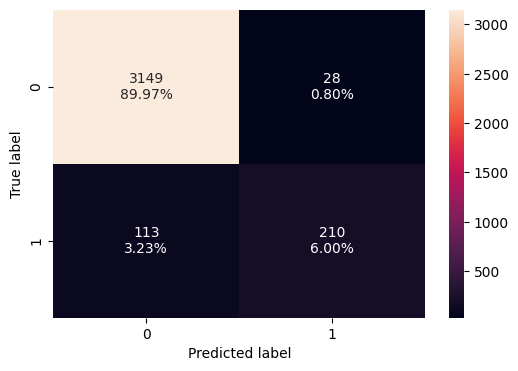

In [118]:
confusion_matrix_sklearn_with_threshold(log_sfs, X_train_sfs, y_train)

In [119]:
log_reg_model_train_perf_SFS = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_train_sfs, y_train
)
print("Training performance:")
log_reg_model_train_perf_SFS

Training performance:


Accuracy    Recall  Precision        F1
0  0.959714  0.650155   0.882353  0.748663

* On test set

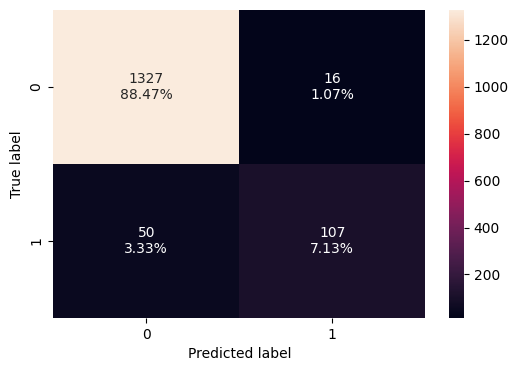

In [120]:
confusion_matrix_sklearn_with_threshold(log_sfs, X_test_sfs, y_test)

In [121]:
log_reg_model_test_perf_SFS = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_test_sfs, y_test
)
print("Test set performance:")
log_reg_model_test_perf_SFS

Test set performance:


Accuracy    Recall  Precision        F1
0     0.956  0.681529   0.869919  0.764286

The Recall is much less than after applying the feature selection with the default threshold 0.5 , hence we will derive another model with a threshold 0.1 and observe its performance

In [122]:
log_reg_model_train_perf_SFS_tre = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_train_sfs, y_train,  threshold=0.1
)
print("Training performance:")
log_reg_model_train_perf_SFS_tre

Training performance:


Accuracy    Recall  Precision        F1
0  0.903143  0.873065   0.486207  0.624585

In [123]:
log_reg_model_test_perf_SFS_tre = model_performance_classification_sklearn_with_threshold(
    log_sfs, X_test_sfs, y_test, threshold=0.1
)

print("Test set performance:")
log_reg_model_test_perf_SFS

Test set performance:


Accuracy    Recall  Precision        F1
0     0.956  0.681529   0.869919  0.764286

The Recall of the train and test sets are highly mismatched, where recall train = 0.87 and recall test = 0.62

## Logistic Regression Models Comparison:

|Sr|Model name| train_performance |recall (train) |test_performance |recall(test)| threshold | no. of variables|
|:--:|:---------|:--------------------|:---------------|:------------|:------------:|:------------:|:------------:|
|1|lg|log_reg_model_train_perf|0.6798|log_reg_model_test_perf|0.6242| 0.5 |257|
|2|lg|log_reg_model_train_perf_threshold_auc_roc|0.8761|log_reg_model_test_perf_threshold_auc_roc|0.7919|0.187|257|
|3|lg|log_reg_model_train_perf_threshold_curve|0.9154|log_reg_model_test_perf_threshold_curve|0.8792|0.10|257|
|4|log_sfs|log_reg_model_train_perf_SFS|0.6798|log_reg_model_test_perf_SFS|0.6241|0.5|22|
|5|log_sfs|log_reg_model_train_perf_SFS_tre|0.8731|log_reg_model_test_perf_SFS_tre|0.6242|0.1|22|


Observation:
- The best performing model is **Model_3** lg model tuned to a **threshold of 0.1** and uses **257 variables**

Conclusion:
- The very low threshold yielding a good model predictibility is explained by the very low percentage of class 1 customers (who accept personal loan) in the original data set.
- This model will be used in the final comparison between Decision tree models


# Model building
## 2. Decision Tree

In addition to using the : The **get_recall_score** and **make_confusion_matrix** functions, we will define the function **plot_tree** to plot the decision trees for the models under study

In [124]:
#function to plot a decision tree
def plot_tree(model, Predictor):
    feature_names = Predictor.columns.to_list()
    plt.figure(figsize=(20, 30))
    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # below code will add arrows to the decision tree split if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

### Building the original tree $T_0$

The starting point is building the original full tree model with the default hyperparameters and observe:
- Model performance
- Variables importance
- Model Improvement strategy 

Yet, It was noted that the frequence of classes in training set is:

|Class|Frequence|
|:---:|:-----:|
|0|0.905429|
|1|0.094571|  

To avoid ending up with a bias model, we should balance the class weights (using the class_weight hyperparamater) in the decision tree classifer.

In [125]:
#creating the decission tree model
t_0 = DecisionTreeClassifier(criterion="gini", class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

In [126]:
#fitting the training data
t_0.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

### Model performance Evaluation of $T_0$

In [127]:
#Calculating the Recall for train and test data
Recall_Train_T_0 = get_recall_score(t_0, X_train, y_train)
print(f'Recall for T_0 on Train Data = {Recall_Train_T_0}')
Recall_Test_T_0 = get_recall_score(t_0, X_test, y_test)
print(f'Recall for T_0 on Test Data = {Recall_Test_T_0}')

Recall for T_0 on Train Data = 1.0
Recall for T_0 on Test Data = 0.8980891719745223


A quiet big mismatch is observed between train and test sets performance, hence it is assumed that the T_0 model is overfitting the data.
let us observe further the confusion matrix and the tree structure.

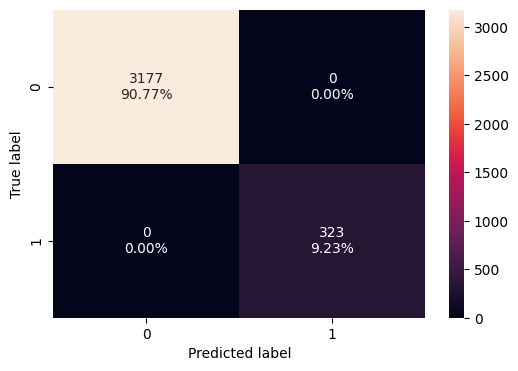

In [128]:
confusion_matrix_sklearn(t_0, X_train, y_train)

As assumed, the model is perfectly overfitting the data as observed from the confusion matric the FN & FP are 0%

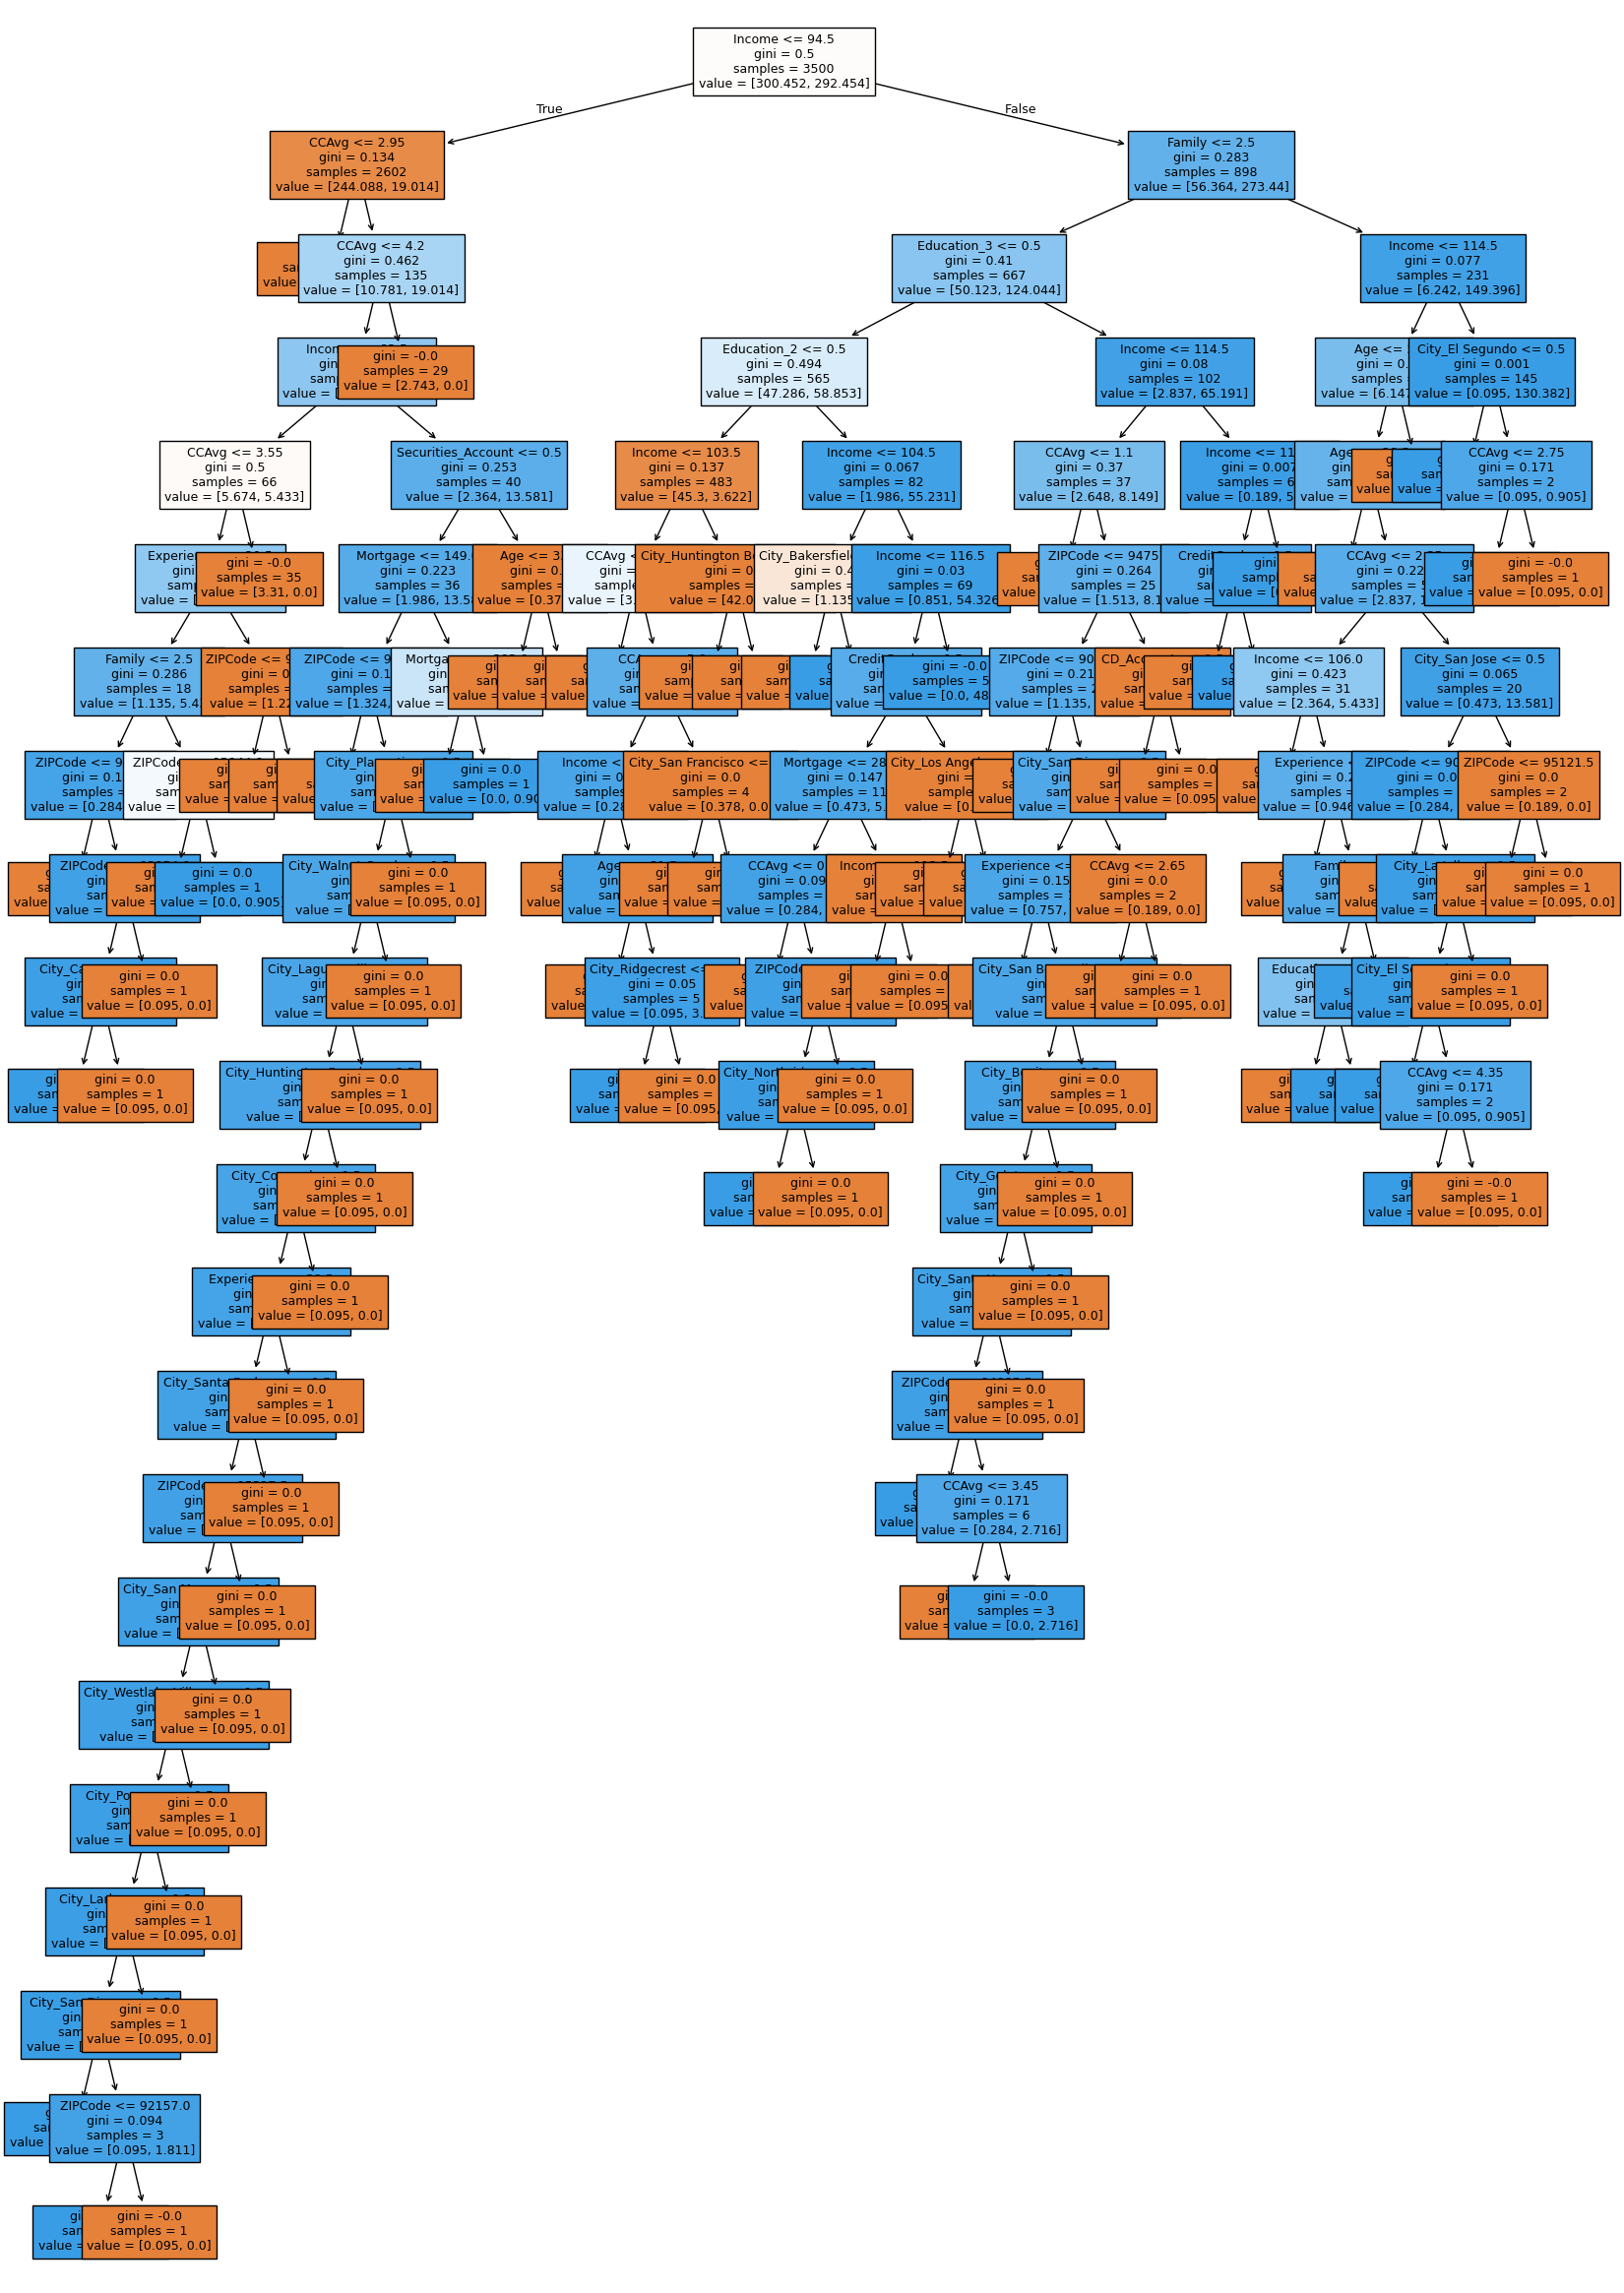

In [129]:
#plotting the tree
plot_tree(t_0,X_train)

- The original tree $T_0$ is quiet complicated and is overfitting the training data set, hence pre-prunning and post proning are to be considered to improve the model performance.
- One very interesting observation still on $T_0$ is that the first split was on the "Income" variable, hence let us observe first how the variable importances look like

In [132]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

def view_nd_plot_importance(model, predictors):
    print("The features importances:")
    print(
        pd.DataFrame(
            model.feature_importances_, columns=["Imp"], index=predictors.columns
        ).sort_values(by="Imp", ascending=False)
    )

    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 65))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [predictors.columns[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

The features importances:
                     Imp
Income          0.605552
Education_2     0.141355
CCAvg           0.109042
Education_3     0.048884
Family          0.036306
...                  ...
City_Imperial   0.000000
City_Inglewood  0.000000
City_Irvine     0.000000
City_La Mesa    0.000000
State_CA        0.000000

[258 rows x 1 columns]


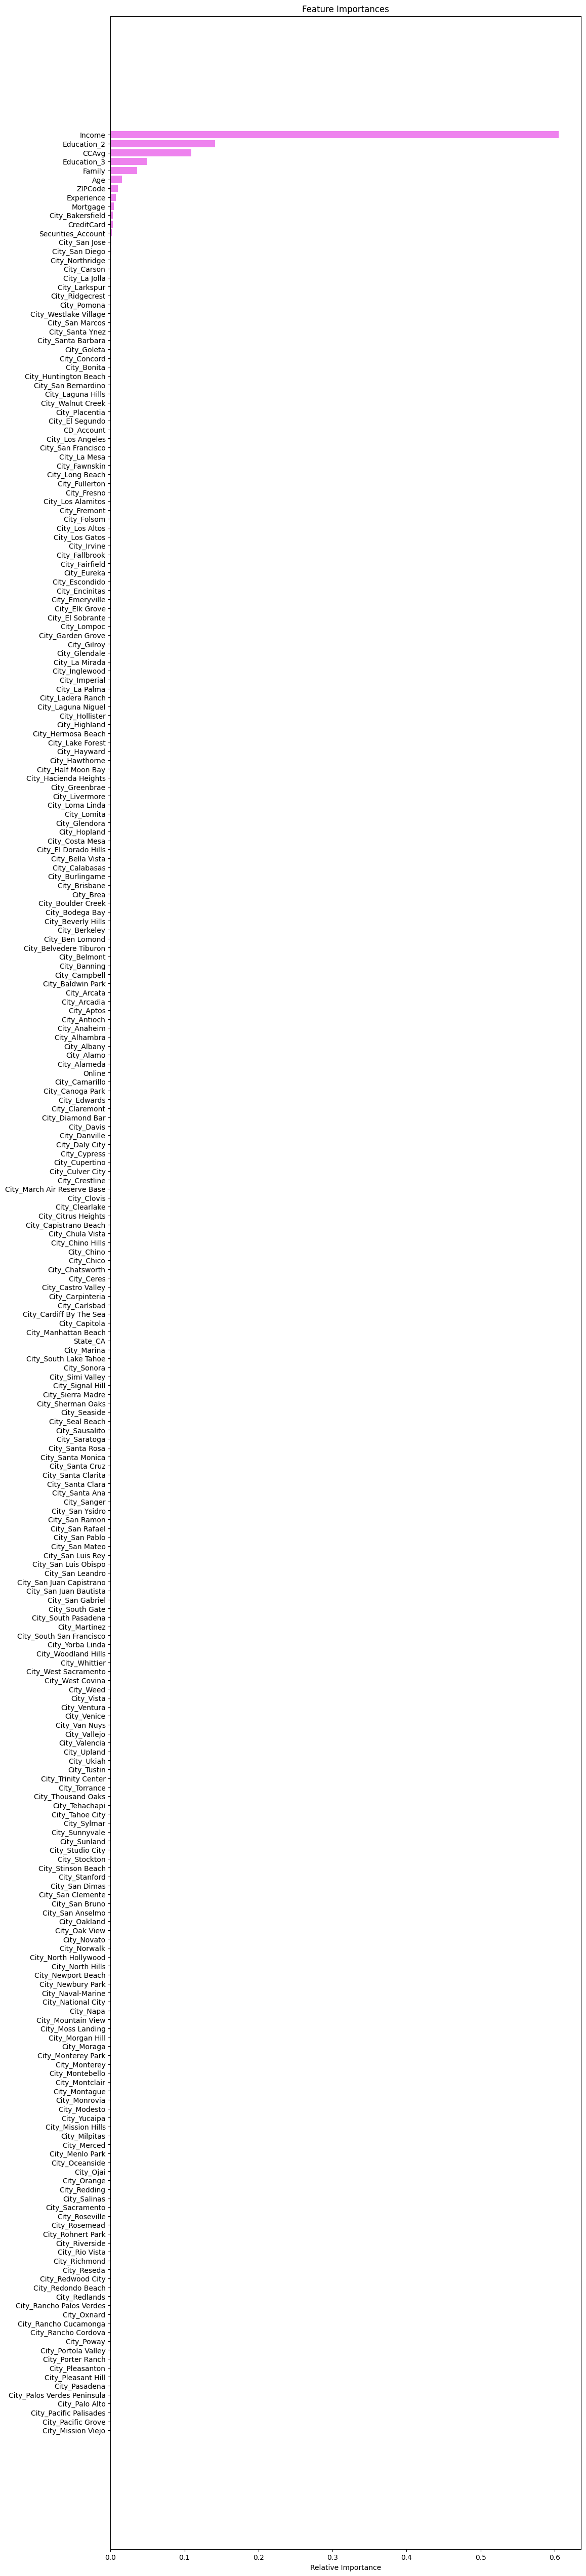

In [133]:
view_nd_plot_importance(t_0, X_train)

- It is observed that the top importance variable is Income and the least importance are the cities (except for Los Angles that contributes slightly to the model predictibility)
- The top 5 variables are :
    - Income          
    - Education_2     
    - CCAvg           
    - Education_3     
    - Family          

## Model performance improvement

### 1. Pre-prunning via hyperparameter tuning 
The approach is: applying GridSearch to compute the optimum hyperparameter values


In [135]:
#let us get the max depth of T_0 to have an idea how to tune our parameters
print(f'''The max depth of the t_0 =  {t_0.tree_.max_depth}
The node_count ={t_0.tree_.node_count}
The number of leaves = {t_0.tree_.n_leaves}''')

The max depth of the t_0 =  21
The node_count =169
The number of leaves = 85


In [136]:
# Choose the type of classifier.
t_grid = DecisionTreeClassifier(random_state=1, class_weight={0: 0.094571, 1: 0.905429})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, 20, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
    'max_leaf_nodes' : [2, 3, 5, 10],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(t_grid, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
t_grid = grid_obj.best_estimator_

# Fit the best algorithm to the data.
t_grid.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429}, max_depth=5,
                       max_leaf_nodes=3, min_impurity_decrease=1e-05,
                       random_state=1)

### Applying the tuned hyperparamaters to derive T_1

Plugging in the hyper parameters:
- max_depth = 5
- Criteroion = Entropy
- remaining paramaters : Keep as default

In [137]:
# Choose the type of classifier.
t_1 = DecisionTreeClassifier(random_state=1,max_depth=5, criterion='entropy'
                             , class_weight={0: 0.094571, 1: 0.905429})

In [138]:
t_1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, random_state=1)

### Model Performance Evaluation_Pre-pruned Tree $T_1$

In [139]:
Recall_Train_T_1 = get_recall_score(t_1, X_train, y_train)
print(f'Recall for T_1 on Train Data = {Recall_Train_T_1}')
Recall_Test_T_1 = get_recall_score(t_1, X_test, y_test)
print(f'Recall for T_1 on Test Data = {Recall_Test_T_1}')

Recall for T_1 on Train Data = 1.0
Recall for T_1 on Test Data = 0.9490445859872612


Displaying the tree, the confucion matrix and variables importance

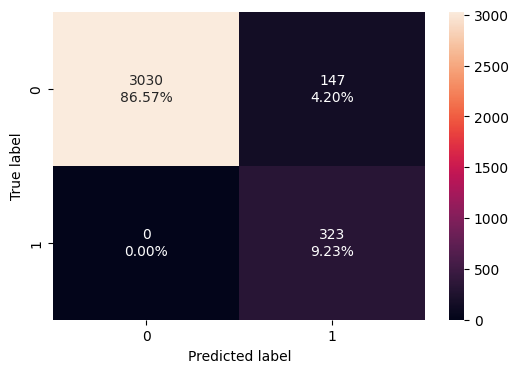

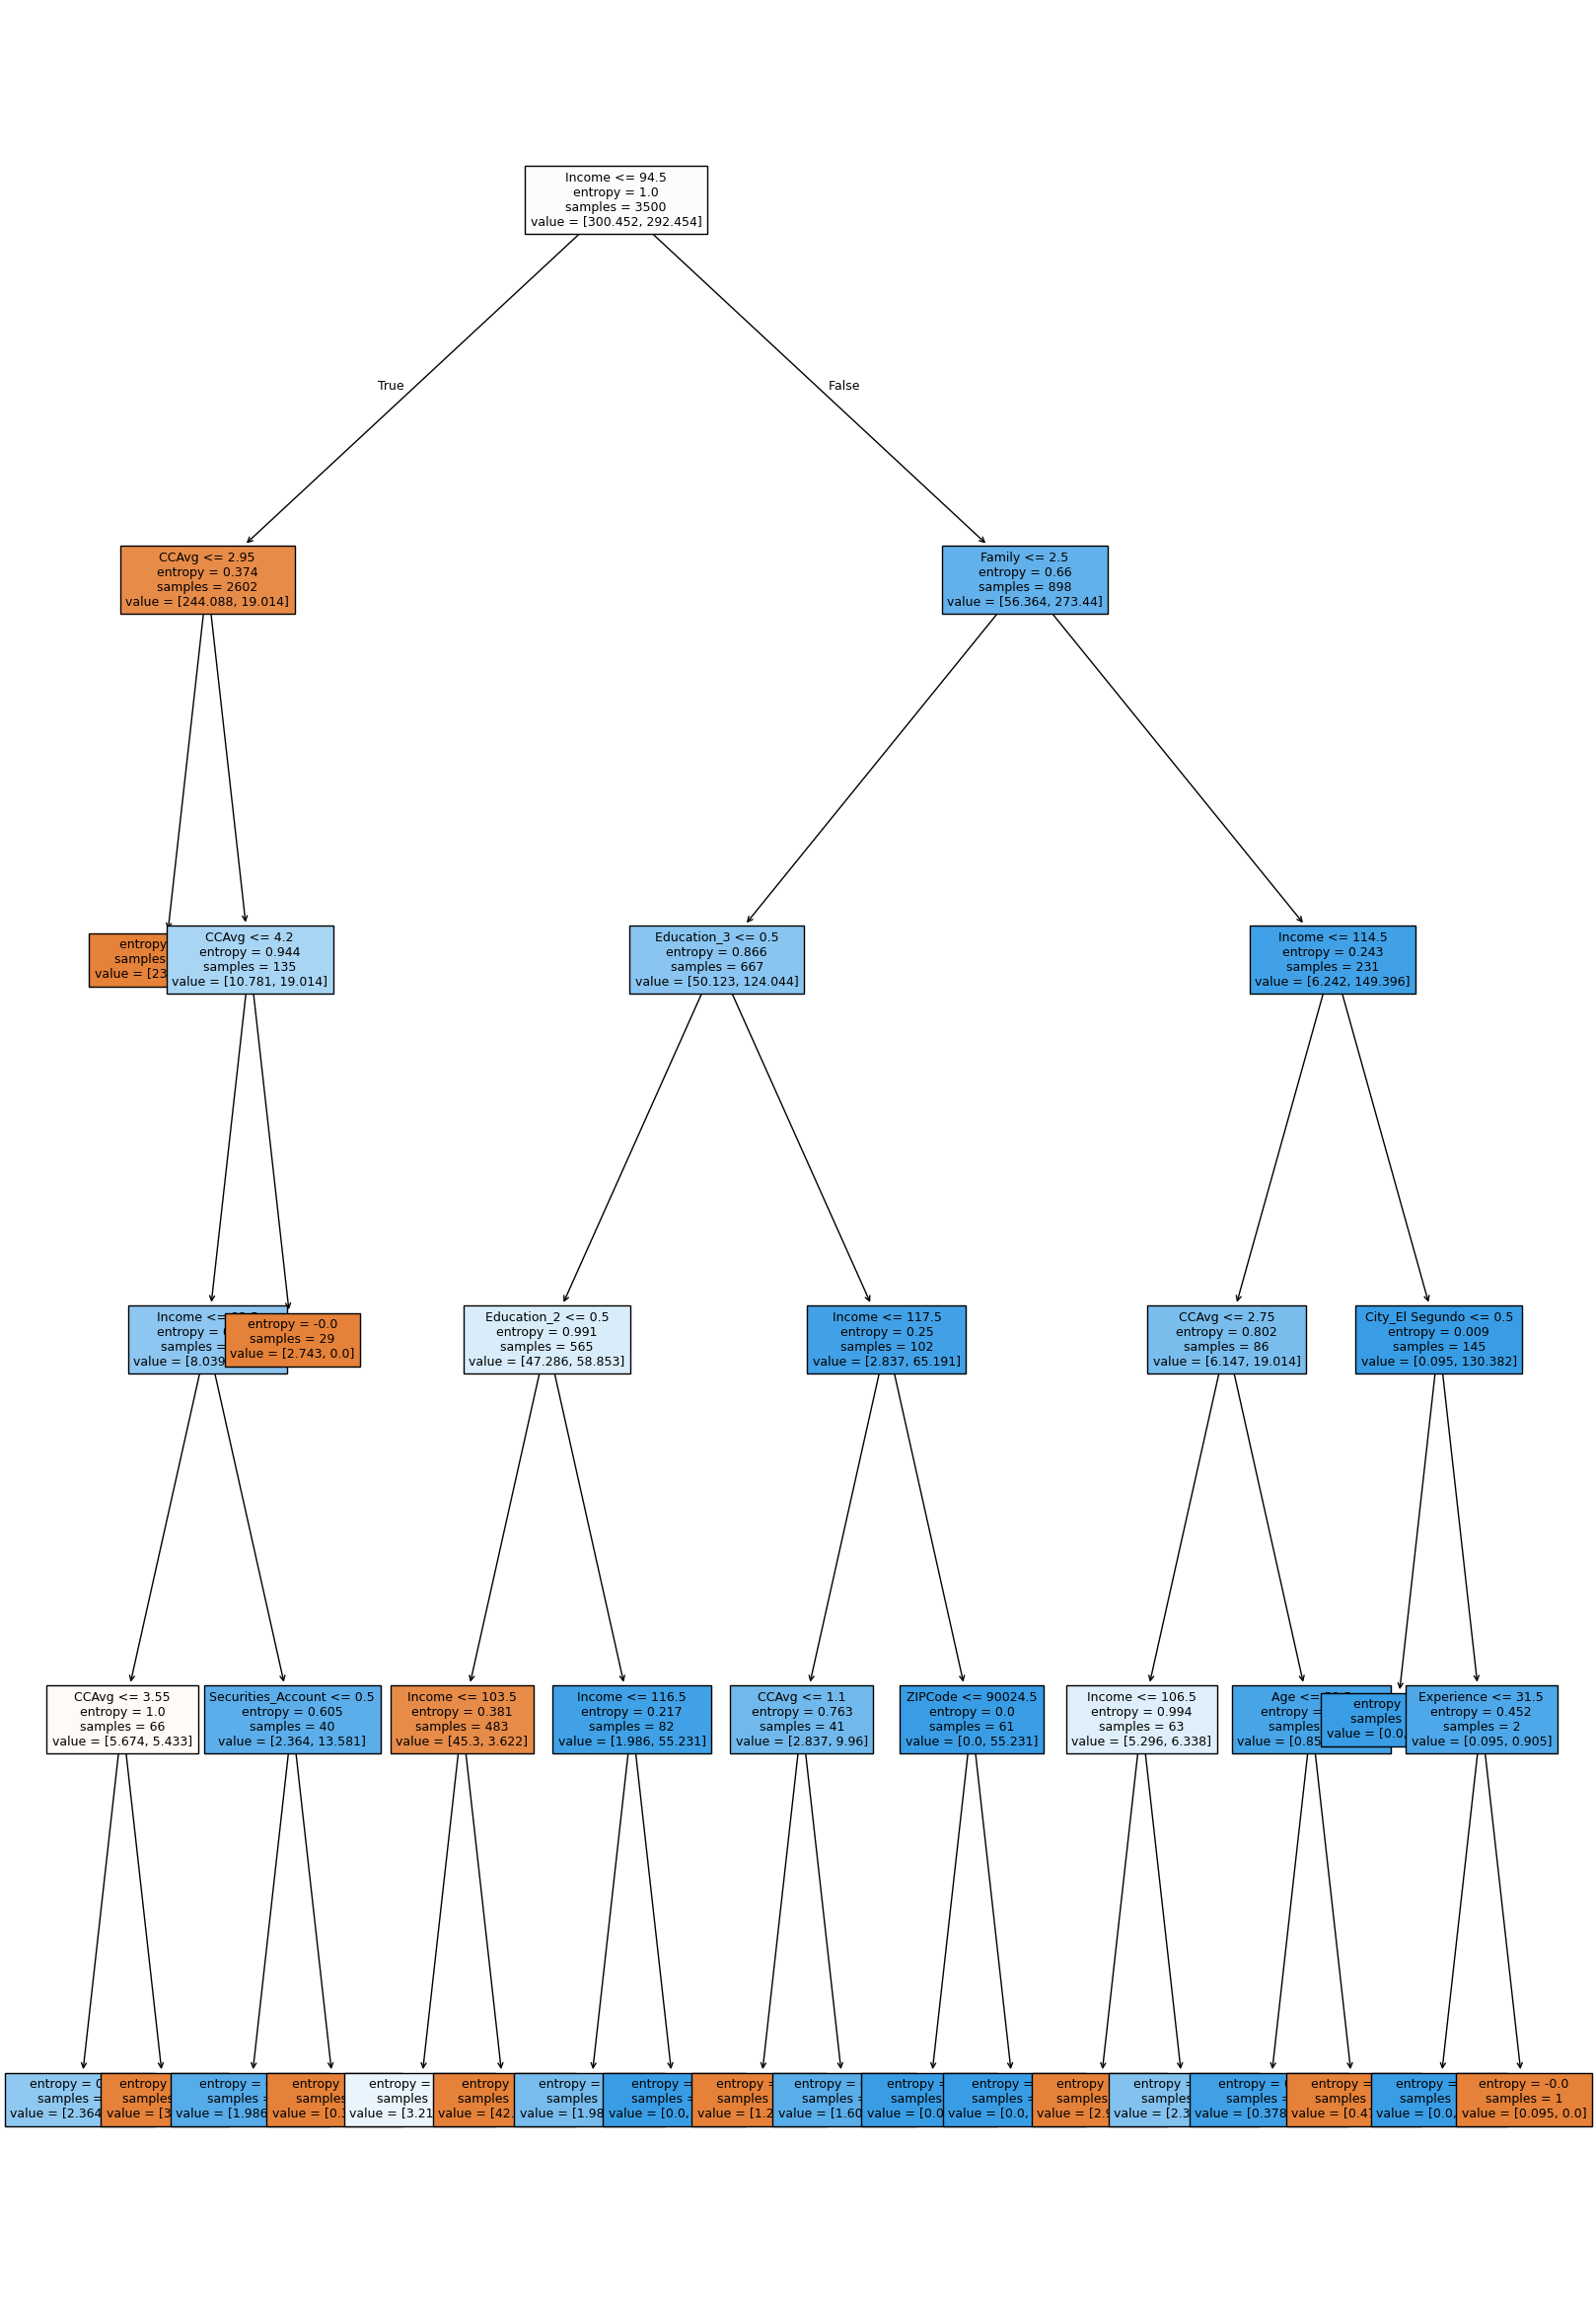

The features importances:
                            Imp
Income                 0.594335
CCAvg                  0.157135
Education_2            0.135468
Family                 0.052994
Education_3            0.052180
...                         ...
City_Hollister         0.000000
City_Hopland           0.000000
City_Huntington Beach  0.000000
City_Imperial          0.000000
State_CA               0.000000

[258 rows x 1 columns]


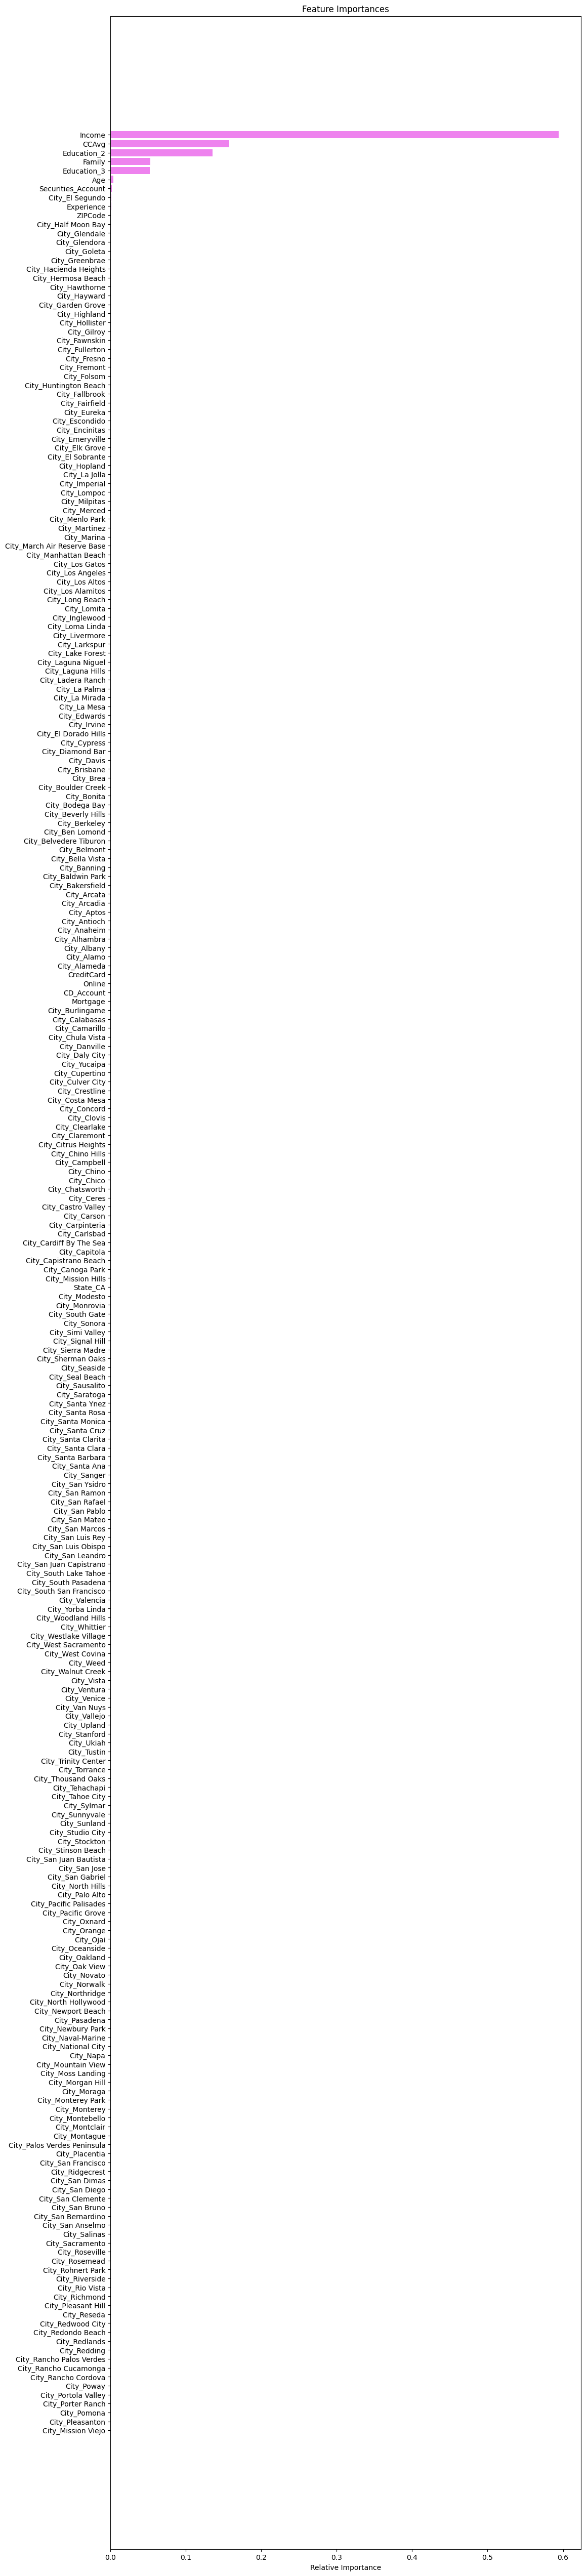

In [140]:
confusion_matrix_sklearn(t_1, X_train, y_train)
plot_tree(t_1,X_train)
view_nd_plot_importance(t_1, X_train)

### **Observation**

- At **max_depth=5. criterion= entropy and  default values for the remaining hyperparameters** the model performance on the **test set** is better than at **$T_0$** at max_depth= None criterion = gini

- Recall values:
    - Recall for T_1 on Train Data = 0.9909365558912386
    - Recall for T_1 on Test Data = 0.9530201342281879
- Features with max importance:
    - Income                         6.221524e-01
    - Education_2                    1.290525e-01
- Less importance yet still having a predictibily effect:
    - CCAvg                          1.221962e-01
    - Family                         5.805141e-02
    - Education_3                    5.305620e-02
-Confusion matrix:
    - FN at 0.09%
    - FP at 3.83%


### Tuning further hyperparameters to derive model $T_2$

In [141]:
#Choose the type of classifier.
t_2 = DecisionTreeClassifier(random_state=1,max_depth=5, criterion='entropy'
                             , class_weight={0: 0.094571, 1: 0.905429},max_leaf_nodes=3,
                       min_impurity_decrease=1e-05)

In [142]:
t_2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, max_leaf_nodes=3,
                       min_impurity_decrease=1e-05, random_state=1)

### Model Performance Evaluation_Pre-pruned Tree $T_2$

In [143]:
Recall_Train_T_2 = get_recall_score(t_2, X_train, y_train)
print(f'Recall for T_2 on Train Data = {Recall_Train_T_1}')
Recall_Test_T_1 = get_recall_score(t_2, X_test, y_test)
print(f'Recall for T_2 on Test Data = {Recall_Test_T_1}')

Recall for T_2 on Train Data = 1.0
Recall for T_2 on Test Data = 1.0


The model seems to overfit the test data, hence it is not to be neglected

## Decision Tree Models Comparison (pre-pruning)

|Model name| train_performance |recall (train) |test_performance |recall(test)| Depth |Criterion|Other hyperparameters|
|:---------|:--------------------|:---------------|:------------|:------------:|:------------:|:------------:|:------------:|
|t_0|Recall_Train_T_0|1.0|Recall_Test_T_0|0.8859| None |Gini| Default|
|t_0|Recall_Train_T_1|0.9909|Recall_Test_T_1|0.9531|5 |Entropy|Default|
|t_2|Recall_Train_T_2|0.99|Recall_Test_T_2|1.0|5 |Entropy|max_leaf_nodes=3 & min_impurity_decrease=1e-05 |

   
### **Conclusion of Pre-prunning**
- The best performing model on the test set is <font color=green> **$T_1$** </font> with the below hyperparameters:
|Hyper parameter|Value|
|:--|:--:|
|criterion|entropy|
|max_depth|5|
|class_weight|{0: 0.094571, 1: 0.905429}|
|Others|Default Values

The feature importance of this model is:
- Features with max importance:
    - Income                         6.221524e-01
    - Education_2                    1.290525e-01
- Less importance yet still having a predictibily effect:
    - CCAvg                          1.221962e-01
    - Family                         5.805141e-02
    - Education_3                    5.305620e-02
    
#### <font color=green> End of Pre-prunning </font>


### Post Prunning

In [144]:
#defining the classifier
PP_t_0 = DecisionTreeClassifier(random_state=1, class_weight={0: 0.094571, 1: 0.905429})

#defining the cost complexity pryning path
path = PP_t_0.cost_complexity_pruning_path(X_train, y_train)

#Extracting the ccp_aplhas and impurities from the path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [145]:
#displaying the ccp_alphas VS the impurities to prove that as the alphase increas the impurities increase 
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -5.650880e-15
1   8.500097e-19 -5.650030e-15
2   1.168763e-18 -5.648861e-15
3   1.168763e-18 -5.647693e-15
4   1.558351e-18 -5.646134e-15
5   2.479195e-18 -5.643655e-15
6   2.833366e-18 -5.640822e-15
7   3.116702e-18 -5.637705e-15
8   7.596962e-18 -5.630108e-15
9   3.624937e-16 -5.267614e-15
10  1.583231e-04  3.166462e-04
11  1.584013e-04  6.334489e-04
12  1.593887e-04  9.522262e-04
13  2.867007e-04  4.679335e-03
14  2.958340e-04  5.566837e-03
15  3.001956e-04  6.467424e-03
16  3.031754e-04  7.376950e-03
17  3.103201e-04  7.997590e-03
18  3.179543e-04  8.633499e-03
19  3.336080e-04  1.096875e-02
20  5.124478e-04  1.199365e-02
21  5.577996e-04  1.255145e-02
22  6.039351e-04  1.315539e-02
23  6.797316e-04  1.451485e-02
24  9.003939e-04  1.631564e-02
25  9.056970e-04  1.903273e-02
26  9.446428e-04  1.997737e-02
27  9.481849e-04  2.092555e-02
28  1.000465e-03  2.192602e-02
29  1.133010e-03  2.419204e-02
30  1.698823e-03  2.589086e-02
31  1.941042e-03  2.783190e-02
32  2.034598e-03  3.190110e-02
33  2.115212e-03  3.613153e-02
34  2.390247e-03  3.852177e-02
35  3.354420e-03  4.523061e-02
36  3.614460e-03  4.884507e-02
37  3.727529e-03  5.257260e-02
38  3.857454e-03  5.643006e-02
39  4.149491e-03  6.057955e-02
40  4.221764e-03  6.480131e-02
41  5.566985e-03  7.036829e-02
42  3.629529e-02  1.066636e-01
43  3.682507e-02  2.171388e-01
44  2.827702e-01  4.999090e-01

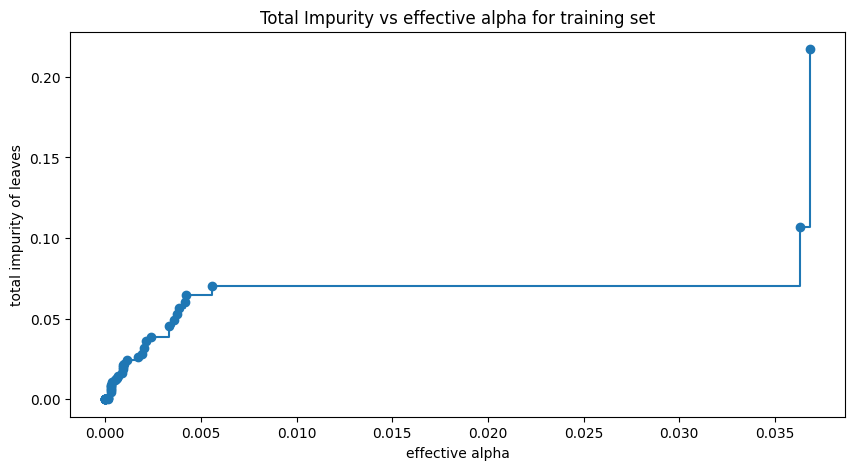

In [146]:
#let us plot the alphas VS the impurities
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

It is observed that the impurities show a sdeen peak after alpha = approx.0.005

Let us start training the decision tree using the effective alphas and observe how the tree depth vary with alpha

In [147]:
#an emplty list of post pruned trees (PP_trees)

PP_trees = []
for alpha in ccp_alphas:
    PP_tree = DecisionTreeClassifier(
        random_state=1, ccp_alpha=alpha, class_weight={0: 0.094571, 1: 0.905429}
    )
    PP_tree.fit(X_train, y_train)
    PP_trees.append(PP_tree)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        PP_trees[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.28277022161276727


We will Remove the last elements in PP_trees and CCP_alphas as they relfect the smallest tree (one node) and proceed with the visualtization of the nodes and depth (i.e tree complexity) as alpha varies

In [148]:
PP_trees = PP_trees[:-1]
ccp_alphas = ccp_alphas[:-1]

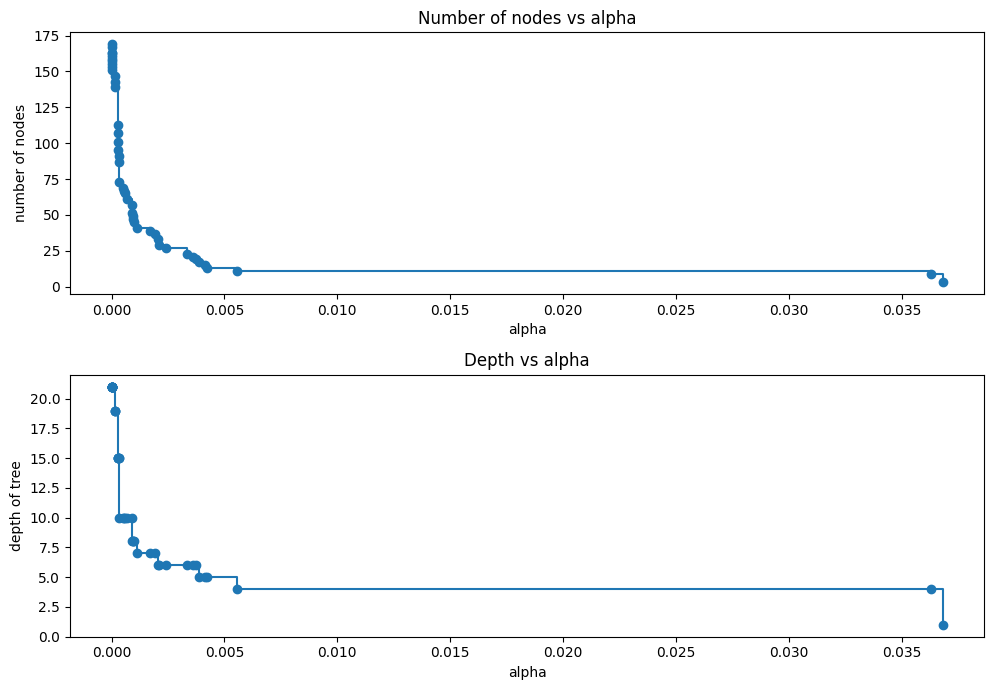

In [149]:
node_counts = [PP_tree.tree_.node_count for PP_tree in PP_trees]
depth = [PP_tree.tree_.max_depth for PP_tree in PP_trees]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

It is observed that again at alpha = 0.005 the tree seems to have reached the smallest size which is underfitting the data. Hence, we now have an idea that the **alpha value that will give us the optimum model performance is definitely below 0.05**

Now, let us observe how the Model recall values at varying alphas for the training and test sets

In [150]:
#derive the recall values for all PP_tress for the train set
recall_train = []
for PP_tree in PP_trees:
    y_pred_train = PP_tree.predict(X_train)
    values_train = recall_score(y_train, y_pred_train)
    recall_train.append(values_train)

In [151]:
#derive the recall values for all PP_tress for the test set
recall_test = []
for PP_tree in PP_trees:
    y_pred_test = PP_tree.predict(X_test)
    values_test = recall_score(y_test, y_pred_test)
    recall_test.append(values_test)

In [152]:
#calculating the Accuracy of test and train models
train_scores = [PP_tree.score(X_train, y_train) for PP_tree in PP_trees]
test_scores = [PP_tree.score(X_test, y_test) for PP_tree in PP_trees]

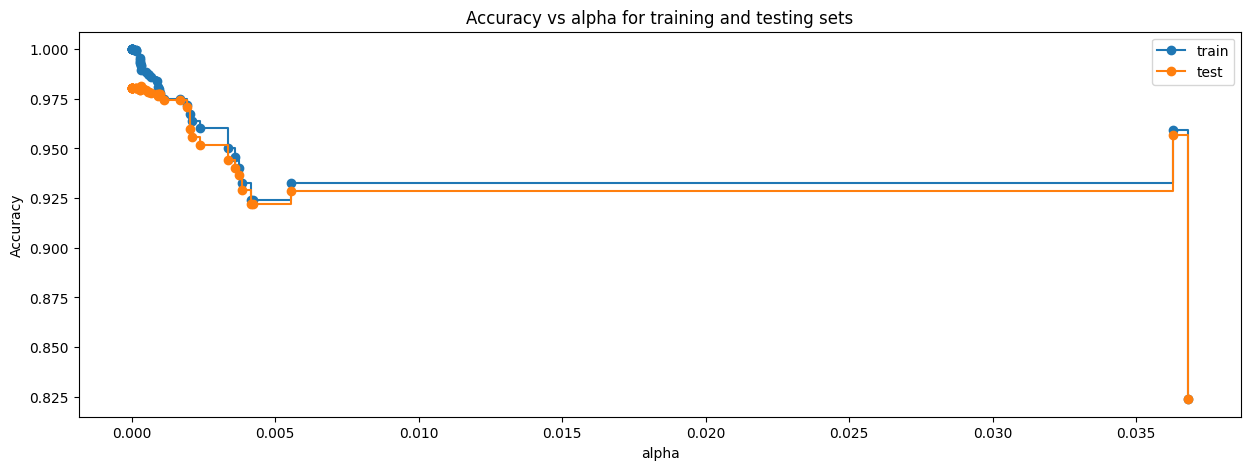

In [153]:
#plotting the accuracy for test and training sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Again, we observe a better performance at alpha less than 0.05. Visually the value of alpha giving the best accuract is either very close to zero which could be still reflecting an over fitting tree, the other option is at approx 0.03 or 0.035. Still, the accuracy is not the optimum performance measure we are pursuing, we are to pursue the best Recall value as a performance measure

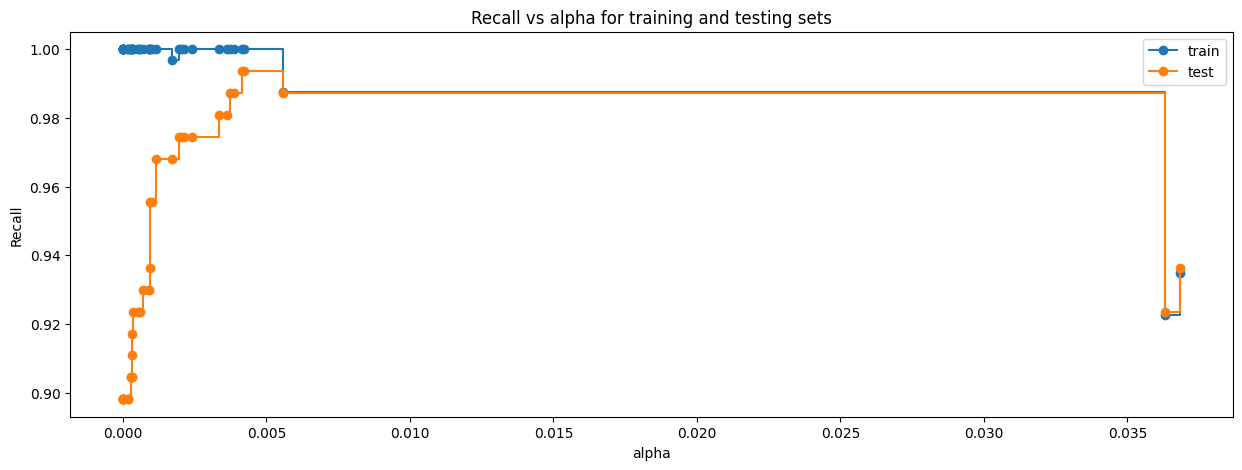

In [154]:
#plotting the recall scores for test and training sets VS Alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [155]:
#let us derive the minimum alpha value for the test test
index_best_model = np.argmax(recall_test)
print(f''' The recall value giving the best predictibility model is: {recall_test[index_best_model]}
"The best alpha value is: {ccp_alphas[index_best_model]}"''')

 The recall value giving the best predictibility model is: 0.9936305732484076
"The best alpha value is: 0.004149490597208965"


Deriving the best model **PP_t_best** and fitting it to the train set

In [156]:
PP_t_best_1 = PP_trees[index_best_model]
PP_t_best_1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004149490597208965,
                       class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

### Model Performance Evaluation_Post-pruned Tree 

In [157]:
#Calculating the Recall for train and test data
Recall_Train_PP_t_best_1 = get_recall_score(PP_t_best_1, X_train, y_train)
print(f'Recall for PP_t_best_1 on Train Data = {Recall_Train_PP_t_best_1}')

Recall_Test_PP_t_best_1 = get_recall_score(PP_t_best_1, X_test, y_test)
print(f'Recall for PP_t_best_1 on Test Data = {Recall_Test_PP_t_best_1}')

Recall for PP_t_best_1 on Train Data = 1.0
Recall for PP_t_best_1 on Test Data = 0.9936305732484076


The Recall on train data sets is 1.0 which raises the suspicion of an overfitting model, yet its value is closer to the recall of the test dataset which is still better than t_0, yer requires further improvement.
Hence, we will derive the tree, decision table and feature importantce for this model **PP_t_best_1** and then derive another model of the second peak of alpha.

The tree depth is : 5


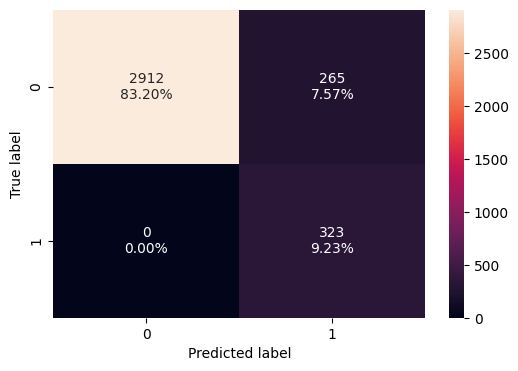

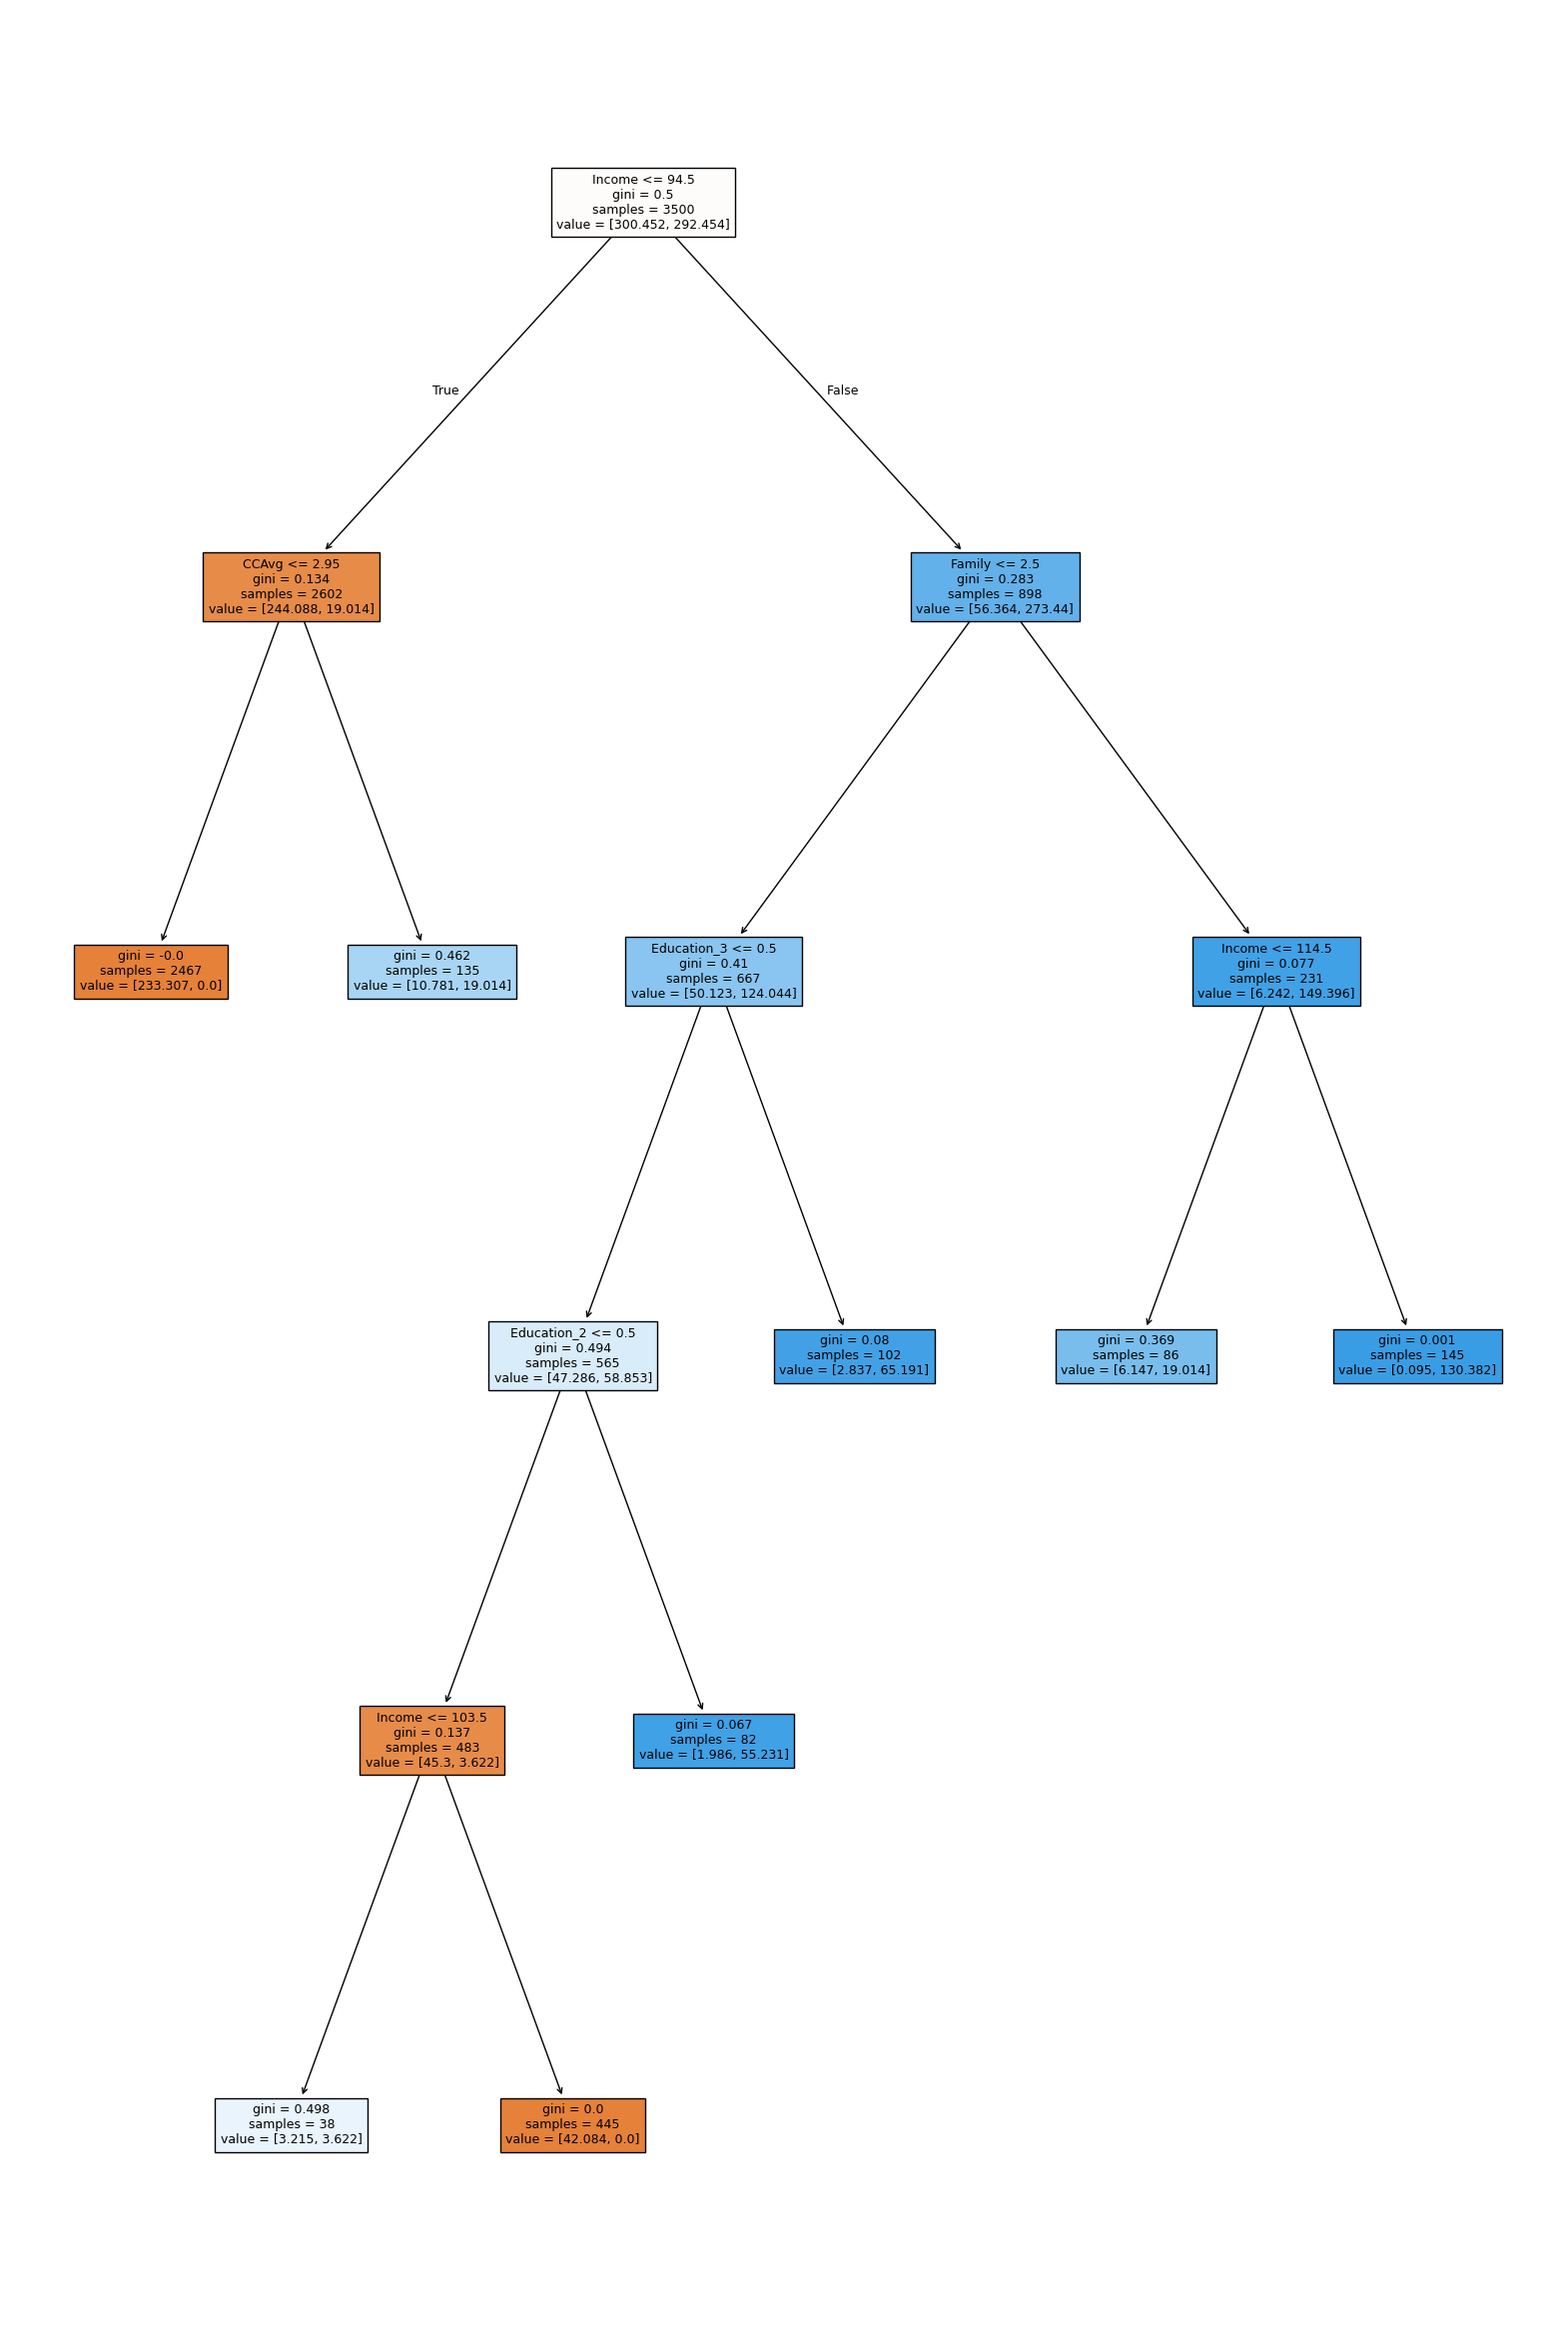

The features importances:
                         Imp
Income              0.665922
Education_2         0.160847
CCAvg               0.082615
Education_3         0.051903
Family              0.038714
...                      ...
City_Hermosa Beach  0.000000
City_Highland       0.000000
City_Hollister      0.000000
City_Hopland        0.000000
State_CA            0.000000

[258 rows x 1 columns]


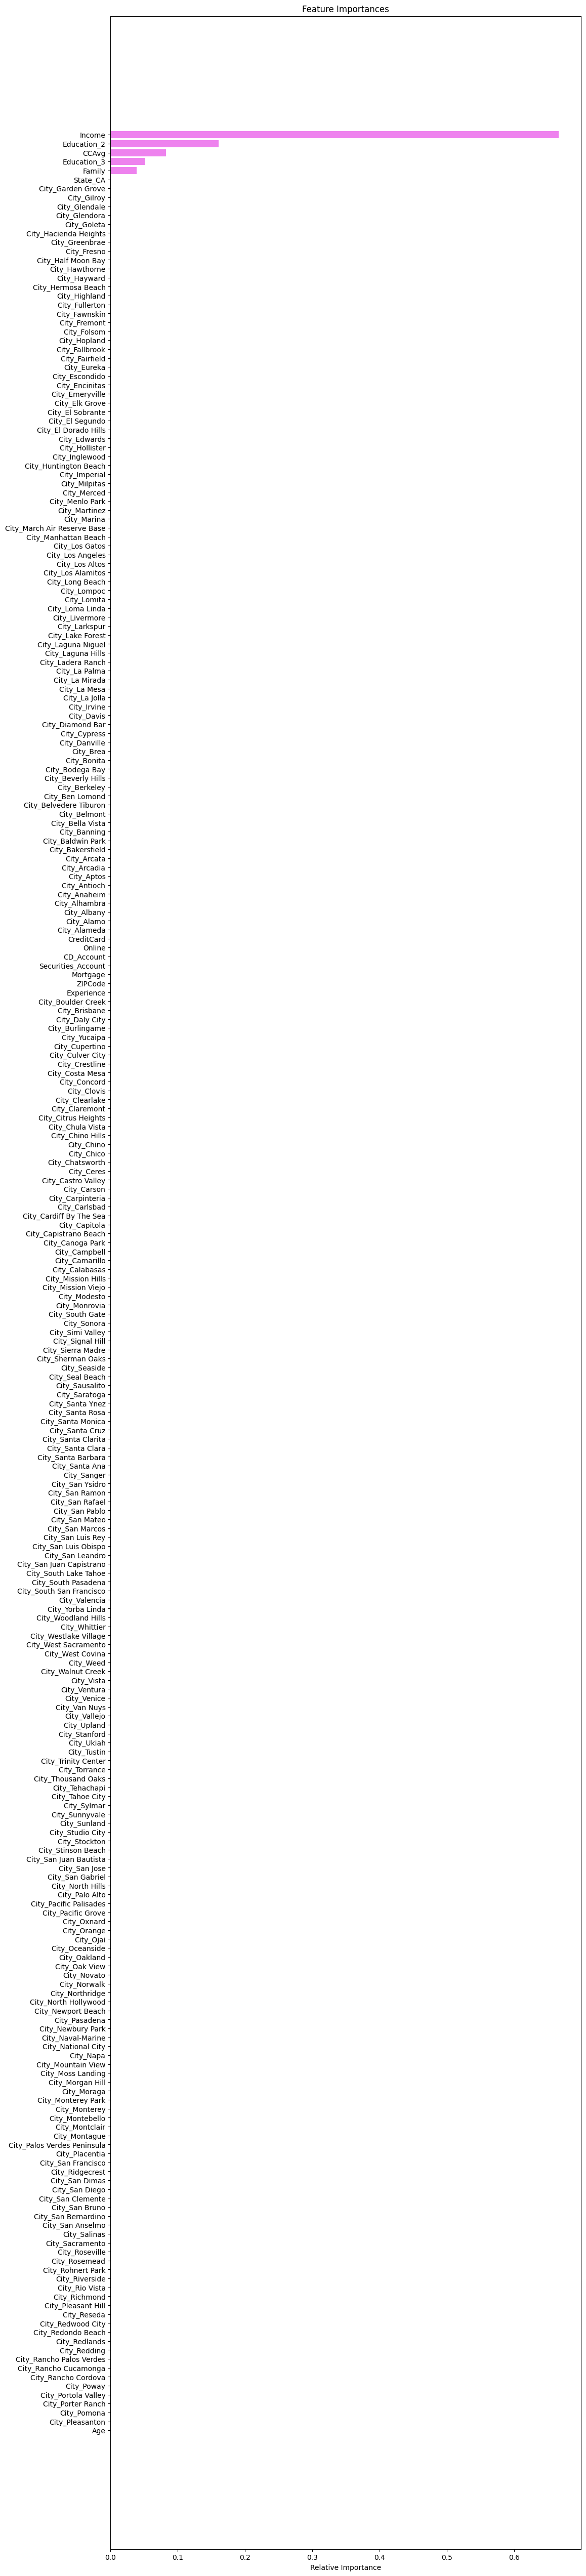

In [158]:
#plotting the tree, variables importance and the confusion matrix
print(f'The tree depth is : {PP_t_best_1.tree_.max_depth}')
confusion_matrix_sklearn(PP_t_best_1, X_train, y_train)
plot_tree(PP_t_best_1,X_train)
view_nd_plot_importance(PP_t_best_1, X_train)

### Observation on PP_t_best_1 Model 

- At **ccp_alpha=0.00247265274395358 and max_depth=6** the performance summary is:

- Recall values:
    - Recall for PP_t_best_1 on Train Data = 1.0
    - Recall for PP_t_best_1 on Test Data = 0.9932885906040269
- Features with max importance:
    - Income                         
    - Education_2                    
- Less importance yet still having a predictibily effect:
    - CCAvg                          
    - Education_3                    
    - Family                        

- Confusion matrix:
    - FN at 0.00% (*Not realistic*)
    - FP at 4.31%


## Further model enhancement by deriving PP_t_best_2 Model
Earlier when we viewed the Recall_test and Recall_train VS the alpha, it was noticed another meeting point at an alpha near value of approx 0.03. Hence, our approach to avoid using an overfitting model is to extract a higher alpha that still gives a very good Recall value for the test set.

In [159]:
#creating a data frame including alpha, recall train and recall test
df = pd.DataFrame()
df[['ccp_alphas', 'recall_train', 'recall_test']]=''
df['ccp_alphas']=ccp_alphas
df['recall_train']= recall_train
df['recall_test']=recall_test
df

ccp_alphas  recall_train  recall_test
0   0.000000e+00      1.000000     0.898089
1   8.500097e-19      1.000000     0.898089
2   1.168763e-18      1.000000     0.898089
3   1.168763e-18      1.000000     0.898089
4   1.558351e-18      1.000000     0.898089
5   2.479195e-18      1.000000     0.898089
6   2.833366e-18      1.000000     0.898089
7   3.116702e-18      1.000000     0.898089
8   7.596962e-18      1.000000     0.898089
9   3.624937e-16      1.000000     0.898089
10  1.583231e-04      1.000000     0.898089
11  1.584013e-04      1.000000     0.898089
12  1.593887e-04      1.000000     0.898089
13  2.867007e-04      1.000000     0.904459
14  2.958340e-04      1.000000     0.904459
15  3.001956e-04      1.000000     0.904459
16  3.031754e-04      1.000000     0.904459
17  3.103201e-04      1.000000     0.910828
18  3.179543e-04      1.000000     0.917197
19  3.336080e-04      1.000000     0.923567
20  5.124478e-04      1.000000     0.923567
21  5.577996e-04      1.000000     0.923567
22  6.039351e-04      1.000000     0.923567
23  6.797316e-04      1.000000     0.929936
24  9.003939e-04      1.000000     0.929936
25  9.056970e-04      1.000000     0.929936
26  9.446428e-04      1.000000     0.936306
27  9.481849e-04      1.000000     0.955414
28  1.000465e-03      1.000000     0.955414
29  1.133010e-03      1.000000     0.968153
30  1.698823e-03      0.996904     0.968153
31  1.941042e-03      1.000000     0.974522
32  2.034598e-03      1.000000     0.974522
33  2.115212e-03      1.000000     0.974522
34  2.390247e-03      1.000000     0.974522
35  3.354420e-03      1.000000     0.980892
36  3.614460e-03      1.000000     0.980892
37  3.727529e-03      1.000000     0.987261
38  3.857454e-03      1.000000     0.987261
39  4.149491e-03      1.000000     0.993631
40  4.221764e-03      1.000000     0.993631
41  5.566985e-03      0.987616     0.987261
42  3.629529e-02      0.922601     0.923567
43  3.682507e-02      0.934985     0.936306

At row 41 it is noticed good recall values for train and test sets at a value of alpha near the 0.003 threshold noticed on the curve. This value seems a good fit as it is not too close to an underfitting model, hence we will extract this value and observe how it behaves on the tree and confusion matrix

In [160]:
df.iloc[41]

ccp_alphas      0.005567
recall_train    0.987616
recall_test     0.987261
Name: 41, dtype: float64

In [161]:
#extracting the model from the 42nd model and fitting it to train and test data
PP_t_best_2 = PP_trees[41]
PP_t_best_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005566984771887773,
                       class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

### Model Performance Evaluation of Post-pruned Tree *PP_t_best_2*

In [162]:
#Calculating the Recall for train and test data
Recall_Train_PP_t_best_2 = get_recall_score(PP_t_best_2, X_train, y_train)
print(f'Recall for PP_t_best_2 on Train Data = {Recall_Train_PP_t_best_2}')

Recall_Test_PP_t_best_2 = get_recall_score(PP_t_best_2, X_test, y_test)
print(f'Recall for PP_t_best_2 on Test Data = {get_recall_score(PP_t_best_2, X_test, y_test)}')

Recall for PP_t_best_2 on Train Data = 0.9876160990712074
Recall for PP_t_best_2 on Test Data = 0.9872611464968153


The Recall on test and train data sets are the same as stated in the dataframe df which was expected, let us move forward to visualizing the tree, the confusion matrix and feature importance

The tree depth is : 4


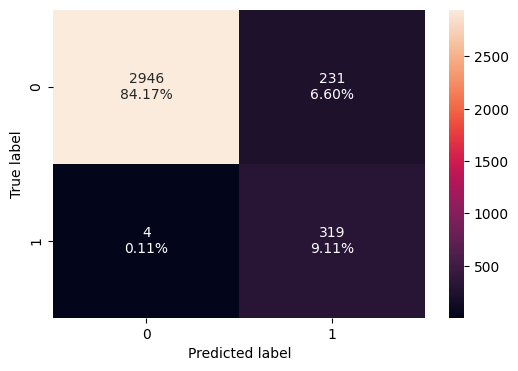

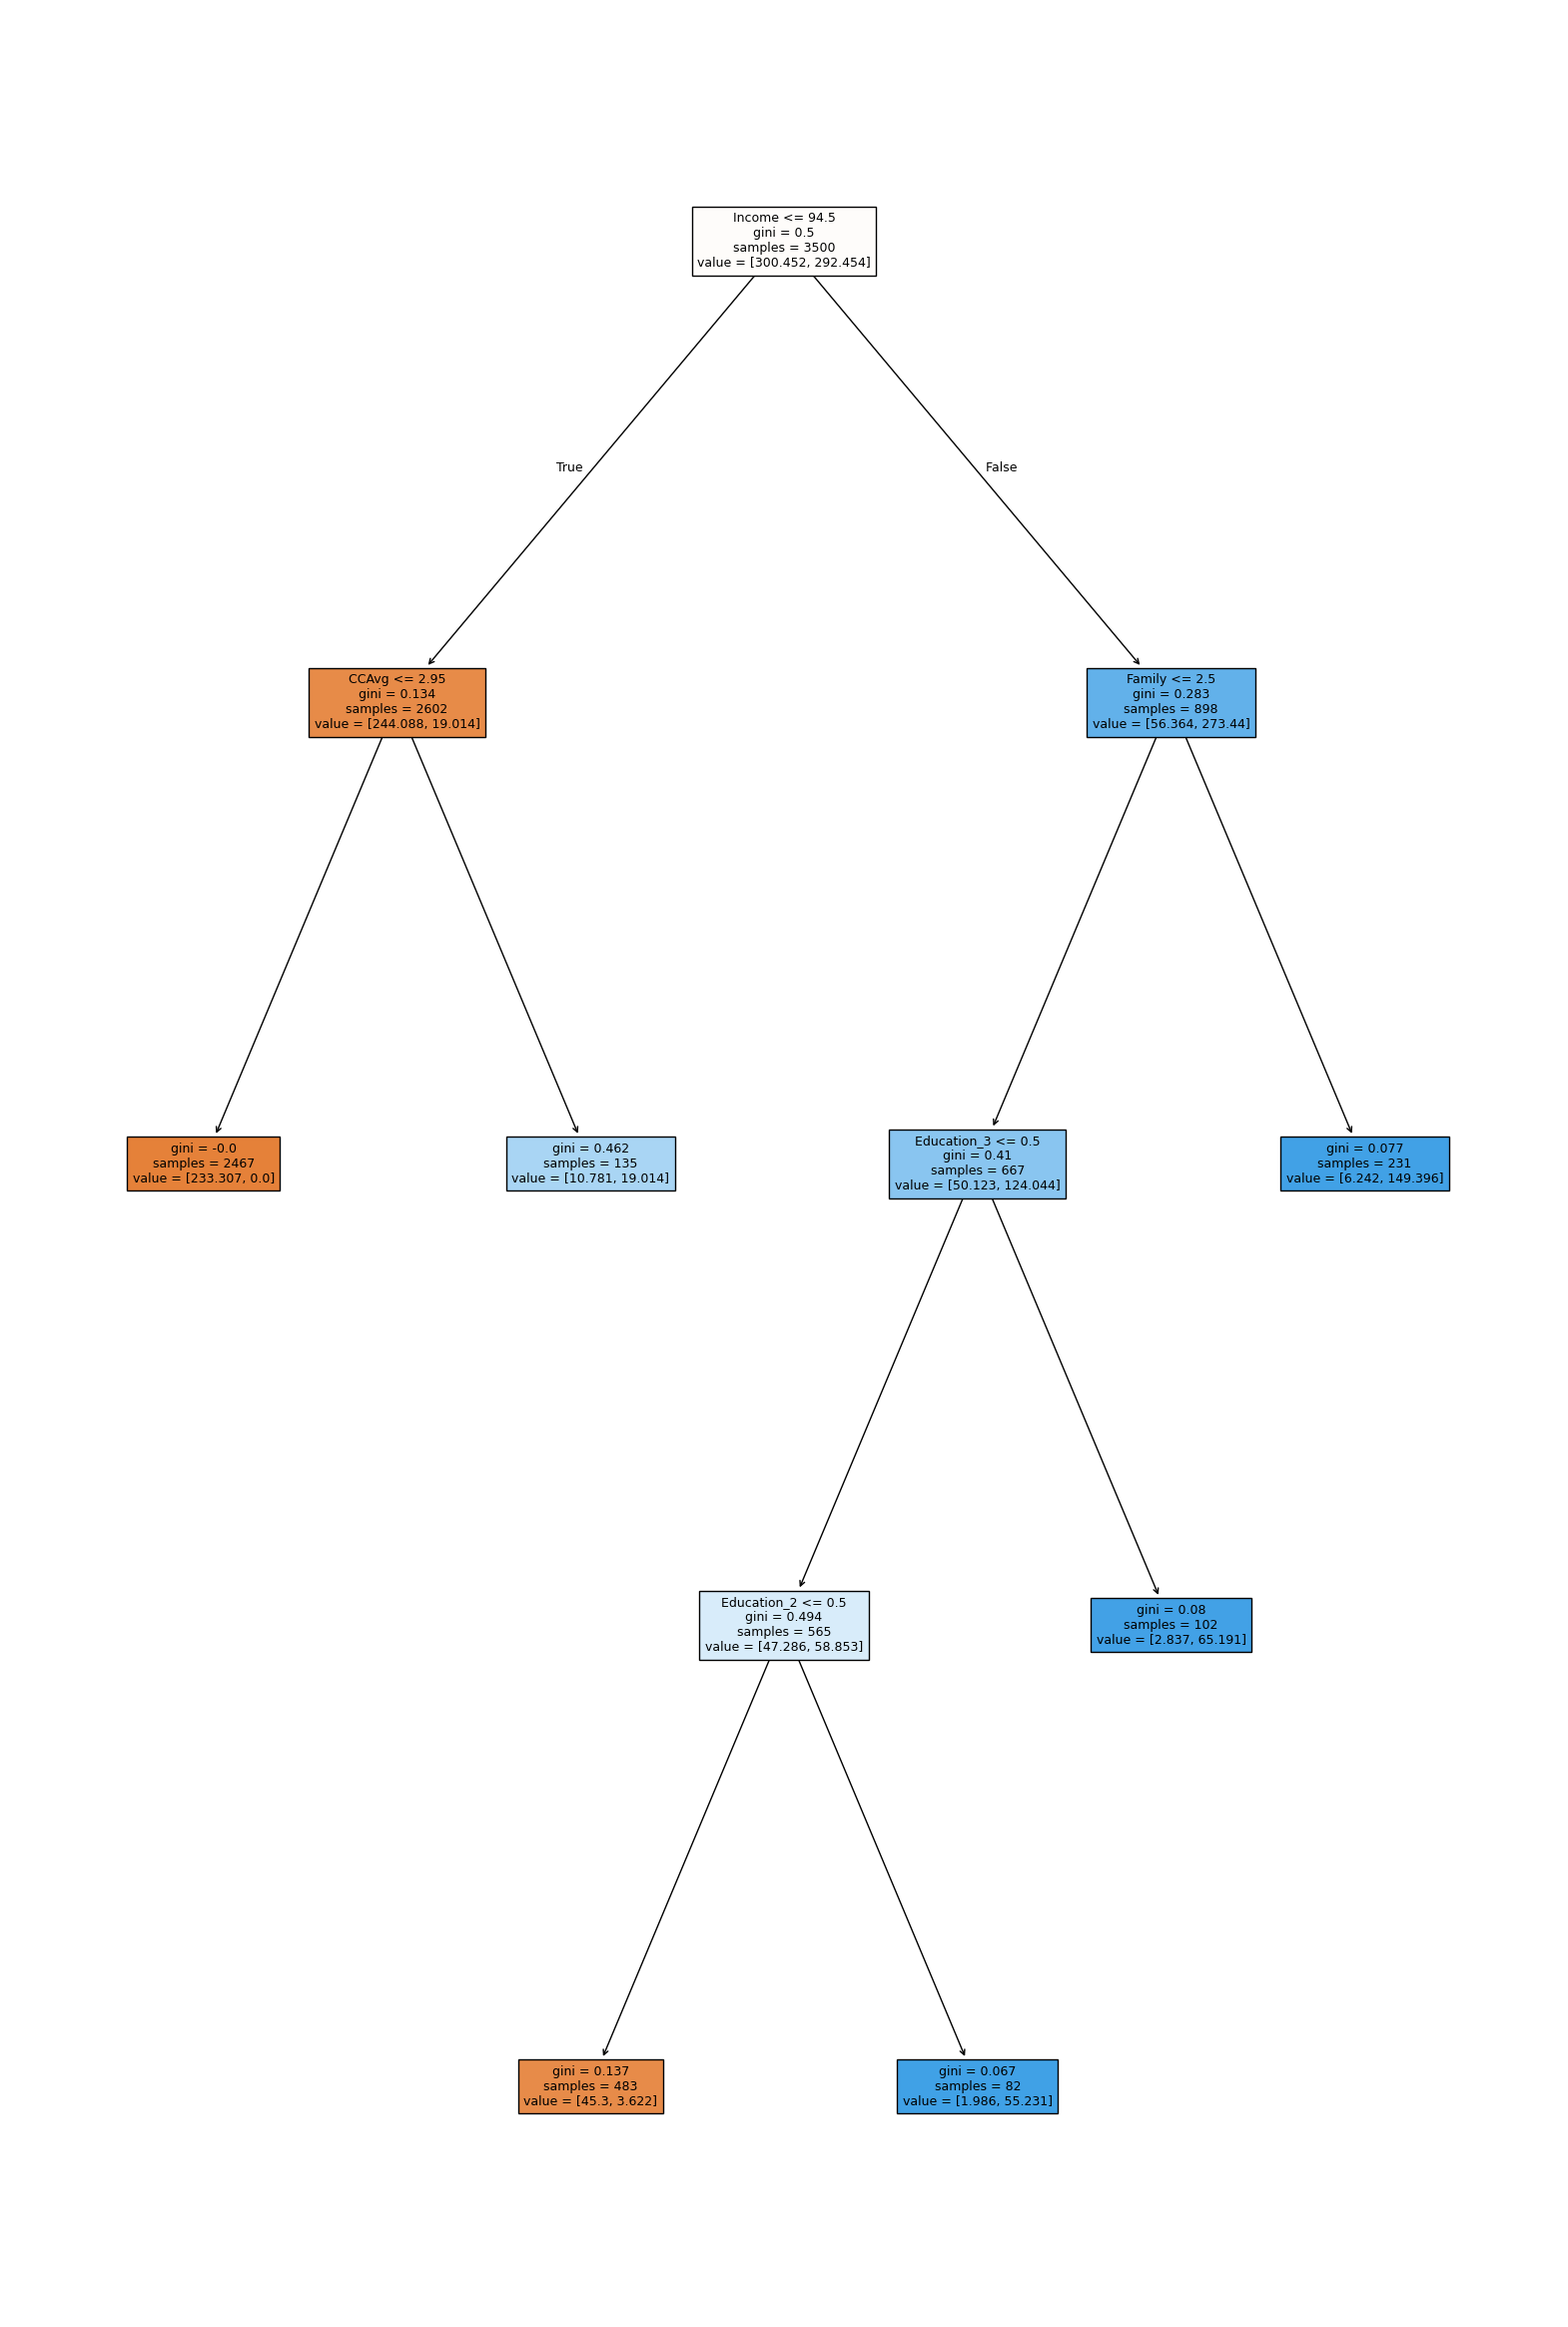

The features importances:
                         Imp
Income              0.658308
Education_2         0.164512
CCAvg               0.084498
Education_3         0.053085
Family              0.039596
...                      ...
City_Hermosa Beach  0.000000
City_Highland       0.000000
City_Hollister      0.000000
City_Hopland        0.000000
State_CA            0.000000

[258 rows x 1 columns]


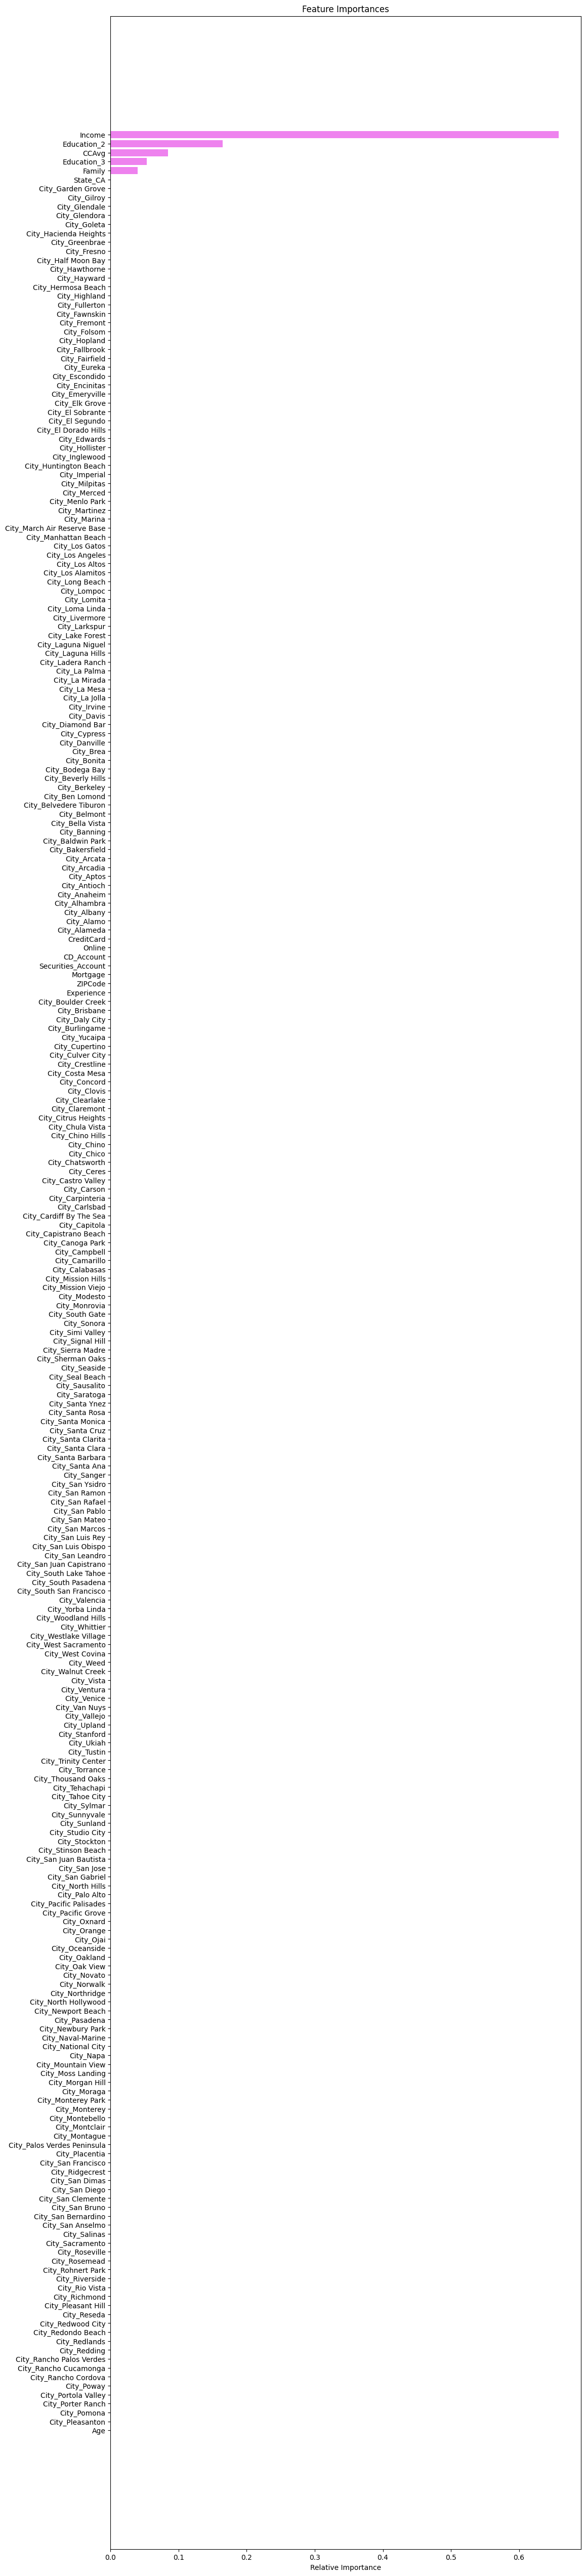

In [163]:
#plotting the tree, variables importance and the confusion matrix
print(f'The tree depth is : {PP_t_best_2.tree_.max_depth}')
confusion_matrix_sklearn(PP_t_best_2, X_train, y_train)
plot_tree(PP_t_best_2,X_train)
view_nd_plot_importance(PP_t_best_2, X_train)

### Observation on PP_t_best_2 Model

- At **ccp_alpha=0.003504 and max_depth=6** the performance of **PP_t_best_2** is better then **PP_t_best_1**. Although the recall values for train and test are less, the FN% in the confusion matrix is down to half. The performance summary is:

- Recall values:
    - Recall for PP_t_best_2 on Train Data = 0.9697885196374623
    - Recall for PP_t_best_2 on Test Data = 0.9463087248322147
- Features with max importance:
    - Income                         0.676053
    - Education_2                    0.149883
- Less importance yet still having a predictibily effect:
    - CCAvg                          0.071228
    - Education_3                    0.052773
    - Family                         0.041866

- Confusion matrix:
    - FN at 0.29%
    - FP at 2.83%

### Model Performance Evaluation_Post-pruned Tree PP_t_best_3

In [164]:
df.iloc[41]

ccp_alphas      0.005567
recall_train    0.987616
recall_test     0.987261
Name: 41, dtype: float64

In [165]:
#extracting the model from the 42nd model and fitting it to train and test data
PP_t_best_3 = PP_trees[41]
PP_t_best_3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005566984771887773,
                       class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

In [166]:
#Calculating the Recall for train and test data
Recall_Train_PP_t_best_3 = get_recall_score(PP_t_best_3, X_train, y_train)
print(f'Recall for PP_t_best_3 on Train Data = {Recall_Train_PP_t_best_3}')
Recall_Test_PP_t_best_3 = get_recall_score(PP_t_best_3, X_test, y_test)
print(f'Recall for PP_t_best_3 on Test Data = {Recall_Test_PP_t_best_3}')

Recall for PP_t_best_3 on Train Data = 0.9876160990712074
Recall for PP_t_best_3 on Test Data = 0.9872611464968153


The Recall on test and train data sets are the same as stated in the dataframe df which was expected, let us move forward to visualizing the tree, the confusion matrix and feature importance

The tree depth is : 4


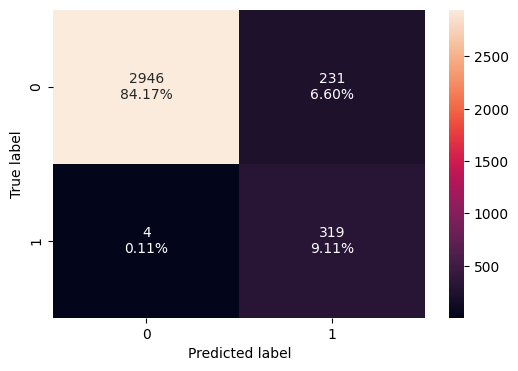

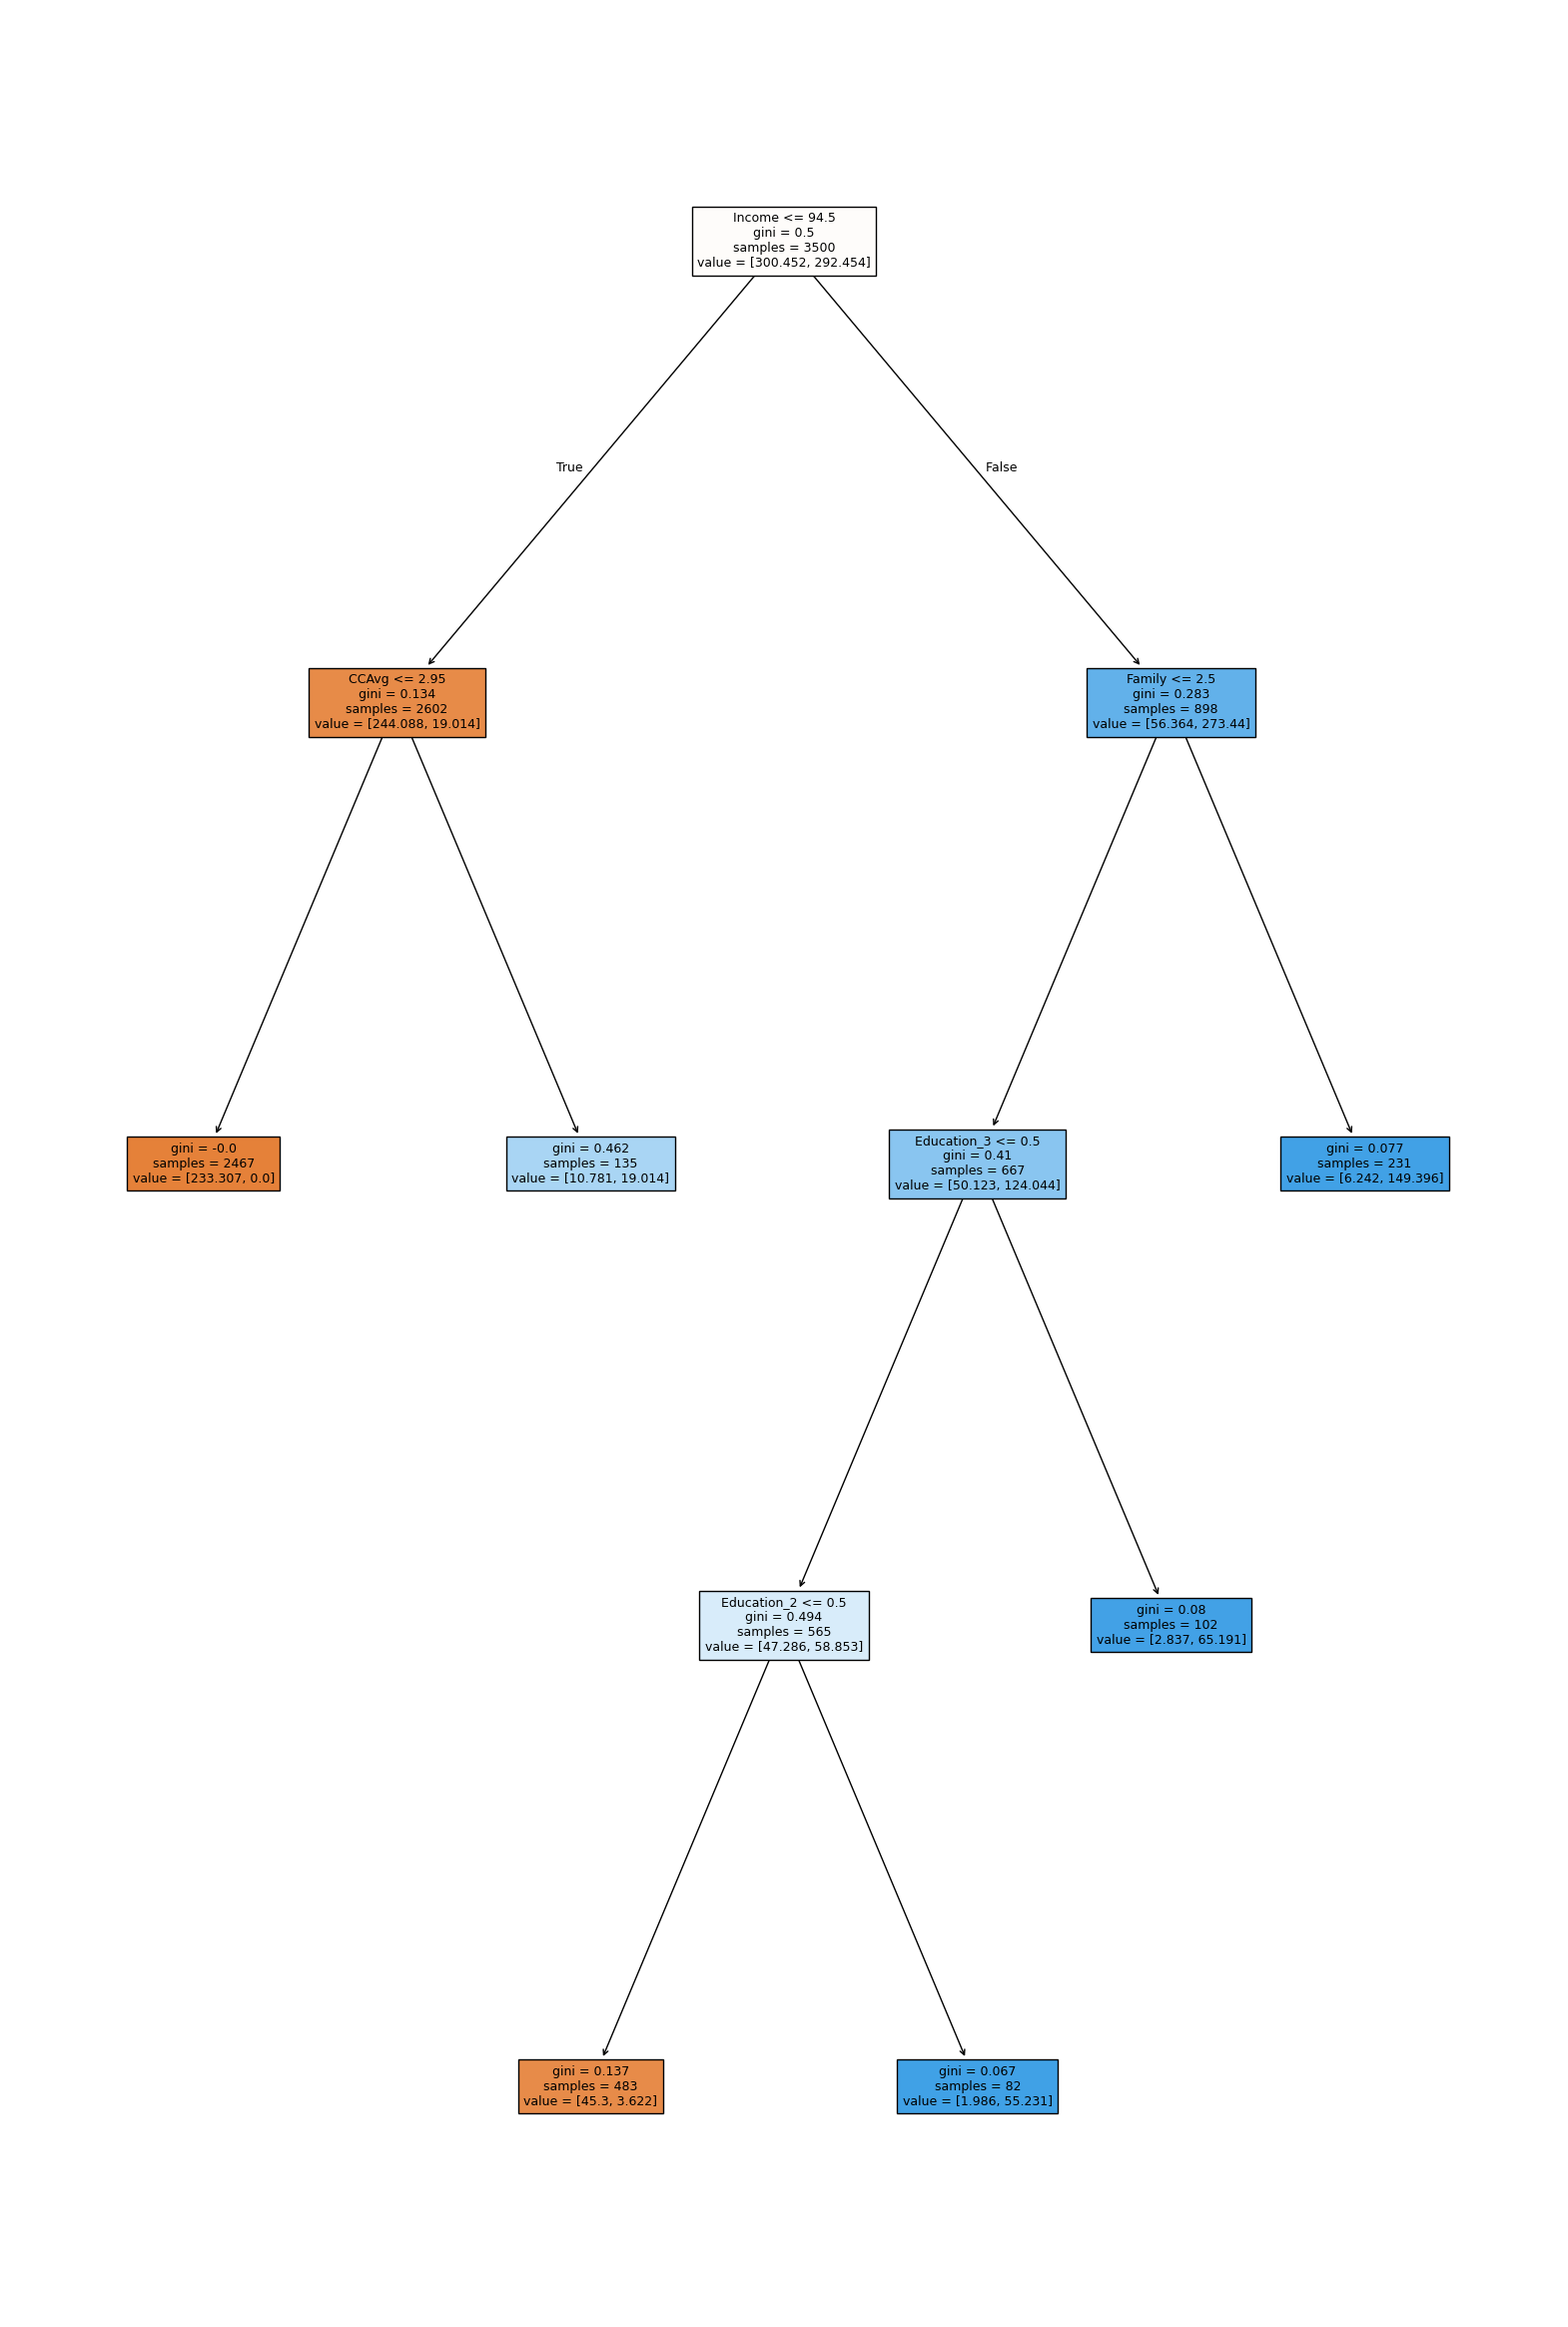

The features importances:
                         Imp
Income              0.658308
Education_2         0.164512
CCAvg               0.084498
Education_3         0.053085
Family              0.039596
...                      ...
City_Hermosa Beach  0.000000
City_Highland       0.000000
City_Hollister      0.000000
City_Hopland        0.000000
State_CA            0.000000

[258 rows x 1 columns]


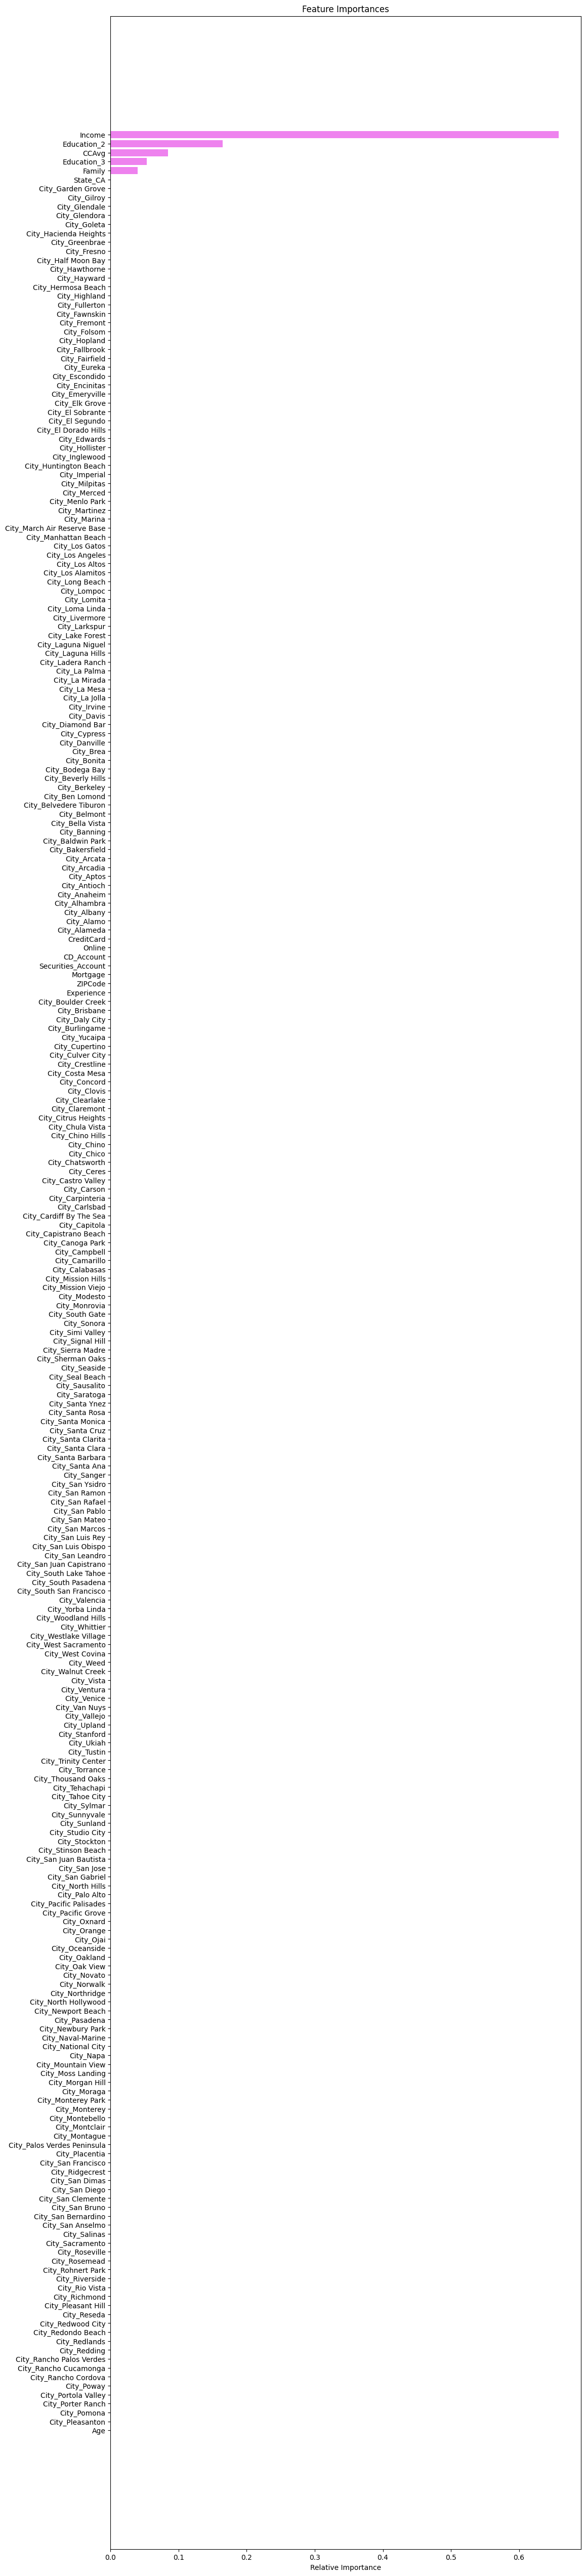

In [167]:
#plotting the tree, variables importance and the confusion matrix
print(f'The tree depth is : {PP_t_best_3.tree_.max_depth}')
confusion_matrix_sklearn(PP_t_best_3, X_train, y_train)
plot_tree(PP_t_best_3,X_train)
view_nd_plot_importance(PP_t_best_3, X_train)

### Observation on PP_t_best_3 Model

- At **ccp_alpha=0.0.003730 and max_depth=5** the performance of **PP_t_best_3** is better then **PP_t_best_2**. Although the recall values for train and test are less, the FN% in the confusion matrix is down to half. The performance summary is:

- Recall values:
    - Recall for PP_t_best_3 on Train Data = 0.9909365558912386
    - Recall for PP_t_best_3 on Test Data = 0.9798657718120806
- Features with max importance:
    - Income                         0.685906
    - Education_2                    0.153574
- Less importance yet still having a predictibily effect:
    - CCAvg                          0.063550
    - Education_3                    0.054072
    - Family                         0.042897

- Confusion matrix:
    - FN at 0.09%
    - FP at 6.03%
    


## Decision Tree Models (post-pruning)

|Model name|train_performance|recall (train)|test_performance|recall(test)|ccp_alpha|
|:--:|:--:|:--|:--|:--:|:--|
|PP_t_best_1|Recall_Train_PP_t_best_1|1.0|Recall_Test_PP_t_best_1|0.99| 0.002473|
|PP_t_best_2|Recall_Train_PP_t_best_2|0.97|Recall_Test_PP_t_best_2|0.95|0.003504|
|PP_t_best_3|Recall_Test_PP_t_best_3|0.99|Recall_Test_PP_t_best_3|0.98|0.003730|

### **Conclusion of Post-prunning**
The third and final model has a low tree depth of 5, hence less tree complexity of the tree using a greater value of alpha and it was successful in avoiding the model overfitting. Hence, The best performing model on the test set is <font color=green> **PP_t_best_3** </font> with the below alpha value


|Hyper parameter|Value|
|:--|:--:|
|ccp_alpha|0.003730|

Feature Importance:
- Features with max importance:
    - Income                         0.685906
    - Education_2                    0.153574
- Less importance yet still having a predictibily effect:
    - CCAvg                          0.063550
    - Education_3                    0.054072
    - Family                         0.042897

#### <font color=green> End of Post-prunning </font>

### Actionable Insights & Recommendations  

#### **Final Model Comparison:**  

| **Modeling Algorithm**       | **Model Name**       | **Recall (Train)** | **Recall (Test)** |  
|------------------------------|----------------------|---------------------|-------------------|  
| Logistic Regression          | LG (Threshold = 0.1) | 0.92                | 0.88              |  
| Decision Tree (Pre-Pruned)   | T_1                  | 0.99                | 0.95              |  
| Decision Tree (Post-Pruned)  | PP_T_Best_3          | 0.99                | 0.98              |  

#### **Key Insights:**  

- The top-performing model is the **Post-Pruned Decision Tree** created using the **ccp_alpha = 0.003730** parameter. It achieved the following recall values:  
  - **Recall on Training Data:** 0.9909  
  - **Recall on Test Data:** 0.9799  

- Based on statistical analysis, the following features have the most significant influence on a customer's decision to accept a personal loan. The features are ranked in priority from 1 (highest) to 5 (lowest):  

| **Priority** | **Feature**       | **Impact on Customer Decision** |  
|--------------|-------------------|----------------------------------|  
| 1            | Income            | Higher income increases the likelihood of accepting a personal loan. |  
| 2            | Education_2       | Customers with education level 2 are more inclined to accept a loan compared to levels 1 and 3. |  
| 3            | CCAvg             | Increased monthly spending correlates with a higher likelihood of loan acceptance. |  
| 4            | Education_3       | Customers with education level 3 are more likely to accept a loan than those with level 1. |  
| 5            | Family            | Larger family sizes are associated with a greater willingness to accept a loan. |  

---

### What recommedations would you suggest to the bank?

#### **Recommendations:**  

1. The **marketing team** should focus on understanding customer profiles before approaching them with personal loan offers.  
2. The **top 5 features** identified above should be prioritized when targeting potential customers for loan campaigns to enhance the effectiveness of the outreach strategy.  


___